<h2>Package import</h2>

In [1]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn import ensemble, metrics
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.svm import LinearSVC
from sklearn.utils import check_random_state
import time
from sklearn.preprocessing import MinMaxScaler
import os
import json

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


<h2>Loading data</h2>

In [2]:
df = pd.read_excel('Dataset/DataSet_Large Class - Round 3.xlsx')

In [3]:
cleanup_nums = {"Final annotation":     {1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 0: 0}}

df= df.replace(cleanup_nums)

In [4]:
df.set_index('Code Snippet ID')

Link  \
Code Snippet ID                                                                                         
Aseprite.AsepriteAnimation                          https://github.com/egordorichev/BurningKnight/...   
Aseprite.AsepriteCel                                https://github.com/egordorichev/BurningKnight/...   
Aseprite.AsepriteFrame                              https://github.com/egordorichev/BurningKnight/...   
Aseprite.AsepriteImporter                           https://github.com/egordorichev/BurningKnight/...   
Aseprite.AsepriteLayer                              https://github.com/egordorichev/BurningKnight/...   
...                                                                                               ...   
osu.Game.Rulesets.Osu.Edit.Blueprints.Sliders.C...  https://github.com/ppy/osu/tree/2cac373365309a...   
osu.Game.Overlays.Comments.CommentEditor            https://github.com/ppy/osu/tree/2cac373365309a...   
osu.Game.Screens.Select.FilterQueryParser           https://github.com/ppy/osu/tree/2cac373365309a...   
osu.Game.Rulesets.Osu.Statistics.AccuracyHeatmap    https://github.com/ppy/osu/tree/2cac373365309a...   
osu.Game.Overlays.NowPlayingOverlay                 https://github.com/ppy/osu/tree/2cac373365309a...   

                                                     Code Smell  \
Code Snippet ID                                                   
Aseprite.AsepriteAnimation                          Large Class   
Aseprite.AsepriteCel                                Large Class   
Aseprite.AsepriteFrame                              Large Class   
Aseprite.AsepriteImporter                           Large Class   
Aseprite.AsepriteLayer                              Large Class   
...                                                         ...   
osu.Game.Rulesets.Osu.Edit.Blueprints.Sliders.C...  Large Class   
osu.Game.Overlays.Comments.CommentEditor            Large Class   
osu.Game.Screens.Select.FilterQueryParser           Large Class   
osu.Game.Rulesets.Osu.Statistics.AccuracyHeatmap    Large Class   
osu.Game.Overlays.NowPlayingOverlay                 Large Class   

                                                                                         Project Link  \
Code Snippet ID                                                                                         
Aseprite.AsepriteAnimation                          https://github.com/egordorichev/BurningKnight/...   
Aseprite.AsepriteCel                                https://github.com/egordorichev/BurningKnight/...   
Aseprite.AsepriteFrame                              https://github.com/egordorichev/BurningKnight/...   
Aseprite.AsepriteImporter                           https://github.com/egordorichev/BurningKnight/...   
Aseprite.AsepriteLayer                              https://github.com/egordorichev/BurningKnight/...   
...                                                                                               ...   
osu.Game.Rulesets.Osu.Edit.Blueprints.Sliders.C...  https://github.com/ppy/osu/tree/2cac373365309a...   
osu.Game.Overlays.Comments.CommentEditor            https://github.com/ppy/osu/tree/2cac373365309a...   
osu.Game.Screens.Select.FilterQueryParser           https://github.com/ppy/osu/tree/2cac373365309a...   
osu.Game.Rulesets.Osu.Statistics.AccuracyHeatmap    https://github.com/ppy/osu/tree/2cac373365309a...   
osu.Game.Overlays.NowPlayingOverlay                 https://github.com/ppy/osu/tree/2cac373365309a...   

                                                    CLOC  CELOC  NMD  NAD  \
Code Snippet ID                                                             
Aseprite.AsepriteAnimation                             6      0    0    4   
Aseprite.AsepriteCel                                  14      2    0    9   
Aseprite.AsepriteFrame                                 9      1    0    2   
Aseprite.AsepriteImporter                              6      1    1    0   
Aseprite.AsepriteLayer         

In [5]:
df_train, df_test, y_train_full, y_test = train_test_split(df, df['Final annotation'],stratify=df['Final annotation'], test_size=0.20, random_state=42)

<h2>Data normalization</h2>

In [6]:
column_names = ['CLOC','CELOC','NMD','NAD','NMD_NAD','WMC','WMC_NO_CASE','LCOM','LCOM3','LCOM4','TCC','ATFD','CNOR','CNOL','CNOC','CNOA','NOPM','CMNB','RFC','CBO','DIT','DCC','ATFD_10','NIC','NOPF']
features = df_train[column_names]


column_transformator = ColumnTransformer([('name', StandardScaler(), column_names)], remainder='passthrough')

scaled = column_transformator.fit(features)
init_x_train = scaled.transform(features)

test_features = df_test[column_names]

X_test= scaled.transform(test_features)

trainset_size = len(init_x_train)

<h2>Models definition</h2>

svi modeli implementiraju klasu Model koja se dalje koristi u algoritmu, i metodu koja vraca rezultat predvidjanja modela za dati ulazne parametre

In [7]:
class Model(object):

    def predict(self):
        pass


In [8]:
class RandomForestModel(Model):

    name = 'Random Forest'
    
    def predict(self, X_train, y_train, X_val, X_test):
        print ('training random forest...')
        self.model = RandomForestClassifier(n_estimators=314,random_state=42)
        self.model.fit(X_train, y_train)
        self.test_y_predicted = self.model.predict(X_test)
        self.val_y_predicted = self.model.predict(X_val)
        return (X_train, X_val, X_test, self.val_y_predicted, self.test_y_predicted)

In [9]:
class CatBoostModel(Model):

    name = 'CatBoost model'
    
    def predict(self, X_train, y_train, X_val, X_test):
        print ('training cat boost...')
        self.model = CatBoostClassifier(iterations=100, learning_rate=0.1)
        self.model.fit(X_train, y_train)
        self.test_y_predicted = self.model.predict(X_test)
        self.val_y_predicted = self.model.predict(X_val)
        return (X_train, X_val, X_test, self.val_y_predicted, self.test_y_predicted)

In [10]:
class XGBoostModel(Model):

    name = 'XGBooster model'
    
    def predict(self, X_train, y_train, X_val, X_test):
        print ('training xgboost...')
        self.model = xgb.XGBClassifier()
        self.model.fit(X_train, y_train)
        self.test_y_predicted = self.model.predict(X_test)
        self.val_y_predicted = self.model.predict(X_val)
        return (X_train, X_val, X_test, self.val_y_predicted, self.test_y_predicted)

In [11]:
class BaggingModel(Model):

    name = 'Bagging model'
    
    def predict(self, X_train, y_train, X_val, X_test):
        print ('training bagging model...')
        svm = LinearSVC(random_state=42, max_iter = 2000) #default je 1000 za max_iter, mozda treba vise
        self.model = BaggingClassifier(base_estimator=svm, n_estimators=100, random_state=42)
        self.model.fit(X_train, y_train)
        self.test_y_predicted = self.model.predict(X_test)
        self.val_y_predicted = self.model.predict(X_val)
        return (X_train, X_val, X_test, self.val_y_predicted, self.test_y_predicted)

Klasa TrainModel koristi gore definisane modele i za trening i vracanje preciznosti

In [12]:
class ModelTraining:

    def __init__(self, model_for_training):

        self.model_for_training = model_for_training()
        self.accuracies = []

    def print_name(self):
        print(self.model_for_training.name)

    def train(self, X_train, y_train, X_val, X_test):
        print('Train set:', X_train.shape, 'y:', y_train.shape)
        print('Val   set:', X_val.shape)
        print('Test  set:', X_test.shape)

        (X_train, X_val, X_test, self.val_y_predicted,
         self.test_y_predicted) = \
            self.model_for_training.predict(X_train, y_train, X_val, X_test)

        return (X_train, X_val, X_test)

    def get_accuracy_for_test(self, i, y_test):
        classified = np.mean(self.test_y_predicted.ravel() == y_test.ravel()) * 100
        self.accuracies.append(classified)
        print('-----------------------------------')
        print('In iteration: ', i)
        print("\nAccuracy for %f " % (classified))

<h2>Quering methods</h2>

metoda koja uzima nasumicne primere iz trening skupa

In [13]:
def get_n_random_samples(initial_labeled_samples, X_train_full,
                         y_train_full):
    random_state = check_random_state(0)
    permutation = np.random.choice(trainset_size,
                                   initial_labeled_samples,
                                   replace=False)

    X_train = X_train_full[permutation]
    y_train = y_train_full[permutation]
    X_train = X_train.reshape((X_train.shape[0], -1))
    bin_count = np.bincount(y_train.astype('int64'))
    unique = np.unique(y_train.astype('int64'))
    print (
        'initial train set:',
        X_train.shape,
        y_train.shape,
        'unique(labels):',
        bin_count,
        unique,
        )
    return (permutation, X_train, y_train)

In [14]:
class QueringMethod(object):

    def select(self):
        pass


In [15]:
class RandomQueringMethod(QueringMethod):

    @staticmethod
    def select_unlabeled_data(num_for_selection, probabilities):
        random_state = check_random_state(0)
        index_of_selected_data = np.random.choice(probabilities.shape[0], num_for_selection, replace=False)

        return index_of_selected_data

In [16]:
class LeastConfidenceQueringMethod(QueringMethod):

    @staticmethod
    def select_unlabeled_data(num_for_selection, probabilities):
# #         print("verovatnoce: ")
#         print(probabilities)
#         values = 1 - probabilities
#         lst2 = [item[0] for item in probabilities]
# #         print("izracunate vrednosti")
#         print(values)
#         nesto = np.argsort(lst2)

#         nesto2 = nesto[:num_for_selection]
#         selection = (np.argsort(values)[::-1])[:num_for_selection]
# #         print("sta je selektovano:")
# #         print(selection)
#         return nesto2
        values = 1 - probabilities
        probs_list = [item[0] for item in values]
        sorted_probs = np.argsort(probs_list)
        index_of_selected_data = sorted_probs[:num_for_selection]

        return index_of_selected_data

In [17]:
class EntropyQueringMethod(QueringMethod):

    @staticmethod
    def select_unlabeled_data(num_for_selection, probabilities):
        print("verovatnoce: ")
        print(probabilities)
        e = (-probabilities * np.log2(probabilities)).sum(axis=1)
        print("izracunato: ")
        print(e)
        selection = (np.argsort(e)[::-1])[:num_for_selection]
        print("sta je selektovano:")
        print(selection)
        return selection

In [18]:
class MarginSamplingQueringMethod(QueringMethod):

    @staticmethod
    def select_unlabeled_data(num_for_selection, probabilities):
        rev = np.sort(probabilities, axis=1)[:, ::-1]
        values = rev[:, 0] - rev[:, 1]
        selection = np.argsort(values)[:num_for_selection]
        return selection

<h2>Active learning</h2>

algoritam aktivnog ucenja

In [19]:
class ActiveLearningAlgorithm(object):
    accuracies = []

    def __init__(self, initial_labeled_samples, model_object, quering_method):
        self.initial_labeled_samples = initial_labeled_samples #broj redova koji uzimamo iz trening skupa
        self.model_object = model_object #model koji se obucava
        self.quering_method = quering_method #metoda koja vrsi odabir neoznacenih podataka

    def start(self, init_x_train, y_train_full, X_test, y_test):

        #pre pocetka obuke se uzimaju nasumicni podaci za obuku
        while True:
            try:
                (permutation, X_train, y_train) = \
                    get_n_random_samples(self.initial_labeled_samples,
                                         init_x_train, y_train_full)
                #                 print("nema greske pri izboru")
                break
            except:
                pass
        #                 print("greska pri izboru")

        self.queried = self.initial_labeled_samples
        self.samplecount = [self.initial_labeled_samples]


        #postavljamo pocetne promenljive sa validacioni, trening i test skup
        X_val = np.array([])
        y_val = np.array([])
        X_val = np.copy(init_x_train)
        X_val = np.delete(X_val, permutation, axis=0)
        y_val = np.copy(y_train_full)
        y_val = np.delete(y_val, permutation, axis=0)


        #model se trenira na pocetnim nasumicno odabranim podacima
        self.clf_model = ModelTraining(self.model_object)
        (X_train, X_val, X_test) = self.clf_model.train(X_train, y_train, X_val, X_test)
        active_iteration = 1#broj iteracije
        self.clf_model.get_accuracy_for_test(1, y_test)

        #petlja obuke modela, petlja traje dok se ne dodje do max broja odabranih neoznacenih podataka
        while self.queried < max_queried:
            active_iteration += 1

            #vrsi se predvidjanje nad obucenim modelom
            probas_val = \
                self.clf_model.model_for_training.model.predict_proba(X_val)

            #vrsi se odabir dodatnih podataka iz skupa neoznacenih podataka
            #NAPOMENA: ovde je skup neoznacenih podataka zapravo ne postoji, nego se pretvaramo da su podaci neoznaceni
            uncertain_samples = \
                self.quering_method.select_unlabeled_data(self.initial_labeled_samples, probas_val)


            #dodajemo odabrane podatke na skup za trening modela
            X_train = np.concatenate((X_train, X_val[uncertain_samples]))
            y_train = np.concatenate((y_train, y_val[uncertain_samples]))

            self.samplecount.append(X_train.shape[0])

            bin_count = np.bincount(y_train.astype('int64'))
            unique = np.unique(y_train.astype('int64'))
            print(
                'updated train set:',
                X_train.shape,
                y_train.shape,
                'unique(labels):',
                bin_count,
                unique,
            )

            #uklanjamo podatke tako da ne budu odabrani ponovo
            X_val = np.delete(X_val, uncertain_samples, axis=0)
            y_val = np.delete(y_val, uncertain_samples, axis=0)


            #model se ponovo trenira i testira
            self.queried += self.initial_labeled_samples
            (X_train, X_val, X_test) = self.clf_model.train(X_train, y_train, X_val, X_test)
            self.clf_model.get_accuracy_for_test(active_iteration, y_test)

        print('final active learning accuracies',
              self.clf_model.accuracies)

<h2>Experiments</h2>

In [21]:
def save_model(fname, data):
    filehandler = open(fname, "wb")
    pickle.dump(data, filehandler)
    filehandler.close()
    print('saved', fname, os.getcwd(), os.listdir())

def load_model(fname):
    print(os.getcwd(), os.listdir())
    file = open(fname, 'rb')
    data = pickle.load(file)
    file.close()
    print(data)
    return data
  
def experiment(d, models, quering_methods, Ks, repeats, contfrom):
    algos_temp = []
    print('stopping at:', max_queried)
    count = 0
    for model_object in models:
        if model_object.__name__ not in d:
            d[model_object.__name__] = {}

        for quering_method in quering_methods:
            if quering_method.__name__ not in d[model_object.__name__]:
                d[model_object.__name__][quering_method.__name__] = {}

            for k in Ks:
                d[model_object.__name__][quering_method.__name__][str(k)] = []

                for i in range(0, repeats):
                    count += 1
                    if count >= contfrom:
                        print('Count = %s, using model = %s, quering_method = %s, k = %s, iteration = %s.' % (
                        count, model_object.__name__, quering_method.__name__, k, i))
                        alg = ActiveLearningAlgorithm(k,
                                             model_object,
                                             quering_method
                                             )
                        alg.start(init_x_train, y_train_full, X_test, y_test)
                        d[model_object.__name__][quering_method.__name__][str(k)].append(alg.clf_model.accuracies)

                        fname = 'Active-learning-experiment-' + str(count) + '.pkl'
                        save_model(fname, d)
                        if count % 5 == 0:
                            print(json.dumps(d, indent=2, sort_keys=True))
                        print()
                        print('---------------------------- FINISHED ---------------------------')
                        print()
    return d

In [22]:
def plot_results(fully_supervised_accuracy, dic, models, quering_methods, Ks, repeats):  
    fig, ax = plt.subplots()
    ax.plot([0,300],[fully_supervised_accuracy, fully_supervised_accuracy],label = 'algorithm-upper-bound')
    for model_object in models:
        for quering_method in quering_methods:
            for idx, k in enumerate(Ks):
                x = np.arange(float(Ks[idx]), 300 + float(Ks[idx]), float(Ks[idx]))            
                Sum = np.array(dic[model_object][quering_method][k][0])
                for i in range(1, repeats):
                    Sum = Sum + np.array(dic[model_object][quering_method][k][i])
                mean = Sum / repeats
                ax.plot(x, mean ,label = model_object + '-' + quering_method + '-' + str(k))
    ax.legend()
    ax.set_xlim([50,300])
    ax.set_ylim([40,100])
    ax.grid(True)
    plt.show()

<h2>Random forest experiments</h2>

In [23]:
max_queried = 300

repeats = 1


    #experiment
models = [RandomForestModel]

   
    # quering_methods = [RandomQueringMethod,MarginSamplingQueringMethod,EntropyQueringMethod]
quering_methods = [ RandomQueringMethod, MarginSamplingQueringMethod, EntropyQueringMethod, LeastConfidenceQueringMethod]  # LeastConfidenceQueringMethod
# Ks = [10]

Ks = [10,25,50]

d = {}
stopped_at = -1

    # print('directory dump including pickle files:', os.getcwd(), np.sort(os.listdir()))
    # d = load_model('Active-learning-experiment-' + str(stopped_at) + '.pkl')
    # print(json.dumps(d, indent=2, sort_keys=True))

d = experiment(d, models, quering_methods, Ks, repeats, stopped_at + 1)
print(d)
results = json.loads(json.dumps(d, indent=2, sort_keys=True))
print(results)

stopping at: 300
Count = 1, using model = RandomForestModel, quering_method = RandomQueringMethod, k = 10, iteration = 0.
initial train set: (10, 25) (10,) unique(labels): [7 3] [0 1]
Train set: (10, 25) y: (10,)
Val   set: (726, 25)
Test  set: (184, 25)
training random forest...
-----------------------------------
In iteration:  1

Accuracy for 70.652174 
updated train set: (20, 25) (20,) unique(labels): [12  8] [0 1]
Train set: (20, 25) y: (20,)
Val   set: (716, 25)
Test  set: (184, 25)
training random forest...
-----------------------------------
In iteration:  2

Accuracy for 86.413043 
updated train set: (30, 25) (30,) unique(labels): [18 12] [0 1]
Train set: (30, 25) y: (30,)
Val   set: (706, 25)
Test  set: (184, 25)
training random forest...
-----------------------------------
In iteration:  3

Accuracy for 88.043478 
updated train set: (40, 25) (40,) unique(labels): [26 14] [0 1]
Train set: (40, 25) y: (40,)
Val   set: (696, 25)
Test  set: (184, 25)
training random forest...
--

-----------------------------------
In iteration:  1

Accuracy for 73.369565 
updated train set: (50, 25) (50,) unique(labels): [40 10] [0 1]
Train set: (50, 25) y: (50,)
Val   set: (686, 25)
Test  set: (184, 25)
training random forest...
-----------------------------------
In iteration:  2

Accuracy for 83.152174 
updated train set: (75, 25) (75,) unique(labels): [59 16] [0 1]
Train set: (75, 25) y: (75,)
Val   set: (661, 25)
Test  set: (184, 25)
training random forest...
-----------------------------------
In iteration:  3

Accuracy for 91.304348 
updated train set: (100, 25) (100,) unique(labels): [80 20] [0 1]
Train set: (100, 25) y: (100,)
Val   set: (636, 25)
Test  set: (184, 25)
training random forest...
-----------------------------------
In iteration:  4

Accuracy for 89.673913 
updated train set: (125, 25) (125,) unique(labels): [99 26] [0 1]
Train set: (125, 25) y: (125,)
Val   set: (611, 25)
Test  set: (184, 25)
training random forest...
-----------------------------------


-----------------------------------
In iteration:  9

Accuracy for 94.565217 
updated train set: (100, 25) (100,) unique(labels): [51 49] [0 1]
Train set: (100, 25) y: (100,)
Val   set: (636, 25)
Test  set: (184, 25)
training random forest...
-----------------------------------
In iteration:  10

Accuracy for 96.739130 
updated train set: (110, 25) (110,) unique(labels): [59 51] [0 1]
Train set: (110, 25) y: (110,)
Val   set: (626, 25)
Test  set: (184, 25)
training random forest...
-----------------------------------
In iteration:  11

Accuracy for 96.195652 
updated train set: (120, 25) (120,) unique(labels): [65 55] [0 1]
Train set: (120, 25) y: (120,)
Val   set: (616, 25)
Test  set: (184, 25)
training random forest...
-----------------------------------
In iteration:  12

Accuracy for 95.652174 
updated train set: (130, 25) (130,) unique(labels): [68 62] [0 1]
Train set: (130, 25) y: (130,)
Val   set: (606, 25)
Test  set: (184, 25)
training random forest...
-------------------------

-----------------------------------
In iteration:  7

Accuracy for 96.195652 
updated train set: (200, 25) (200,) unique(labels): [111  89] [0 1]
Train set: (200, 25) y: (200,)
Val   set: (536, 25)
Test  set: (184, 25)
training random forest...
-----------------------------------
In iteration:  8

Accuracy for 96.739130 
updated train set: (225, 25) (225,) unique(labels): [124 101] [0 1]
Train set: (225, 25) y: (225,)
Val   set: (511, 25)
Test  set: (184, 25)
training random forest...
-----------------------------------
In iteration:  9

Accuracy for 96.195652 
updated train set: (250, 25) (250,) unique(labels): [140 110] [0 1]
Train set: (250, 25) y: (250,)
Val   set: (486, 25)
Test  set: (184, 25)
training random forest...
-----------------------------------
In iteration:  10

Accuracy for 96.195652 
updated train set: (275, 25) (275,) unique(labels): [159 116] [0 1]
Train set: (275, 25) y: (275,)
Val   set: (461, 25)
Test  set: (184, 25)
training random forest...
-------------------

-----------------------------------
In iteration:  2

Accuracy for 85.326087 
verovatnoce: 
[[0.54140127 0.45859873]
 [0.8089172  0.1910828 ]
 [0.9044586  0.0955414 ]
 ...
 [0.91401274 0.08598726]
 [0.51910828 0.48089172]
 [0.91719745 0.08280255]]
izracunato: 
[0.99504859 0.70373111 0.45470069 0.84246821 0.80361848 0.53228318
 0.99340537 0.41197797 0.98446308 0.72950587 0.98705547 0.32946435
 0.37793078 0.37793078 0.64006856 0.3661613  0.93435216 0.32946435
 0.60904276 0.92854763 0.97693321 0.99926826 0.96384764 0.43369992
 0.93148218 0.99578176 0.91935375 0.97349903 0.6010037  0.82847153
 0.97169089 0.98826222 0.64006856 0.93715784 0.85142778 0.98940948
 0.99340537 0.84698479 0.99894621 0.4442876  0.86009513 0.76548151
 0.45470069 0.91289628 0.5231037  0.99504859 0.99645606 0.99504859
 0.55023249 0.92554824 0.7103139  0.95955717 0.45470069 0.71680319
 0.75970201 0.80361848 0.87656904 0.6010037  0.66937192 0.85142778
 0.99926826 0.87255698 0.97169089 0.95955717 0.95265616 0.67644079
 0

-----------------------------------
In iteration:  3

Accuracy for 89.673913 
verovatnoce: 
[[0.78980892 0.21019108]
 [0.94904459 0.05095541]
 [0.86942675 0.13057325]
 ...
 [0.89490446 0.10509554]
 [0.46496815 0.53503185]
 [0.85987261 0.14012739]]
izracunato: 
[0.74184783 0.29044171 0.55900823 0.84698479 0.50431899 0.61696684
 0.99988294 0.53228318 0.78776313 0.6010037  0.96384764 0.53228318
 0.5413251  0.38948465 0.86432049 0.4947068  0.97693321 0.53228318
 0.3661613  0.84246821 0.9425774  0.99249519 0.97693321 0.53228318
 0.88051091 0.72950587 0.98163142 0.9659004  0.58457233 0.98578913
 0.74788609 0.98578913 0.5231037  0.83321215 0.99953171 0.73572142
 0.97349903 0.98307722 0.88051091 0.51378343 0.61696684 0.64006856
 0.53228318 0.97855955 0.80361848 0.97855955 0.91615804 0.99645606
 0.34193848 0.98705547 0.71680319 0.65492887 0.4947068  0.26293739
 0.62477792 0.98826222 0.67644079 0.43369992 0.64755167 0.83787752
 0.97524642 0.95265616 0.89191959 0.50431899 0.66937192 0.63247789
 0

-----------------------------------
In iteration:  4

Accuracy for 92.391304 
verovatnoce: 
[[0.81847134 0.18152866]
 [0.94585987 0.05414013]
 [0.91401274 0.08598726]
 ...
 [0.93949045 0.06050955]
 [0.36942675 0.63057325]
 [0.91401274 0.08598726]]
izracunato: 
[0.68340979 0.30373015 0.42293205 0.79841336 0.29044171 0.35416717
 0.99988294 0.3167327  0.68340979 0.56765507 0.99504859 0.29044171
 0.29044171 0.34193848 0.90956813 0.29044171 0.84246821 0.29044171
 0.29044171 0.71680319 0.9425774  0.95501881 0.91935375 0.3167327
 0.92854763 0.56765507 0.99812624 0.86432049 0.35416717 0.9997366
 0.55900823 0.99707154 0.4442876  0.64755167 0.99340537 0.77678794
 0.94519177 0.96982185 0.89191959 0.29044171 0.46494442 0.4947068
 0.41197797 0.93148218 0.69705366 0.75383718 0.90271134 0.95265616
 0.26293739 0.99249519 0.47502367 0.78776313 0.3167327  0.26293739
 0.57617561 0.90956813 0.59284761 0.32946435 0.47502367 0.67644079
 0.89558487 0.93435216 0.90271134 0.47502367 0.48494304 0.5231037
 0.916

-----------------------------------
In iteration:  5

Accuracy for 90.760870 
verovatnoce: 
[[0.86305732 0.13694268]
 [0.9522293  0.0477707 ]
 [0.91719745 0.08280255]
 ...
 [0.94585987 0.05414013]
 [0.32802548 0.67197452]
 [0.89808917 0.10191083]]
izracunato: 
[0.57617561 0.2768505  0.41197797 0.79841336 0.26293739 0.34193848
 0.29044171 0.45470069 0.4442876  0.95023092 0.2768505  0.26293739
 0.40083117 0.93435216 0.37793078 0.79841336 0.2768505  0.40083117
 0.67644079 0.96384764 0.91289628 0.98578913 0.2768505  0.83321215
 0.65492887 0.99645606 0.9425774  0.34193848 0.5231037  0.99340537
 0.35416717 0.60904276 0.99707154 0.51378343 0.85142778 0.98826222
 0.88438301 0.29044171 0.3661613  0.38948465 0.50431899 0.94519177
 0.79841336 0.70373111 0.90617327 0.95265616 0.2768505  0.99340537
 0.4442876  0.69028031 0.26293739 0.15412839 0.68340979 0.82847153
 0.4442876  0.38948465 0.40083117 0.75383718 0.91615804 0.9617333
 0.89558487 0.3167327  0.5231037  0.4442876  0.89191959 0.29044171
 0.

-----------------------------------
In iteration:  7

Accuracy for 93.478261 
verovatnoce: 
[[0.85031847 0.14968153]
 [0.90127389 0.09872611]
 [0.8566879  0.1433121 ]
 ...
 [0.9044586  0.0955414 ]
 [0.41082803 0.58917197]
 [0.85987261 0.14012739]]
izracunato: 
[0.60904276 0.46494442 0.59284761 0.90956813 0.32946435 0.42293205
 0.46494442 0.47502367 0.58457233 0.97855955 0.45470069 0.46494442
 0.55023249 0.91289628 0.53228318 0.84246821 0.45470069 0.53228318
 0.86009513 0.93148218 0.98940948 0.95731908 0.4442876  0.93148218
 0.5231037  0.99425648 0.5413251  0.42293205 0.58457233 0.99645606
 0.55900823 0.77117653 0.99152587 0.87255698 0.72950587 0.97349903
 0.92248371 0.48494304 0.66220178 0.47502367 0.65492887 0.99578176
 0.80361848 0.66937192 0.98940948 0.91615804 0.4442876  0.73572142
 0.5413251  0.79312849 0.45470069 0.35416717 0.75383718 0.85142778
 0.57617561 0.51378343 0.53228318 0.67644079 0.9659004  0.95023092
 0.97349903 0.53228318 0.56765507 0.65492887 0.76548151 0.42293205
 0

-----------------------------------
In iteration:  9

Accuracy for 95.108696 
verovatnoce: 
[[0.8566879  0.1433121 ]
 [0.94267516 0.05732484]
 [0.86305732 0.13694268]
 ...
 [0.92038217 0.07961783]
 [0.3089172  0.6910828 ]
 [0.90127389 0.09872611]]
izracunato: 
[0.59284761 0.3167327  0.57617561 0.67644079 0.3661613  0.37793078
 0.42293205 0.55900823 0.53228318 0.98163142 0.37793078 0.35416717
 0.5413251  0.91935375 0.4442876  0.6010037  0.37793078 0.50431899
 0.64755167 0.9425774  0.96789174 0.34193848 0.91615804 0.51378343
 0.99049733 0.60904276 0.4442876  0.59284761 0.5413251  0.75970201
 0.75383718 0.75383718 0.99894621 0.96789174 0.42293205 0.64006856
 0.37793078 0.50431899 0.83787752 0.66220178 0.73572142 0.99762825
 0.88818577 0.4947068  0.78231654 0.51378343 0.78776313 0.47502367
 0.40083117 0.77678794 0.82847153 0.58457233 0.57617561 0.42293205
 0.66937192 0.92554824 0.99894621 0.90956813 0.4442876  0.58457233
 0.68340979 0.77678794 0.40083117 0.75970201 0.65492887 0.69705366
 0

-----------------------------------
In iteration:  11

Accuracy for 94.565217 
verovatnoce: 
[[0.81210191 0.18789809]
 [0.93949045 0.06050955]
 [0.87579618 0.12420382]
 ...
 [0.92356688 0.07643312]
 [0.2866242  0.7133758 ]
 [0.88853503 0.11146497]]
izracunato: 
[0.69705366 0.32946435 0.5413251  0.68340979 0.46494442 0.46494442
 0.4442876  0.56765507 0.61696684 0.45470069 0.43369992 0.43369992
 0.94774287 0.51378343 0.71680319 0.45470069 0.56765507 0.72320015
 0.93715784 0.899182   0.40083117 0.88818577 0.53228318 0.62477792
 0.51378343 0.59284761 0.55023249 0.7103139  0.96384764 0.87656904
 0.90956813 0.46494442 0.72950587 0.47502367 0.51378343 0.88051091
 0.69705366 0.69028031 0.90271134 0.47502367 0.74788609 0.59284761
 0.78231654 0.48494304 0.43369992 0.69028031 0.94519177 0.6010037
 0.5413251  0.47502367 0.69028031 0.88438301 0.91935375 0.48494304
 0.65492887 0.68340979 0.78776313 0.38948465 0.75383718 0.69705366
 0.55900823 0.78776313 0.6010037  0.5413251  0.61696684 0.7103139
 0.

-----------------------------------
In iteration:  13

Accuracy for 95.652174 
verovatnoce: 
[[0.82802548 0.17197452]
 [0.96178344 0.03821656]
 [0.9044586  0.0955414 ]
 ...
 [0.92675159 0.07324841]
 [0.24522293 0.75477707]
 [0.90764331 0.09235669]]
izracunato: 
[0.66220178 0.23405457 0.45470069 0.62477792 0.34193848 0.41197797
 0.38948465 0.4947068  0.51378343 0.40083117 0.37793078 0.4442876
 0.80874453 0.45470069 0.67644079 0.40083117 0.45470069 0.59284761
 0.93715784 0.84246821 0.34193848 0.93148218 0.46494442 0.7103139
 0.38948465 0.55023249 0.51378343 0.66220178 0.9398995  0.70373111
 0.86009513 0.38948465 0.62477792 0.38948465 0.43369992 0.84246821
 0.73572142 0.64755167 0.91289628 0.40083117 0.88818577 0.48494304
 0.75383718 0.5231037  0.41197797 0.71680319 0.75383718 0.56765507
 0.43369992 0.34193848 0.69705366 0.84246821 0.82847153 0.60904276
 0.72950587 0.77117653 0.79312849 0.38948465 0.66937192 0.55900823
 0.62477792 0.82365507 0.53228318 0.51378343 0.61696684 0.56765507
 0.

-----------------------------------
In iteration:  15

Accuracy for 96.739130 
verovatnoce: 
[[0.88216561 0.11783439]
 [0.98407643 0.01592357]
 [0.92993631 0.07006369]
 ...
 [0.95541401 0.04458599]
 [0.19426752 0.80573248]
 [0.92038217 0.07961783]]
izracunato: 
[0.5231037  0.11789554 0.3661613  0.56765507 0.29044171 0.30373015
 0.30373015 0.35416717 0.40083117 0.29044171 0.26293739 0.37793078
 0.89191959 0.46494442 0.56765507 0.29044171 0.40083117 0.3661613
 0.76548151 0.29044171 0.94519177 0.30373015 0.53228318 0.34193848
 0.40083117 0.46494442 0.65492887 0.68340979 0.84698479 0.23405457
 0.59284761 0.41197797 0.37793078 0.73572142 0.7103139  0.71680319
 0.85142778 0.23405457 0.82365507 0.50431899 0.78776313 0.37793078
 0.2486805  0.71680319 0.61696684 0.3661613  0.43369992 0.2486805
 0.65492887 0.77117653 0.84246821 0.37793078 0.62477792 0.55023249
 0.7103139  0.26293739 0.6010037  0.47502367 0.55900823 0.72950587
 0.50431899 0.55023249 0.47502367 0.51378343 0.46494442 0.3661613
 0.6

-----------------------------------
In iteration:  17

Accuracy for 95.108696 
verovatnoce: 
[[0.91401274 0.08598726]
 [0.98089172 0.01910828]
 [0.89808917 0.10191083]
 ...
 [0.93949045 0.06050955]
 [0.14968153 0.85031847]
 [0.92993631 0.07006369]]
izracunato: 
[0.42293205 0.13640409 0.47502367 0.56765507 0.29044171 0.34193848
 0.3661613  0.29044171 0.34193848 0.3661613  0.37793078 0.26293739
 0.55023249 0.66937192 0.3661613  0.3167327  0.43369992 0.35416717
 0.30373015 0.51378343 0.34193848 0.37793078 0.5231037  0.61696684
 0.26293739 0.4947068  0.38948465 0.35416717 0.72950587 0.58457233
 0.70373111 0.30373015 0.51378343 0.66937192 0.46494442 0.32946435
 0.55023249 0.5413251  0.3167327  0.45470069 0.30373015 0.6010037
 0.75970201 0.3167327  0.56765507 0.55900823 0.42293205 0.3167327
 0.55023249 0.45470069 0.3661613  0.4947068  0.3167327  0.42293205
 0.37793078 0.50431899 0.55900823 0.40083117 0.60904276 0.50431899
 0.55900823 0.60904276 0.45470069 0.34193848 0.3661613  0.38948465
 0.

-----------------------------------
In iteration:  19

Accuracy for 97.282609 
verovatnoce: 
[[0.8566879  0.1433121 ]
 [0.97133758 0.02866242]
 [0.94904459 0.05095541]
 ...
 [0.96496815 0.03503185]
 [0.10828025 0.89171975]
 [0.93630573 0.06369427]]
izracunato: 
[0.59284761 0.18763896 0.29044171 0.4947068  0.42293205 0.17117909
 0.2035722  0.29044171 0.17117909 0.2035722  0.2035722  0.18763896
 0.48494304 0.61696684 0.2035722  0.32946435 0.32946435 0.2035722
 0.43369992 0.65492887 0.23405457 0.37793078 0.4442876  0.65492887
 0.2035722  0.60904276 0.42293205 0.3167327  0.77678794 0.57617561
 0.61696684 0.26293739 0.37793078 0.61696684 0.55900823 0.45470069
 0.4947068  0.6010037  0.48494304 0.55900823 0.45470069 0.50431899
 0.38948465 0.5231037  0.45470069 0.55900823 0.18763896 0.5413251
 0.29044171 0.3661613  0.40083117 0.34193848 0.48494304 0.45470069
 0.46494442 0.59284761 0.2190301  0.48494304 0.47502367 0.5413251
 0.73572142 0.4442876  0.30373015 0.42293205 0.29044171 0.46494442
 0.5

-----------------------------------
In iteration:  21

Accuracy for 96.195652 
verovatnoce: 
[[0.92356688 0.07643312]
 [0.99044586 0.00955414]
 [0.97770701 0.02229299]
 ...
 [0.98089172 0.01910828]
 [0.10509554 0.89490446]
 [0.96178344 0.03821656]]
izracunato: 
[0.38948465 0.07782267 0.15412839 0.35416717 0.17117909 0.07782267
 0.11789554 0.29044171 0.26293739 0.07782267 0.09844697 0.2190301
 0.23405457 0.48494304 0.07782267 0.3661613  0.30373015 0.13640409
 0.30373015 0.5413251  0.09844697 0.3661613  0.26293739 0.38948465
 0.11789554 0.35416717 0.26293739 0.30373015 0.72320015 0.46494442
 0.56765507 0.13640409 0.26293739 0.57617561 0.3167327  0.2035722
 0.47502367 0.72320015 0.26293739 0.29044171 0.23405457 0.43369992
 0.37793078 0.53228318 0.47502367 0.4947068  0.05562237 0.35416717
 0.35416717 0.23405457 0.32946435 0.2190301  0.53228318 0.18763896
 0.29044171 0.62477792 0.11789554 0.38948465 0.50431899 0.55900823
 0.5413251  0.4947068  0.2190301  0.2768505  0.30373015 0.45470069
 0.

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  23

Accuracy for 96.739130 
verovatnoce: 
[[0.93312102 0.06687898]
 [0.97133758 0.02866242]
 [0.97133758 0.02866242]
 ...
 [0.98089172 0.01910828]
 [0.04140127 0.95859873]
 [0.94267516 0.05732484]]
izracunato: 
[0.35416717 0.18763896 0.18763896 0.41197797 0.18763896 0.67644079
 0.64755167 0.13640409 0.23405457 0.2190301  0.26293739 0.17117909
 0.29044171 0.47502367 0.55023249 0.35416717 0.23405457 0.65492887
 0.32946435 0.48494304 0.26293739 0.29044171 0.34193848 0.45470069
 0.2486805  0.38948465 0.35416717 0.32946435 0.50431899 0.61696684
 0.2190301  0.47502367 0.64006856 0.29044171 0.3167327  0.4947068
 0.30373015 0.26293739 0.37793078 0.46494442 0.2486805  0.53228318
 0.40083117 0.45470069 0.26293739 0.3167327  0.2190301  0.45470069
 0.2768505  0.48494304 0.32946435 0.51378343 0.60904276 0.59284761
 0.2486805  0.38948465 0.5413251  0.45470069 0.41197797 0.37793078
 0.38948465 0.17117909 0.2768505  0.58457233 0.63247789 0.40083117
 0

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  25

Accuracy for 96.739130 
verovatnoce: 
[[0.89808917 0.10191083]
 [0.97770701 0.02229299]
 [0.97452229 0.02547771]
 [0.05732484 0.94267516]
 [0.97452229 0.02547771]
 [1.         0.        ]
 [0.95859873 0.04140127]
 [0.9522293  0.0477707 ]
 [0.99044586 0.00955414]
 [0.99044586 0.00955414]
 [0.97452229 0.02547771]
 [0.95859873 0.04140127]
 [0.07961783 0.92038217]
 [0.99044586 0.00955414]
 [0.92675159 0.07324841]
 [0.04458599 0.95541401]
 [0.92356688 0.07643312]
 [0.82484076 0.17515924]
 [0.99363057 0.00636943]
 [0.96178344 0.03821656]
 [0.95859873 0.04140127]
 [0.94267516 0.05732484]
 [0.98407643 0.01592357]
 [0.93949045 0.06050955]
 [0.93949045 0.06050955]
 [0.94904459 0.05095541]
 [0.10509554 0.89490446]
 [0.85350318 0.14649682]
 [0.97452229 0.02547771]
 [0.94267516 0.05732484]
 [0.86305732 0.13694268]
 [0.97133758 0.02866242]
 [0.96178344 0.03821656]
 [0.94267516 0.05732484]
 [0.94267516 0.05732484]
 [0.94585987 0.05414013]
 [0.917

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  26

Accuracy for 96.739130 
verovatnoce: 
[[0.91401274 0.08598726]
 [0.97770701 0.02229299]
 [0.97770701 0.02229299]
 [0.06687898 0.93312102]
 [0.95541401 0.04458599]
 [0.98726115 0.01273885]
 [0.97770701 0.02229299]
 [0.99363057 0.00636943]
 [0.99363057 0.00636943]
 [0.98407643 0.01592357]
 [0.95859873 0.04140127]
 [0.08280255 0.91719745]
 [0.99363057 0.00636943]
 [0.93630573 0.06369427]
 [0.03184713 0.96815287]
 [0.94904459 0.05095541]
 [1.         0.        ]
 [0.95541401 0.04458599]
 [0.95541401 0.04458599]
 [0.92356688 0.07643312]
 [1.         0.        ]
 [0.94267516 0.05732484]
 [0.94904459 0.05095541]
 [0.99044586 0.00955414]
 [0.11146497 0.88853503]
 [0.88216561 0.11783439]
 [0.96496815 0.03503185]
 [0.96178344 0.03821656]
 [0.85350318 0.14649682]
 [0.96178344 0.03821656]
 [0.94585987 0.05414013]
 [0.91719745 0.08280255]
 [0.94585987 0.05414013]
 [0.93949045 0.06050955]
 [0.94904459 0.05095541]
 [0.92038217 0.07961783]
 [0.961

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  27

Accuracy for 96.739130 
verovatnoce: 
[[0.89808917 0.10191083]
 [0.99044586 0.00955414]
 [0.98407643 0.01592357]
 [0.07324841 0.92675159]
 [0.9522293  0.0477707 ]
 [0.98089172 0.01910828]
 [0.97770701 0.02229299]
 [0.99681529 0.00318471]
 [0.99681529 0.00318471]
 [0.98726115 0.01273885]
 [0.97133758 0.02866242]
 [0.09872611 0.90127389]
 [0.99681529 0.00318471]
 [0.93949045 0.06050955]
 [0.06369427 0.93630573]
 [0.96178344 0.03821656]
 [0.93312102 0.06687898]
 [0.95541401 0.04458599]
 [0.92038217 0.07961783]
 [1.         0.        ]
 [0.93949045 0.06050955]
 [0.94904459 0.05095541]
 [0.99044586 0.00955414]
 [0.12420382 0.87579618]
 [0.88216561 0.11783439]
 [0.96815287 0.03184713]
 [0.94904459 0.05095541]
 [0.84713376 0.15286624]
 [0.96815287 0.03184713]
 [0.94904459 0.05095541]
 [0.91719745 0.08280255]
 [0.96496815 0.03503185]
 [0.94904459 0.05095541]
 [0.94904459 0.05095541]
 [0.92038217 0.07961783]
 [0.95859873 0.04140127]
 [0.898

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  28

Accuracy for 96.739130 
verovatnoce: 
[[0.90764331 0.09235669]
 [0.98407643 0.01592357]
 [0.98407643 0.01592357]
 [0.06687898 0.93312102]
 [0.94904459 0.05095541]
 [0.96178344 0.03821656]
 [0.97133758 0.02866242]
 [0.99681529 0.00318471]
 [0.99681529 0.00318471]
 [0.98726115 0.01273885]
 [0.97133758 0.02866242]
 [0.13057325 0.86942675]
 [0.99681529 0.00318471]
 [0.93312102 0.06687898]
 [0.04140127 0.95859873]
 [0.95541401 0.04458599]
 [0.9522293  0.0477707 ]
 [0.95541401 0.04458599]
 [0.92356688 0.07643312]
 [0.94267516 0.05732484]
 [0.95859873 0.04140127]
 [0.98726115 0.01273885]
 [0.09872611 0.90127389]
 [0.87898089 0.12101911]
 [0.96815287 0.03184713]
 [0.95541401 0.04458599]
 [0.83757962 0.16242038]
 [0.97133758 0.02866242]
 [0.94585987 0.05414013]
 [0.92675159 0.07324841]
 [0.9522293  0.0477707 ]
 [0.9522293  0.0477707 ]
 [0.92993631 0.07006369]
 [0.93630573 0.06369427]
 [0.95859873 0.04140127]
 [0.89490446 0.10509554]
 [0.914

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  29

Accuracy for 96.739130 
verovatnoce: 
[[0.91719745 0.08280255]
 [0.99363057 0.00636943]
 [0.99044586 0.00955414]
 [0.06687898 0.93312102]
 [0.9522293  0.0477707 ]
 [0.97452229 0.02547771]
 [0.97452229 0.02547771]
 [0.99681529 0.00318471]
 [0.99681529 0.00318471]
 [0.99044586 0.00955414]
 [0.97770701 0.02229299]
 [0.12101911 0.87898089]
 [0.99681529 0.00318471]
 [0.94585987 0.05414013]
 [0.02866242 0.97133758]
 [0.94904459 0.05095541]
 [0.96178344 0.03821656]
 [0.97133758 0.02866242]
 [0.92038217 0.07961783]
 [0.9522293  0.0477707 ]
 [0.96178344 0.03821656]
 [0.98407643 0.01592357]
 [0.11783439 0.88216561]
 [0.89808917 0.10191083]
 [0.97770701 0.02229299]
 [0.95859873 0.04140127]
 [0.96815287 0.03184713]
 [0.9522293  0.0477707 ]
 [0.93312102 0.06687898]
 [0.96496815 0.03503185]
 [0.9522293  0.0477707 ]
 [0.94267516 0.05732484]
 [0.92675159 0.07324841]
 [0.97452229 0.02547771]
 [0.89808917 0.10191083]
 [0.92356688 0.07643312]
 [0.831

-----------------------------------
In iteration:  30

Accuracy for 96.739130 
final active learning accuracies [71.73913043478261, 85.32608695652173, 89.67391304347827, 92.3913043478261, 90.76086956521739, 93.47826086956522, 93.47826086956522, 94.02173913043478, 95.1086956521739, 93.47826086956522, 94.56521739130434, 95.1086956521739, 95.65217391304348, 96.19565217391305, 96.73913043478261, 96.73913043478261, 95.1086956521739, 96.19565217391305, 97.28260869565217, 97.28260869565217, 96.19565217391305, 96.73913043478261, 96.73913043478261, 96.73913043478261, 96.73913043478261, 96.73913043478261, 96.73913043478261, 96.73913043478261, 96.73913043478261, 96.73913043478261]
saved Active-learning-experiment-7.pkl C:\Users\Mihajlo\Desktop\Mihajlo\faks\4 godina\diplomski ['.ipynb_checkpoints', 'Active-learning-experiment-1.pkl', 'Active-learning-experiment-10.pkl', 'Active-learning-experiment-11.pkl', 'Active-learning-experiment-12.pkl', 'Active-learning-experiment-2.pkl', 'Active-learning-ex

-----------------------------------
In iteration:  2

Accuracy for 73.913043 
verovatnoce: 
[[0.93312102 0.06687898]
 [0.92038217 0.07961783]
 [0.97133758 0.02866242]
 ...
 [0.99044586 0.00955414]
 [0.96496815 0.03503185]
 [0.92356688 0.07643312]]
izracunato: 
[0.35416717 0.40083117 0.18763896 0.83787752 0.2486805  0.32946435
 0.55900823 0.42293205 0.83787752 0.05562237 0.43369992 0.56765507
 0.09844697 0.40083117 0.09844697 0.11789554 0.87656904 0.4442876
 0.43369992 0.64006856 0.75970201 0.81876218 0.09844697 0.83787752
 0.77678794 0.5413251  0.46494442 0.29044171 0.51378343 0.84698479
 0.81876218 0.29044171 0.55900823 0.48494304 0.53228318 0.76548151
 0.53228318 0.5231037  0.64755167 0.56765507 0.32946435 0.50431899
 0.30373015 0.45470069 0.75970201 0.55023249 0.64755167 0.35416717
 0.67644079 0.5413251  0.85142778 0.23405457 0.2486805  0.50431899
 0.5231037  0.38948465 0.83321215 0.17117909 0.48494304 0.74184783
 0.4947068  0.95731908 0.96982185 0.2486805  0.34193848 0.37793078
 0.

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  3

Accuracy for 82.065217 
verovatnoce: 
[[0.89808917 0.10191083]
 [0.86305732 0.13694268]
 [0.95541401 0.04458599]
 ...
 [0.96815287 0.03184713]
 [0.92993631 0.07006369]
 [0.76433121 0.23566879]]
izracunato: 
[0.47502367 0.57617561 0.26293739 0.99707154 0.23405457 0.45470069
 0.73572142 0.55023249 0.93148218 0.05562237 0.50431899 0.57617561
        nan 0.4947068  0.07782267 0.07782267 0.91935375 0.95501881
 0.51378343 0.91615804 0.77678794 0.71680319 0.3661613  0.67644079
 0.67644079 0.4442876  0.35416717 0.34193848 0.64006856 0.61696684
 0.98446308 0.38948465 0.64006856 0.58457233 0.58457233 0.86009513
 0.72950587 0.43369992 0.67644079 0.50431899 0.42293205 0.57617561
 0.48494304 0.65492887 0.75970201 0.58457233 0.4947068  0.15412839
 0.75383718 0.45470069 0.7103139  0.2190301  0.3167327  0.4947068
 0.60904276 0.46494442 0.91289628 0.17117909 0.55023249 0.66937192
 0.9659004  0.99049733 0.45470069 0.51378343 0.55900823 0.55900823
 0.

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  4

Accuracy for 92.391304 
verovatnoce: 
[[0.89808917 0.10191083]
 [0.84076433 0.15923567]
 [0.96496815 0.03503185]
 ...
 [0.97133758 0.02866242]
 [0.71656051 0.28343949]
 [0.37898089 0.62101911]]
izracunato: 
[0.47502367 0.63247789 0.2190301  0.35416717 0.37793078 0.86847428
 0.55900823 0.899182   0.05562237 0.5231037  0.73572142 0.91289628
 0.05562237 0.30373015 0.95731908 0.29044171 0.64006856 0.94519177
 0.86432049 0.899182   0.30373015 0.81876218 0.82847153 0.74184783
 0.77678794 0.3167327  0.73572142 0.61696684 0.80874453 0.37793078
 0.64006856 0.899182   0.64755167 0.80874453 0.7103139  0.63247789
 0.60904276 0.4442876  0.48494304 0.63247789 0.92248371 0.84246821
 0.66937192 0.68340979 0.4947068  0.2035722  0.80874453 0.46494442
 0.79841336 0.15412839 0.34193848 0.5231037  0.76548151 0.53228318
 0.35416717 0.13640409 0.70373111 0.69705366 0.80361848 0.86009513
 0.42293205 0.58457233 0.5231037  0.64755167 0.41197797 0.3167327
 0.

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  5

Accuracy for 96.195652 
verovatnoce: 
[[0.84076433 0.15923567]
 [0.85350318 0.14649682]
 [0.97133758 0.02866242]
 ...
 [0.98407643 0.01592357]
 [0.35031847 0.64968153]
 [0.42356688 0.57643312]]
izracunato: 
[0.63247789 0.6010037  0.18763896 0.34193848 0.37793078 0.9425774
 0.57617561 0.92248371 0.03100324 0.57617561 0.92248371 0.70373111
 0.07782267 0.3167327  0.99953171 0.26293739 0.71680319 0.94774287
 0.98307722 0.9425774  0.2486805  0.90617327 0.91615804 0.99953171
 0.87656904 0.26293739 0.99049733 0.64006856 0.83321215 0.35416717
 0.50431899 0.9659004  0.84698479 0.93715784 0.88051091 0.99926826
 0.73572142 0.48494304 0.4442876  0.59284761 0.77117653 0.92248371
 0.90617327 0.90617327 0.6010037  0.09844697 0.99049733 0.35416717
 0.98826222 0.11789554 0.4442876  0.4442876  0.83321215 0.57617561
 0.48494304 0.05562237 0.65492887 0.55023249 0.7103139  0.93148218
 0.5231037  0.78776313 0.50431899 0.76548151 0.41197797 0.18763896
 0.

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  6

Accuracy for 95.652174 
verovatnoce: 
[[0.83121019 0.16878981]
 [0.83757962 0.16242038]
 [0.97452229 0.02547771]
 ...
 [0.99044586 0.00955414]
 [0.32802548 0.67197452]
 [0.3343949  0.6656051 ]]
izracunato: 
[0.65492887 0.64006856 0.17117909 0.40083117 0.3661613  0.87656904
 0.58457233 0.94519177        nan 0.60904276 0.85579773 0.64006856
 0.07782267 0.32946435 0.40083117 0.68340979 0.88818577 0.98826222
 0.9398995  0.26293739 0.89191959 0.87255698 0.86432049 0.3661613
 0.98163142 0.69028031 0.83321215 0.4947068  0.48494304 0.9398995
 0.86009513 0.90956813 0.86847428 0.66937192 0.48494304 0.48494304
 0.60904276 0.78776313 0.89191959 0.81876218 0.91615804 0.56765507
 0.18763896 0.94774287 0.41197797 0.98940948 0.13640409 0.45470069
 0.47502367 0.79841336 0.48494304 0.50431899 0.09844697 0.64006856
 0.53228318 0.68340979 0.89558487 0.4442876  0.77678794 0.6010037
 0.66937192 0.55023249 0.23405457 0.2768505  0.61696684 0.99249519
 0.66

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  7

Accuracy for 95.652174 
verovatnoce: 
[[0.85031847 0.14968153]
 [0.88535032 0.11464968]
 [0.97452229 0.02547771]
 ...
 [0.98089172 0.01910828]
 [0.35031847 0.64968153]
 [0.32484076 0.67515924]]
izracunato: 
[0.60904276 0.51378343 0.17117909 0.41197797 0.32946435 0.55900823
 0.6010037  0.99578176 0.48494304 0.93435216 0.70373111 0.03100324
 0.32946435 0.3167327  0.71680319 0.86009513 0.89191959 0.18763896
 0.88438301 0.7103139  0.79312849 0.18763896 0.99997074 0.76548151
 0.80874453 0.4442876  0.53228318 0.96982185 0.81876218 0.90617327
 0.94774287 0.64755167 0.47502367 0.3661613  0.64755167 0.95023092
 0.78231654 0.68340979 0.95731908 0.5413251  0.2035722  0.85142778
 0.43369992 0.2486805  0.4442876  0.38948465 0.67644079 0.47502367
 0.5231037  0.18763896 0.58457233 0.38948465 0.53228318 0.93148218
 0.34193848 0.57617561 0.68340979 0.74184783 0.41197797 0.32946435
 0.37793078 0.57617561 0.70373111 0.41197797 0.2486805  0.47502367
 0

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  8

Accuracy for 95.652174 
verovatnoce: 
[[0.85987261 0.14012739]
 [0.91082803 0.08917197]
 [0.95859873 0.04140127]
 ...
 [0.97133758 0.02866242]
 [0.35031847 0.64968153]
 [0.33121019 0.66878981]]
izracunato: 
[0.58457233 0.43369992 0.2486805  0.2190301  0.3167327  0.65492887
 0.53228318 0.40083117 0.85579773 0.4947068  0.07782267 0.2486805
 0.3661613  0.66220178 0.93148218 0.95955717 0.2035722  0.81379221
 0.64006856 0.78231654 0.11789554 0.70373111 0.91615804 0.42293205
 0.4442876  0.98940948 0.75383718 0.89558487 0.90271134 0.69028031
 0.4442876  0.2486805  0.29044171 0.90617327 0.81876218 0.69028031
 0.93435216 0.47502367 0.2190301  0.93148218 0.3167327  0.13640409
 0.45470069 0.38948465 0.68340979 0.4947068  0.47502367 0.07782267
 0.55023249 0.41197797 0.55900823 0.93715784 0.30373015 0.7103139
 0.58457233 0.59284761 0.38948465 0.32946435 0.29044171 0.4947068
 0.62477792 0.37793078 0.29044171 0.43369992 0.65492887 0.3167327
 0.793

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  10

Accuracy for 95.652174 
verovatnoce: 
[[0.84076433 0.15923567]
 [0.92993631 0.07006369]
 [0.96178344 0.03821656]
 [0.94267516 0.05732484]
 [0.95859873 0.04140127]
 [0.91719745 0.08280255]
 [0.92675159 0.07324841]
 [0.96178344 0.03821656]
 [0.1656051  0.8343949 ]
 [0.99044586 0.00955414]
 [0.92675159 0.07324841]
 [0.05095541 0.94904459]
 [0.82484076 0.17515924]
 [0.97133758 0.02866242]
 [0.86305732 0.13694268]
 [0.83121019 0.16878981]
 [0.96496815 0.03503185]
 [0.77707006 0.22292994]
 [0.92356688 0.07643312]
 [0.92038217 0.07961783]
 [0.86624204 0.13375796]
 [0.88535032 0.11464968]
 [0.92038217 0.07961783]
 [0.95859873 0.04140127]
 [0.2388535  0.7611465 ]
 [0.88216561 0.11783439]
 [0.86624204 0.13375796]
 [0.85987261 0.14012739]
 [0.93949045 0.06050955]
 [0.96815287 0.03184713]
 [0.90127389 0.09872611]
 [0.87579618 0.12420382]
 [0.74840764 0.25159236]
 [0.93312102 0.06687898]
 [0.11146497 0.88853503]
 [0.98089172 0.01910828]
 [0.933

-----------------------------------
In iteration:  11

Accuracy for 95.652174 
verovatnoce: 
[[0.82165605 0.17834395]
 [0.87579618 0.12420382]
 [0.98407643 0.01592357]
 [0.92993631 0.07006369]
 [0.93949045 0.06050955]
 [0.91719745 0.08280255]
 [0.91082803 0.08917197]
 [0.94585987 0.05414013]
 [0.12738854 0.87261146]
 [0.99363057 0.00636943]
 [0.92356688 0.07643312]
 [0.04140127 0.95859873]
 [0.79299363 0.20700637]
 [0.96496815 0.03503185]
 [0.92356688 0.07643312]
 [0.85350318 0.14649682]
 [0.94267516 0.05732484]
 [0.80254777 0.19745223]
 [0.91719745 0.08280255]
 [0.89490446 0.10509554]
 [0.87261146 0.12738854]
 [0.87898089 0.12101911]
 [0.90764331 0.09235669]
 [0.97133758 0.02866242]
 [0.8089172  0.1910828 ]
 [0.91719745 0.08280255]
 [0.89171975 0.10828025]
 [0.93949045 0.06050955]
 [0.98089172 0.01910828]
 [0.91719745 0.08280255]
 [0.90127389 0.09872611]
 [0.89808917 0.10191083]
 [0.08917197 0.91082803]
 [0.95859873 0.04140127]
 [0.90764331 0.09235669]
 [0.88853503 0.11146497]
 [0.082

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  12

Accuracy for 95.652174 
final active learning accuracies [68.47826086956522, 73.91304347826086, 82.06521739130434, 92.3913043478261, 96.19565217391305, 95.65217391304348, 95.65217391304348, 95.65217391304348, 96.73913043478261, 95.65217391304348, 95.65217391304348, 95.65217391304348]
saved Active-learning-experiment-8.pkl C:\Users\Mihajlo\Desktop\Mihajlo\faks\4 godina\diplomski ['.ipynb_checkpoints', 'Active-learning-experiment-1.pkl', 'Active-learning-experiment-10.pkl', 'Active-learning-experiment-11.pkl', 'Active-learning-experiment-12.pkl', 'Active-learning-experiment-2.pkl', 'Active-learning-experiment-3.pkl', 'Active-learning-experiment-4.pkl', 'Active-learning-experiment-5.pkl', 'Active-learning-experiment-6.pkl', 'Active-learning-experiment-7.pkl', 'Active-learning-experiment-8.pkl', 'Active-learning-experiment-9.pkl', 'catboost_info', 'Dataset', 'God class - active learning.ipynb', 'God class.ipynb', 'Long methode.ipynb', 

-----------------------------------
In iteration:  2

Accuracy for 92.934783 
verovatnoce: 
[[0.87261146 0.12738854]
 [0.1656051  0.8343949 ]
 [0.89171975 0.10828025]
 ...
 [0.92197452 0.07802548]
 [0.17834395 0.82165605]
 [0.98089172 0.01910828]]
izracunato: 
[0.55023249 0.64755167 0.4947068  0.2190301  0.99953171 0.2486805
 0.50431899 0.51378343 0.99340537 0.18840918 0.08830133 0.53228318
 0.97855955 0.56993945 0.93435216 0.16415068 0.3561822  0.86847428
 0.79841336 0.4947068  0.82847153 0.98446308 0.57617561 0.56765507
 0.69028031 0.40624328 0.72950587 0.46494442 0.88438301 0.39328947
 0.46494442 0.98705547 0.97349903 0.98940948 0.91935375 0.26574677
 0.3661613  0.38083913 0.2035722  0.98705547 0.98163142 0.5413251
 0.98307722 0.62477792 0.85142778 0.27455455 0.82847153 0.46494442
 0.5803893  0.78231654 0.45470069 0.67644079 0.47502367 0.32313152
 0.63247789 0.84698479 0.98012558 0.56765507 0.35416717 0.78776313
 0.56765507 0.55900823 0.24505968 0.99762825 0.4442876  0.51378343
 0.7

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  3

Accuracy for 94.565217 
verovatnoce: 
[[0.88535032 0.11464968]
 [0.04458599 0.95541401]
 [0.8933121  0.1066879 ]
 ...
 [0.91507431 0.08492569]
 [0.10191083 0.89808917]
 [0.98619958 0.01380042]]
izracunato: 
[0.51378343 0.26293739 0.48984411 0.24644179 0.18763896 0.48494304
 0.5231037  0.14239315 0.08484783 0.7103139  0.97349903 0.57050915
 0.80874453 0.13337732 0.38661593 0.98307722 0.18763896 0.70373111
 0.47502367 0.99856555 0.60904276 0.40083117 0.72320015 0.51950344
 0.89191959 0.32946435 0.79312849 0.44690703 0.4442876  0.99249519
 0.87656904 0.80874453 0.35133517 0.5231037  0.37793078 0.37403201
 0.92854763 0.87255698 0.71680319 0.95731908 0.60904276 0.99425648
 0.32940434 0.61696684 0.46494442 0.7103139  0.75970201 0.69028031
 0.07782267 0.51378343 0.3167327  0.81049601 0.7103139  0.9938383
 0.59284761 0.46494442 0.77678794 0.58387728 0.6010037  0.30373015
 0.47502367 0.69705366 0.9659004  0.69705366 0.32946435 0.69705366
 0.

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  4

Accuracy for 95.652174 
verovatnoce: 
[[0.91719745 0.08280255]
 [0.06050955 0.93949045]
 [0.86703822 0.13296178]
 ...
 [0.90207006 0.09792994]
 [0.07324841 0.92675159]
 [0.97452229 0.02547771]]
izracunato: 
[0.41197797 0.32946435 0.5655053  0.30197523 0.2768505  0.4442876
 0.34193848 0.12879516 0.03100324 0.67644079 0.55755463 0.61696684
 0.10176231 0.43901592 0.29044171 0.79841336 0.42293205 0.64755167
 0.2768505  0.60904276 0.42166379 0.79841336 0.34193848 0.82365507
 0.38948465 0.43369992 0.92554824 0.89191959 0.33718637 0.45470069
 0.36218869 0.38661593 0.67644079 0.75970201 0.6010037  0.53228318
 0.30043547 0.59284761 0.37793078 0.70373111 0.73572142 0.57617561
 0.23405457 0.3167327  0.36019291 0.66364398 0.55900823 0.63247789
 0.42293205 0.72320015 0.4947068  0.46494442 0.17117909 0.38948465
 0.74184783 0.65492887 0.3167327  0.71357016 0.59284761 0.63247789
 0.39801355 0.64755167 0.33302428 0.71680319 0.35416717 0.53228318
 0.

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  5

Accuracy for 95.652174 
verovatnoce: 
[[0.92356688 0.07643312]
 [0.02866242 0.97133758]
 [0.8566879  0.1433121 ]
 [0.95806794 0.04193206]
 [0.96815287 0.03184713]
 [0.91719745 0.08280255]
 [0.93949045 0.06050955]
 [0.98322718 0.01677282]
 [0.99681529 0.00318471]
 [0.92038217 0.07961783]
 [0.87308917 0.12691083]
 [0.11783439 0.88216561]
 [0.98269639 0.01730361]
 [0.9522293  0.0477707 ]
 [0.03184713 0.96815287]
 [0.06687898 0.93312102]
 [0.67834395 0.32165605]
 [0.89490446 0.10509554]
 [0.84076433 0.15923567]
 [0.92653928 0.07346072]
 [0.42038217 0.57961783]
 [0.89808917 0.10191083]
 [0.92356688 0.07643312]
 [0.90764331 0.09235669]
 [0.92940552 0.07059448]
 [0.92038217 0.07961783]
 [0.92356688 0.07643312]
 [0.94745223 0.05254777]
 [0.1433121  0.8566879 ]
 [0.22292994 0.77707006]
 [0.74203822 0.25796178]
 [0.91719745 0.08280255]
 [0.93152866 0.06847134]
 [0.75159236 0.24840764]
 [0.90764331 0.09235669]
 [0.91401274 0.08598726]
 [0.7515

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  6

Accuracy for 96.195652 
final active learning accuracies [74.45652173913044, 92.93478260869566, 94.56521739130434, 95.65217391304348, 95.65217391304348, 96.19565217391305]
saved Active-learning-experiment-9.pkl C:\Users\Mihajlo\Desktop\Mihajlo\faks\4 godina\diplomski ['.ipynb_checkpoints', 'Active-learning-experiment-1.pkl', 'Active-learning-experiment-10.pkl', 'Active-learning-experiment-11.pkl', 'Active-learning-experiment-12.pkl', 'Active-learning-experiment-2.pkl', 'Active-learning-experiment-3.pkl', 'Active-learning-experiment-4.pkl', 'Active-learning-experiment-5.pkl', 'Active-learning-experiment-6.pkl', 'Active-learning-experiment-7.pkl', 'Active-learning-experiment-8.pkl', 'Active-learning-experiment-9.pkl', 'catboost_info', 'Dataset', 'God class - active learning.ipynb', 'God class.ipynb', 'Long methode.ipynb', 'na gitu', 'slike']

---------------------------- FINISHED ---------------------------

Count = 10, using model = 

-----------------------------------
In iteration:  30

Accuracy for 93.478261 
final active learning accuracies [74.45652173913044, 73.36956521739131, 74.45652173913044, 75.0, 76.08695652173914, 75.0, 89.67391304347827, 90.76086956521739, 90.76086956521739, 91.30434782608695, 90.76086956521739, 90.21739130434783, 91.84782608695652, 90.21739130434783, 90.21739130434783, 90.21739130434783, 90.21739130434783, 90.21739130434783, 90.21739130434783, 90.21739130434783, 90.21739130434783, 90.76086956521739, 91.30434782608695, 91.30434782608695, 91.30434782608695, 90.21739130434783, 89.67391304347827, 92.3913043478261, 92.93478260869566, 93.47826086956522]
saved Active-learning-experiment-10.pkl C:\Users\Mihajlo\Desktop\Mihajlo\faks\4 godina\diplomski ['.ipynb_checkpoints', 'Active-learning-experiment-1.pkl', 'Active-learning-experiment-10.pkl', 'Active-learning-experiment-11.pkl', 'Active-learning-experiment-12.pkl', 'Active-learning-experiment-2.pkl', 'Active-learning-experiment-3.pkl', 'Acti

-----------------------------------
In iteration:  5

Accuracy for 76.086957 
updated train set: (150, 25) (150,) unique(labels): [141   9] [0 1]
Train set: (150, 25) y: (150,)
Val   set: (586, 25)
Test  set: (184, 25)
training random forest...
-----------------------------------
In iteration:  6

Accuracy for 77.717391 
updated train set: (175, 25) (175,) unique(labels): [166   9] [0 1]
Train set: (175, 25) y: (175,)
Val   set: (561, 25)
Test  set: (184, 25)
training random forest...
-----------------------------------
In iteration:  7

Accuracy for 77.717391 
updated train set: (200, 25) (200,) unique(labels): [190  10] [0 1]
Train set: (200, 25) y: (200,)
Val   set: (536, 25)
Test  set: (184, 25)
training random forest...
-----------------------------------
In iteration:  8

Accuracy for 78.804348 
updated train set: (225, 25) (225,) unique(labels): [214  11] [0 1]
Train set: (225, 25) y: (225,)
Val   set: (511, 25)
Test  set: (184, 25)
training random forest...
--------------------

Prikaz obucavanja modela, pri selektovanju 10 novih elemenata za obuku(pri svakom treniranju modela dodaje se dodatnih 10 elemenata iz skupa nezonacenih podataka)

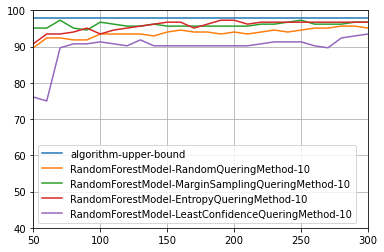

In [24]:
models = ['RandomForestModel']
quering_methods = ['RandomQueringMethod', 'MarginSamplingQueringMethod', 'EntropyQueringMethod', 'LeastConfidenceQueringMethod']
Ks = ['10']
# Ks = ['10','25']
repeats = 1
random_forest_upper_bound = 98.
total_experiments = len(models) * len(quering_methods) * len(Ks) * repeats


plot_results(random_forest_upper_bound, d, ['RandomForestModel'] , quering_methods    , Ks, 1)

Prikaz obucavanja modela, pri selektovanju 25 novih elemenata za obuku

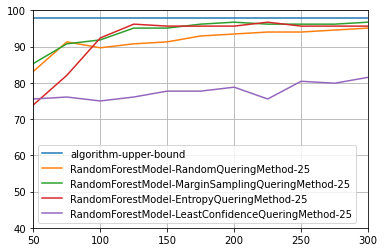

In [25]:
models = ['RandomForestModel']
quering_methods = ['RandomQueringMethod', 'MarginSamplingQueringMethod', 'EntropyQueringMethod', 'LeastConfidenceQueringMethod']
Ks = ['25']
# Ks = ['10','25']
repeats = 1
random_forest_upper_bound = 98.
total_experiments = len(models) * len(quering_methods) * len(Ks) * repeats


plot_results(random_forest_upper_bound, d, ['RandomForestModel'] , quering_methods    , Ks, 1)

Prikaz obucavanja modela, pri selektovanju 50 novih elemenata za obuku

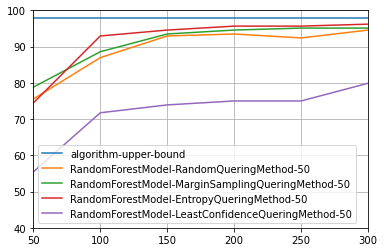

In [26]:
models = ['RandomForestModel']
quering_methods = ['RandomQueringMethod', 'MarginSamplingQueringMethod', 'EntropyQueringMethod', 'LeastConfidenceQueringMethod']
Ks = ['50']
# Ks = ['10','25']
repeats = 1
random_forest_upper_bound = 98.
total_experiments = len(models) * len(quering_methods) * len(Ks) * repeats


plot_results(random_forest_upper_bound, d, ['RandomForestModel'] , quering_methods    , Ks, 1)

<h2>CatBoost experiments</h2>

In [27]:
max_queried = 300

repeats = 1


models = [CatBoostModel] 


quering_methods = [ RandomQueringMethod, MarginSamplingQueringMethod, EntropyQueringMethod, LeastConfidenceQueringMethod]  # LeastConfidenceQueringMethod


Ks = [10,25,50]

d = {}
stopped_at = -1 

d = experiment(d, models, quering_methods, Ks, repeats, stopped_at+1)
print (d)
results = json.loads(json.dumps(d, indent=2, sort_keys=True))
print(results)

stopping at: 300
Count = 1, using model = CatBoostModel, quering_method = RandomQueringMethod, k = 10, iteration = 0.
initial train set: (10, 25) (10,) unique(labels): [8 2] [0 1]
Train set: (10, 25) y: (10,)
Val   set: (726, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.5938827	total: 146ms	remaining: 14.5s
1:	learn: 0.5675524	total: 149ms	remaining: 7.28s
2:	learn: 0.5397583	total: 151ms	remaining: 4.89s
3:	learn: 0.4782606	total: 153ms	remaining: 3.68s
4:	learn: 0.4422195	total: 156ms	remaining: 2.96s
5:	learn: 0.3867869	total: 157ms	remaining: 2.46s
6:	learn: 0.3625133	total: 159ms	remaining: 2.11s
7:	learn: 0.3342722	total: 160ms	remaining: 1.84s
8:	learn: 0.3075731	total: 161ms	remaining: 1.63s
9:	learn: 0.2904520	total: 163ms	remaining: 1.46s
10:	learn: 0.2676894	total: 164ms	remaining: 1.32s
11:	learn: 0.2506570	total: 165ms	remaining: 1.21s
12:	learn: 0.2320969	total: 166ms	remaining: 1.11s
13:	learn: 0.2181642	total: 167ms	remaining: 1.03s
14:	learn: 0.2024217	to

63:	learn: 0.0337384	total: 177ms	remaining: 99.3ms
64:	learn: 0.0331800	total: 179ms	remaining: 96.3ms
65:	learn: 0.0325384	total: 181ms	remaining: 93.3ms
66:	learn: 0.0318472	total: 183ms	remaining: 90.3ms
67:	learn: 0.0313318	total: 185ms	remaining: 87ms
68:	learn: 0.0306469	total: 187ms	remaining: 84ms
69:	learn: 0.0301446	total: 189ms	remaining: 81.1ms
70:	learn: 0.0296909	total: 191ms	remaining: 78.1ms
71:	learn: 0.0291931	total: 193ms	remaining: 75.1ms
72:	learn: 0.0287638	total: 195ms	remaining: 72.2ms
73:	learn: 0.0283251	total: 197ms	remaining: 69.3ms
74:	learn: 0.0279218	total: 199ms	remaining: 66.4ms
75:	learn: 0.0275371	total: 201ms	remaining: 63.4ms
76:	learn: 0.0271259	total: 202ms	remaining: 60.5ms
77:	learn: 0.0268230	total: 204ms	remaining: 57.5ms
78:	learn: 0.0264357	total: 205ms	remaining: 54.6ms
79:	learn: 0.0260640	total: 207ms	remaining: 51.8ms
80:	learn: 0.0257096	total: 209ms	remaining: 49ms
81:	learn: 0.0253663	total: 211ms	remaining: 46.3ms
82:	learn: 0.02502

82:	learn: 0.0170394	total: 142ms	remaining: 29ms
83:	learn: 0.0167615	total: 144ms	remaining: 27.5ms
84:	learn: 0.0164484	total: 146ms	remaining: 25.8ms
85:	learn: 0.0161851	total: 148ms	remaining: 24.1ms
86:	learn: 0.0158923	total: 150ms	remaining: 22.4ms
87:	learn: 0.0156803	total: 152ms	remaining: 20.7ms
88:	learn: 0.0154403	total: 154ms	remaining: 19ms
89:	learn: 0.0152079	total: 156ms	remaining: 17.3ms
90:	learn: 0.0149817	total: 169ms	remaining: 16.7ms
91:	learn: 0.0147635	total: 171ms	remaining: 14.8ms
92:	learn: 0.0145520	total: 172ms	remaining: 13ms
93:	learn: 0.0143477	total: 174ms	remaining: 11.1ms
94:	learn: 0.0141480	total: 175ms	remaining: 9.23ms
95:	learn: 0.0139541	total: 177ms	remaining: 7.37ms
96:	learn: 0.0137656	total: 178ms	remaining: 5.52ms
97:	learn: 0.0135830	total: 180ms	remaining: 3.67ms
98:	learn: 0.0134044	total: 181ms	remaining: 1.83ms
99:	learn: 0.0132310	total: 183ms	remaining: 0us
-----------------------------------
In iteration:  4

Accuracy for 88.586

updated train set: (70, 25) (70,) unique(labels): [49 21] [0 1]
Train set: (70, 25) y: (70,)
Val   set: (666, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.6052967	total: 16.6ms	remaining: 1.64s
1:	learn: 0.5352606	total: 19ms	remaining: 930ms
2:	learn: 0.4766200	total: 20.8ms	remaining: 673ms
3:	learn: 0.4290417	total: 22.9ms	remaining: 550ms
4:	learn: 0.3849092	total: 24.8ms	remaining: 471ms
5:	learn: 0.3565222	total: 27ms	remaining: 422ms
6:	learn: 0.3269332	total: 29ms	remaining: 385ms
7:	learn: 0.2989163	total: 30.8ms	remaining: 354ms
8:	learn: 0.2821164	total: 32.7ms	remaining: 331ms
9:	learn: 0.2663996	total: 34.6ms	remaining: 311ms
10:	learn: 0.2503916	total: 36.3ms	remaining: 294ms
11:	learn: 0.2392877	total: 38ms	remaining: 279ms
12:	learn: 0.2255900	total: 40ms	remaining: 268ms
13:	learn: 0.2166987	total: 41.9ms	remaining: 257ms
14:	learn: 0.2080257	total: 44.1ms	remaining: 250ms
15:	learn: 0.1991416	total: 46ms	remaining: 241ms
16:	learn: 0.1870589	total: 47.9m

8:	learn: 0.2371452	total: 14.9ms	remaining: 151ms
9:	learn: 0.2234042	total: 16.8ms	remaining: 151ms
10:	learn: 0.2086923	total: 18.8ms	remaining: 152ms
11:	learn: 0.1946904	total: 20.6ms	remaining: 151ms
12:	learn: 0.1790961	total: 22.8ms	remaining: 153ms
13:	learn: 0.1645903	total: 24.6ms	remaining: 151ms
14:	learn: 0.1528418	total: 26.7ms	remaining: 151ms
15:	learn: 0.1464187	total: 28.6ms	remaining: 150ms
16:	learn: 0.1386465	total: 30.3ms	remaining: 148ms
17:	learn: 0.1297243	total: 31.7ms	remaining: 145ms
18:	learn: 0.1239007	total: 32.7ms	remaining: 140ms
19:	learn: 0.1152197	total: 34.4ms	remaining: 138ms
20:	learn: 0.1136253	total: 36.5ms	remaining: 137ms
21:	learn: 0.1073258	total: 38.3ms	remaining: 136ms
22:	learn: 0.1033014	total: 39.7ms	remaining: 133ms
23:	learn: 0.1000361	total: 41.3ms	remaining: 131ms
24:	learn: 0.0963993	total: 43.3ms	remaining: 130ms
25:	learn: 0.0945389	total: 44.9ms	remaining: 128ms
26:	learn: 0.0904901	total: 46.3ms	remaining: 125ms
27:	learn: 0.0

78:	learn: 0.0193356	total: 146ms	remaining: 38.8ms
79:	learn: 0.0187630	total: 148ms	remaining: 36.9ms
80:	learn: 0.0181350	total: 150ms	remaining: 35.1ms
81:	learn: 0.0178342	total: 152ms	remaining: 33.3ms
82:	learn: 0.0174733	total: 153ms	remaining: 31.4ms
83:	learn: 0.0171896	total: 155ms	remaining: 29.6ms
84:	learn: 0.0169159	total: 157ms	remaining: 27.7ms
85:	learn: 0.0165976	total: 159ms	remaining: 25.8ms
86:	learn: 0.0163388	total: 160ms	remaining: 24ms
87:	learn: 0.0160828	total: 162ms	remaining: 22.1ms
88:	learn: 0.0158568	total: 163ms	remaining: 20.2ms
89:	learn: 0.0156156	total: 165ms	remaining: 18.4ms
90:	learn: 0.0153851	total: 167ms	remaining: 16.5ms
91:	learn: 0.0151646	total: 169ms	remaining: 14.7ms
92:	learn: 0.0148801	total: 171ms	remaining: 12.9ms
93:	learn: 0.0146366	total: 173ms	remaining: 11ms
94:	learn: 0.0144130	total: 174ms	remaining: 9.18ms
95:	learn: 0.0140880	total: 176ms	remaining: 7.33ms
96:	learn: 0.0137791	total: 178ms	remaining: 5.5ms
97:	learn: 0.0134

78:	learn: 0.0206538	total: 175ms	remaining: 46.4ms
79:	learn: 0.0201286	total: 177ms	remaining: 44.2ms
80:	learn: 0.0196854	total: 178ms	remaining: 41.9ms
81:	learn: 0.0193415	total: 180ms	remaining: 39.5ms
82:	learn: 0.0189633	total: 182ms	remaining: 37.3ms
83:	learn: 0.0186387	total: 184ms	remaining: 35ms
84:	learn: 0.0183252	total: 185ms	remaining: 32.7ms
85:	learn: 0.0179205	total: 187ms	remaining: 30.5ms
86:	learn: 0.0175343	total: 189ms	remaining: 28.2ms
87:	learn: 0.0172352	total: 191ms	remaining: 26ms
88:	learn: 0.0169094	total: 192ms	remaining: 23.8ms
89:	learn: 0.0165781	total: 194ms	remaining: 21.6ms
90:	learn: 0.0162689	total: 197ms	remaining: 19.4ms
91:	learn: 0.0159775	total: 198ms	remaining: 17.3ms
92:	learn: 0.0158093	total: 200ms	remaining: 15.1ms
93:	learn: 0.0155669	total: 202ms	remaining: 12.9ms
94:	learn: 0.0153168	total: 204ms	remaining: 10.8ms
95:	learn: 0.0150219	total: 206ms	remaining: 8.58ms
96:	learn: 0.0146437	total: 208ms	remaining: 6.42ms
97:	learn: 0.014

29:	learn: 0.0876718	total: 52.5ms	remaining: 123ms
30:	learn: 0.0868656	total: 54.5ms	remaining: 121ms
31:	learn: 0.0831894	total: 56.7ms	remaining: 121ms
32:	learn: 0.0781083	total: 58.5ms	remaining: 119ms
33:	learn: 0.0744701	total: 60.4ms	remaining: 117ms
34:	learn: 0.0717856	total: 62.7ms	remaining: 116ms
35:	learn: 0.0697486	total: 64.6ms	remaining: 115ms
36:	learn: 0.0679711	total: 66.6ms	remaining: 113ms
37:	learn: 0.0665961	total: 69.2ms	remaining: 113ms
38:	learn: 0.0651239	total: 71.2ms	remaining: 111ms
39:	learn: 0.0627637	total: 72.9ms	remaining: 109ms
40:	learn: 0.0607639	total: 74.4ms	remaining: 107ms
41:	learn: 0.0593914	total: 76.3ms	remaining: 105ms
42:	learn: 0.0578520	total: 78.5ms	remaining: 104ms
43:	learn: 0.0555399	total: 80.3ms	remaining: 102ms
44:	learn: 0.0537852	total: 82.6ms	remaining: 101ms
45:	learn: 0.0519224	total: 84.9ms	remaining: 99.7ms
46:	learn: 0.0504136	total: 86.8ms	remaining: 97.9ms
47:	learn: 0.0488305	total: 88.5ms	remaining: 95.9ms
48:	learn

12:	learn: 0.1702796	total: 43.2ms	remaining: 289ms
13:	learn: 0.1603242	total: 46ms	remaining: 283ms
14:	learn: 0.1522809	total: 48.3ms	remaining: 274ms
15:	learn: 0.1464597	total: 50.9ms	remaining: 267ms
16:	learn: 0.1391174	total: 53.7ms	remaining: 262ms
17:	learn: 0.1330530	total: 56.6ms	remaining: 258ms
18:	learn: 0.1248731	total: 59.8ms	remaining: 255ms
19:	learn: 0.1178608	total: 62.4ms	remaining: 250ms
20:	learn: 0.1119245	total: 65.2ms	remaining: 245ms
21:	learn: 0.1077512	total: 68.3ms	remaining: 242ms
22:	learn: 0.1043334	total: 70.9ms	remaining: 237ms
23:	learn: 0.1014741	total: 73.5ms	remaining: 233ms
24:	learn: 0.0968339	total: 76.7ms	remaining: 230ms
25:	learn: 0.0924678	total: 79.5ms	remaining: 226ms
26:	learn: 0.0886315	total: 82.2ms	remaining: 222ms
27:	learn: 0.0842217	total: 84.7ms	remaining: 218ms
28:	learn: 0.0828154	total: 86.8ms	remaining: 212ms
29:	learn: 0.0788891	total: 90.2ms	remaining: 210ms
30:	learn: 0.0761501	total: 92.9ms	remaining: 207ms
31:	learn: 0.0

92:	learn: 0.0147627	total: 233ms	remaining: 17.6ms
93:	learn: 0.0145830	total: 236ms	remaining: 15.1ms
94:	learn: 0.0143035	total: 238ms	remaining: 12.5ms
95:	learn: 0.0141488	total: 239ms	remaining: 9.98ms
96:	learn: 0.0138934	total: 242ms	remaining: 7.47ms
97:	learn: 0.0136533	total: 243ms	remaining: 4.96ms
98:	learn: 0.0134352	total: 246ms	remaining: 2.48ms
99:	learn: 0.0132159	total: 249ms	remaining: 0us
-----------------------------------
In iteration:  17

Accuracy for 95.652174 
updated train set: (180, 25) (180,) unique(labels): [129  51] [0 1]
Train set: (180, 25) y: (180,)
Val   set: (556, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.5835904	total: 9.28ms	remaining: 919ms
1:	learn: 0.4875801	total: 24.8ms	remaining: 1.21s
2:	learn: 0.4214701	total: 27ms	remaining: 874ms
3:	learn: 0.3741501	total: 29.2ms	remaining: 700ms
4:	learn: 0.3254442	total: 31.2ms	remaining: 594ms
5:	learn: 0.2966111	total: 33.4ms	remaining: 523ms
6:	learn: 0.2652837	total: 35.6ms	remaini

51:	learn: 0.0453622	total: 154ms	remaining: 142ms
52:	learn: 0.0444354	total: 157ms	remaining: 139ms
53:	learn: 0.0432378	total: 159ms	remaining: 136ms
54:	learn: 0.0421529	total: 161ms	remaining: 132ms
55:	learn: 0.0415441	total: 164ms	remaining: 129ms
56:	learn: 0.0402185	total: 166ms	remaining: 125ms
57:	learn: 0.0391189	total: 168ms	remaining: 122ms
58:	learn: 0.0378682	total: 170ms	remaining: 118ms
59:	learn: 0.0375394	total: 172ms	remaining: 115ms
60:	learn: 0.0363940	total: 175ms	remaining: 112ms
61:	learn: 0.0351954	total: 179ms	remaining: 109ms
62:	learn: 0.0349522	total: 181ms	remaining: 106ms
63:	learn: 0.0338261	total: 183ms	remaining: 103ms
64:	learn: 0.0327870	total: 185ms	remaining: 99.8ms
65:	learn: 0.0322116	total: 188ms	remaining: 96.7ms
66:	learn: 0.0307708	total: 190ms	remaining: 93.4ms
67:	learn: 0.0299545	total: 192ms	remaining: 90.2ms
68:	learn: 0.0289511	total: 194ms	remaining: 87.2ms
69:	learn: 0.0281951	total: 197ms	remaining: 84.4ms
70:	learn: 0.0276700	tota

32:	learn: 0.0770729	total: 79.2ms	remaining: 161ms
33:	learn: 0.0745568	total: 81.2ms	remaining: 158ms
34:	learn: 0.0713319	total: 83.2ms	remaining: 154ms
35:	learn: 0.0697696	total: 85.2ms	remaining: 151ms
36:	learn: 0.0685548	total: 87.4ms	remaining: 149ms
37:	learn: 0.0676769	total: 89ms	remaining: 145ms
38:	learn: 0.0659553	total: 91.1ms	remaining: 142ms
39:	learn: 0.0638310	total: 93.6ms	remaining: 140ms
40:	learn: 0.0625972	total: 95.8ms	remaining: 138ms
41:	learn: 0.0611018	total: 98.2ms	remaining: 136ms
42:	learn: 0.0593327	total: 101ms	remaining: 134ms
43:	learn: 0.0572914	total: 103ms	remaining: 131ms
44:	learn: 0.0551872	total: 105ms	remaining: 129ms
45:	learn: 0.0529804	total: 108ms	remaining: 126ms
46:	learn: 0.0506556	total: 110ms	remaining: 124ms
47:	learn: 0.0493252	total: 112ms	remaining: 121ms
48:	learn: 0.0471132	total: 114ms	remaining: 119ms
49:	learn: 0.0458258	total: 117ms	remaining: 117ms
50:	learn: 0.0447243	total: 119ms	remaining: 114ms
51:	learn: 0.0441519	to

0:	learn: 0.5657561	total: 3.31ms	remaining: 328ms
1:	learn: 0.4680930	total: 6.48ms	remaining: 318ms
2:	learn: 0.4033530	total: 8.87ms	remaining: 287ms
3:	learn: 0.3441770	total: 11.3ms	remaining: 270ms
4:	learn: 0.2995632	total: 13.6ms	remaining: 259ms
5:	learn: 0.2716938	total: 16.1ms	remaining: 253ms
6:	learn: 0.2443834	total: 18.7ms	remaining: 248ms
7:	learn: 0.2201545	total: 20.8ms	remaining: 240ms
8:	learn: 0.2034830	total: 23.2ms	remaining: 234ms
9:	learn: 0.1852637	total: 25.7ms	remaining: 231ms
10:	learn: 0.1707717	total: 28ms	remaining: 226ms
11:	learn: 0.1621482	total: 30.2ms	remaining: 222ms
12:	learn: 0.1519945	total: 32.9ms	remaining: 220ms
13:	learn: 0.1462439	total: 35.1ms	remaining: 216ms
14:	learn: 0.1363774	total: 37.7ms	remaining: 214ms
15:	learn: 0.1267547	total: 40.6ms	remaining: 213ms
16:	learn: 0.1212413	total: 43.7ms	remaining: 213ms
17:	learn: 0.1151303	total: 46.2ms	remaining: 210ms
18:	learn: 0.1107614	total: 48.6ms	remaining: 207ms
19:	learn: 0.1055228	tot

69:	learn: 0.0253037	total: 185ms	remaining: 79.4ms
70:	learn: 0.0247765	total: 188ms	remaining: 76.6ms
71:	learn: 0.0243833	total: 190ms	remaining: 73.9ms
72:	learn: 0.0242175	total: 192ms	remaining: 71.2ms
73:	learn: 0.0233204	total: 195ms	remaining: 68.5ms
74:	learn: 0.0226519	total: 197ms	remaining: 65.8ms
75:	learn: 0.0222504	total: 200ms	remaining: 63.2ms
76:	learn: 0.0217173	total: 203ms	remaining: 60.6ms
77:	learn: 0.0210335	total: 206ms	remaining: 58ms
78:	learn: 0.0209590	total: 208ms	remaining: 55.4ms
79:	learn: 0.0203465	total: 214ms	remaining: 53.6ms
80:	learn: 0.0197123	total: 217ms	remaining: 50.9ms
81:	learn: 0.0193741	total: 219ms	remaining: 48.1ms
82:	learn: 0.0188131	total: 222ms	remaining: 45.4ms
83:	learn: 0.0183140	total: 224ms	remaining: 42.7ms
84:	learn: 0.0180540	total: 226ms	remaining: 40ms
85:	learn: 0.0177520	total: 229ms	remaining: 37.3ms
86:	learn: 0.0175332	total: 233ms	remaining: 34.8ms
87:	learn: 0.0172863	total: 236ms	remaining: 32.1ms
88:	learn: 0.017

27:	learn: 0.0730911	total: 85.4ms	remaining: 219ms
28:	learn: 0.0703556	total: 88ms	remaining: 216ms
29:	learn: 0.0692702	total: 90.3ms	remaining: 211ms
30:	learn: 0.0676953	total: 92.3ms	remaining: 205ms
31:	learn: 0.0639884	total: 95ms	remaining: 202ms
32:	learn: 0.0620350	total: 97.4ms	remaining: 198ms
33:	learn: 0.0611516	total: 99.7ms	remaining: 194ms
34:	learn: 0.0588798	total: 102ms	remaining: 190ms
35:	learn: 0.0573859	total: 104ms	remaining: 186ms
36:	learn: 0.0562116	total: 107ms	remaining: 181ms
37:	learn: 0.0558779	total: 109ms	remaining: 178ms
38:	learn: 0.0548305	total: 112ms	remaining: 175ms
39:	learn: 0.0531084	total: 114ms	remaining: 171ms
40:	learn: 0.0509577	total: 116ms	remaining: 167ms
41:	learn: 0.0499953	total: 118ms	remaining: 163ms
42:	learn: 0.0496517	total: 120ms	remaining: 160ms
43:	learn: 0.0492977	total: 122ms	remaining: 156ms
44:	learn: 0.0479316	total: 125ms	remaining: 152ms
45:	learn: 0.0468502	total: 127ms	remaining: 149ms
46:	learn: 0.0454706	total: 

9:	learn: 0.1823266	total: 25.4ms	remaining: 228ms
10:	learn: 0.1677433	total: 27.7ms	remaining: 224ms
11:	learn: 0.1558632	total: 30.8ms	remaining: 226ms
12:	learn: 0.1461487	total: 33.6ms	remaining: 225ms
13:	learn: 0.1376150	total: 36.1ms	remaining: 222ms
14:	learn: 0.1274967	total: 38.8ms	remaining: 220ms
15:	learn: 0.1205767	total: 41.5ms	remaining: 218ms
16:	learn: 0.1135709	total: 44ms	remaining: 215ms
17:	learn: 0.1083233	total: 46.8ms	remaining: 213ms
18:	learn: 0.1036218	total: 49.6ms	remaining: 212ms
19:	learn: 0.0999880	total: 52.5ms	remaining: 210ms
20:	learn: 0.0951703	total: 54.6ms	remaining: 205ms
21:	learn: 0.0922705	total: 56.7ms	remaining: 201ms
22:	learn: 0.0906426	total: 58.9ms	remaining: 197ms
23:	learn: 0.0888242	total: 61.5ms	remaining: 195ms
24:	learn: 0.0864527	total: 64ms	remaining: 192ms
25:	learn: 0.0841131	total: 66.7ms	remaining: 190ms
26:	learn: 0.0804389	total: 69.2ms	remaining: 187ms
27:	learn: 0.0783504	total: 71.7ms	remaining: 184ms
28:	learn: 0.0769

0:	learn: 0.5650964	total: 13ms	remaining: 1.29s
1:	learn: 0.4626779	total: 15.7ms	remaining: 771ms
2:	learn: 0.3976613	total: 17.8ms	remaining: 575ms
3:	learn: 0.3482008	total: 20ms	remaining: 480ms
4:	learn: 0.3048296	total: 22.8ms	remaining: 434ms
5:	learn: 0.2734432	total: 25.1ms	remaining: 394ms
6:	learn: 0.2458735	total: 27.6ms	remaining: 366ms
7:	learn: 0.2200242	total: 30.1ms	remaining: 346ms
8:	learn: 0.2042106	total: 32.5ms	remaining: 329ms
9:	learn: 0.1878404	total: 34.9ms	remaining: 314ms
10:	learn: 0.1717822	total: 37.2ms	remaining: 301ms
11:	learn: 0.1596007	total: 39.4ms	remaining: 289ms
12:	learn: 0.1489218	total: 41.8ms	remaining: 280ms
13:	learn: 0.1388246	total: 44.5ms	remaining: 273ms
14:	learn: 0.1312072	total: 46.8ms	remaining: 265ms
15:	learn: 0.1255636	total: 49.2ms	remaining: 258ms
16:	learn: 0.1225581	total: 51.4ms	remaining: 251ms
17:	learn: 0.1153725	total: 54ms	remaining: 246ms
18:	learn: 0.1097028	total: 56.4ms	remaining: 241ms
19:	learn: 0.1053319	total: 

66:	learn: 0.0279569	total: 129ms	remaining: 63.6ms
67:	learn: 0.0272656	total: 131ms	remaining: 61.9ms
68:	learn: 0.0265838	total: 133ms	remaining: 59.8ms
69:	learn: 0.0260318	total: 135ms	remaining: 58ms
70:	learn: 0.0254094	total: 137ms	remaining: 56ms
71:	learn: 0.0248105	total: 139ms	remaining: 53.9ms
72:	learn: 0.0242284	total: 140ms	remaining: 51.9ms
73:	learn: 0.0236759	total: 142ms	remaining: 49.9ms
74:	learn: 0.0231459	total: 144ms	remaining: 48ms
75:	learn: 0.0227053	total: 146ms	remaining: 46.1ms
76:	learn: 0.0222188	total: 148ms	remaining: 44.1ms
77:	learn: 0.0217805	total: 149ms	remaining: 42.1ms
78:	learn: 0.0213324	total: 151ms	remaining: 40ms
79:	learn: 0.0209608	total: 152ms	remaining: 38ms
80:	learn: 0.0206104	total: 153ms	remaining: 36ms
81:	learn: 0.0202097	total: 155ms	remaining: 34.1ms
82:	learn: 0.0198870	total: 157ms	remaining: 32.2ms
83:	learn: 0.0195765	total: 159ms	remaining: 30.3ms
84:	learn: 0.0192766	total: 161ms	remaining: 28.4ms
85:	learn: 0.0189856	tot

77:	learn: 0.0582524	total: 163ms	remaining: 45.8ms
78:	learn: 0.0578005	total: 165ms	remaining: 43.9ms
79:	learn: 0.0559980	total: 168ms	remaining: 41.9ms
80:	learn: 0.0556012	total: 169ms	remaining: 39.7ms
81:	learn: 0.0540980	total: 171ms	remaining: 37.5ms
82:	learn: 0.0537747	total: 173ms	remaining: 35.3ms
83:	learn: 0.0517229	total: 175ms	remaining: 33.3ms
84:	learn: 0.0511001	total: 177ms	remaining: 31.2ms
85:	learn: 0.0507914	total: 179ms	remaining: 29.1ms
86:	learn: 0.0501499	total: 181ms	remaining: 27.1ms
87:	learn: 0.0498530	total: 184ms	remaining: 25.1ms
88:	learn: 0.0481657	total: 186ms	remaining: 23ms
89:	learn: 0.0478841	total: 188ms	remaining: 20.8ms
90:	learn: 0.0473204	total: 189ms	remaining: 18.7ms
91:	learn: 0.0457240	total: 193ms	remaining: 16.8ms
92:	learn: 0.0453884	total: 195ms	remaining: 14.7ms
93:	learn: 0.0450713	total: 197ms	remaining: 12.6ms
94:	learn: 0.0442302	total: 200ms	remaining: 10.5ms
95:	learn: 0.0439708	total: 202ms	remaining: 8.4ms
96:	learn: 0.04

54:	learn: 0.0986629	total: 152ms	remaining: 124ms
55:	learn: 0.0963535	total: 154ms	remaining: 121ms
56:	learn: 0.0948035	total: 156ms	remaining: 118ms
57:	learn: 0.0928043	total: 159ms	remaining: 115ms
58:	learn: 0.0895607	total: 161ms	remaining: 112ms
59:	learn: 0.0881947	total: 163ms	remaining: 109ms
60:	learn: 0.0844751	total: 165ms	remaining: 106ms
61:	learn: 0.0832258	total: 168ms	remaining: 103ms
62:	learn: 0.0793389	total: 170ms	remaining: 100ms
63:	learn: 0.0774531	total: 172ms	remaining: 96.8ms
64:	learn: 0.0755208	total: 174ms	remaining: 93.6ms
65:	learn: 0.0735605	total: 176ms	remaining: 90.6ms
66:	learn: 0.0719661	total: 178ms	remaining: 87.9ms
67:	learn: 0.0704607	total: 180ms	remaining: 84.8ms
68:	learn: 0.0695607	total: 182ms	remaining: 81.8ms
69:	learn: 0.0684317	total: 184ms	remaining: 78.9ms
70:	learn: 0.0667915	total: 185ms	remaining: 75.7ms
71:	learn: 0.0641398	total: 187ms	remaining: 72.7ms
72:	learn: 0.0626211	total: 189ms	remaining: 69.9ms
73:	learn: 0.0609695	

56:	learn: 0.0912750	total: 140ms	remaining: 106ms
57:	learn: 0.0900113	total: 143ms	remaining: 104ms
58:	learn: 0.0875024	total: 146ms	remaining: 102ms
59:	learn: 0.0861979	total: 149ms	remaining: 99.3ms
60:	learn: 0.0850869	total: 152ms	remaining: 97ms
61:	learn: 0.0840377	total: 154ms	remaining: 94.6ms
62:	learn: 0.0832968	total: 157ms	remaining: 92.2ms
63:	learn: 0.0812536	total: 160ms	remaining: 89.8ms
64:	learn: 0.0804772	total: 162ms	remaining: 87.4ms
65:	learn: 0.0789818	total: 165ms	remaining: 84.8ms
66:	learn: 0.0780802	total: 167ms	remaining: 82.2ms
67:	learn: 0.0760444	total: 169ms	remaining: 79.7ms
68:	learn: 0.0738826	total: 172ms	remaining: 77.2ms
69:	learn: 0.0720335	total: 175ms	remaining: 74.9ms
70:	learn: 0.0707148	total: 177ms	remaining: 72.4ms
71:	learn: 0.0698786	total: 180ms	remaining: 70ms
72:	learn: 0.0695500	total: 182ms	remaining: 67.4ms
73:	learn: 0.0687191	total: 184ms	remaining: 64.7ms
74:	learn: 0.0671080	total: 187ms	remaining: 62.2ms
75:	learn: 0.066384

10:	learn: 0.2554295	total: 42.8ms	remaining: 346ms
11:	learn: 0.2461127	total: 45.9ms	remaining: 336ms
12:	learn: 0.2358195	total: 48.6ms	remaining: 325ms
13:	learn: 0.2270227	total: 51.5ms	remaining: 316ms
14:	learn: 0.2185446	total: 54.3ms	remaining: 308ms
15:	learn: 0.2065221	total: 56.9ms	remaining: 299ms
16:	learn: 0.1984689	total: 59.6ms	remaining: 291ms
17:	learn: 0.1933569	total: 61.9ms	remaining: 282ms
18:	learn: 0.1875962	total: 64.4ms	remaining: 275ms
19:	learn: 0.1817613	total: 66.6ms	remaining: 266ms
20:	learn: 0.1753303	total: 68.9ms	remaining: 259ms
21:	learn: 0.1730378	total: 71ms	remaining: 252ms
22:	learn: 0.1695887	total: 73.5ms	remaining: 246ms
23:	learn: 0.1669857	total: 75.9ms	remaining: 240ms
24:	learn: 0.1651114	total: 77.9ms	remaining: 234ms
25:	learn: 0.1600381	total: 79.9ms	remaining: 227ms
26:	learn: 0.1559690	total: 81.9ms	remaining: 221ms
27:	learn: 0.1534749	total: 83.9ms	remaining: 216ms
28:	learn: 0.1507183	total: 85.9ms	remaining: 210ms
29:	learn: 0.1

74:	learn: 0.0678176	total: 251ms	remaining: 83.7ms
75:	learn: 0.0670518	total: 255ms	remaining: 80.5ms
76:	learn: 0.0652337	total: 258ms	remaining: 77.2ms
77:	learn: 0.0645461	total: 261ms	remaining: 73.7ms
78:	learn: 0.0622270	total: 264ms	remaining: 70.3ms
79:	learn: 0.0616198	total: 268ms	remaining: 66.9ms
80:	learn: 0.0594412	total: 272ms	remaining: 63.7ms
81:	learn: 0.0593107	total: 275ms	remaining: 60.3ms
82:	learn: 0.0583443	total: 278ms	remaining: 56.9ms
83:	learn: 0.0578639	total: 281ms	remaining: 53.6ms
84:	learn: 0.0573503	total: 285ms	remaining: 50.2ms
85:	learn: 0.0560769	total: 288ms	remaining: 46.8ms
86:	learn: 0.0554764	total: 291ms	remaining: 43.4ms
87:	learn: 0.0547921	total: 293ms	remaining: 40ms
88:	learn: 0.0541340	total: 296ms	remaining: 36.6ms
89:	learn: 0.0537125	total: 299ms	remaining: 33.2ms
90:	learn: 0.0525672	total: 302ms	remaining: 29.9ms
91:	learn: 0.0508593	total: 306ms	remaining: 26.6ms
92:	learn: 0.0494738	total: 309ms	remaining: 23.3ms
93:	learn: 0.0

72:	learn: 0.0772205	total: 194ms	remaining: 71.6ms
73:	learn: 0.0764362	total: 196ms	remaining: 69ms
74:	learn: 0.0747645	total: 199ms	remaining: 66.3ms
75:	learn: 0.0739127	total: 202ms	remaining: 63.6ms
76:	learn: 0.0724483	total: 204ms	remaining: 61.1ms
77:	learn: 0.0708153	total: 207ms	remaining: 58.5ms
78:	learn: 0.0681145	total: 210ms	remaining: 55.9ms
79:	learn: 0.0674345	total: 213ms	remaining: 53.4ms
80:	learn: 0.0668054	total: 216ms	remaining: 50.7ms
81:	learn: 0.0664009	total: 219ms	remaining: 48.1ms
82:	learn: 0.0658249	total: 221ms	remaining: 45.4ms
83:	learn: 0.0640098	total: 225ms	remaining: 42.8ms
84:	learn: 0.0635784	total: 227ms	remaining: 40.1ms
85:	learn: 0.0632624	total: 230ms	remaining: 37.5ms
86:	learn: 0.0615284	total: 233ms	remaining: 34.8ms
87:	learn: 0.0613442	total: 235ms	remaining: 32.1ms
88:	learn: 0.0603420	total: 238ms	remaining: 29.4ms
89:	learn: 0.0593252	total: 241ms	remaining: 26.8ms
90:	learn: 0.0588845	total: 244ms	remaining: 24.1ms
91:	learn: 0.0

24:	learn: 0.2719800	total: 57.5ms	remaining: 172ms
25:	learn: 0.2631602	total: 59.8ms	remaining: 170ms
26:	learn: 0.2563038	total: 61.7ms	remaining: 167ms
27:	learn: 0.2538190	total: 63.5ms	remaining: 163ms
28:	learn: 0.2499235	total: 65.2ms	remaining: 160ms
29:	learn: 0.2440502	total: 67ms	remaining: 156ms
30:	learn: 0.2413667	total: 68.9ms	remaining: 153ms
31:	learn: 0.2375403	total: 71.5ms	remaining: 152ms
32:	learn: 0.2330277	total: 74.3ms	remaining: 151ms
33:	learn: 0.2301357	total: 76.9ms	remaining: 149ms
34:	learn: 0.2281784	total: 79.3ms	remaining: 147ms
35:	learn: 0.2231055	total: 81.7ms	remaining: 145ms
36:	learn: 0.2201819	total: 83.9ms	remaining: 143ms
37:	learn: 0.2170066	total: 86.3ms	remaining: 141ms
38:	learn: 0.2079798	total: 88.9ms	remaining: 139ms
39:	learn: 0.2044031	total: 91ms	remaining: 137ms
40:	learn: 0.1969543	total: 93.3ms	remaining: 134ms
41:	learn: 0.1917053	total: 95.4ms	remaining: 132ms
42:	learn: 0.1880571	total: 97.4ms	remaining: 129ms
43:	learn: 0.185

updated train set: (200, 25) (200,) unique(labels): [149  51] [0 1]
Train set: (200, 25) y: (200,)
Val   set: (536, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.6249457	total: 12.6ms	remaining: 1.24s
1:	learn: 0.5721474	total: 15.3ms	remaining: 750ms
2:	learn: 0.5214928	total: 17.8ms	remaining: 576ms
3:	learn: 0.4791021	total: 21ms	remaining: 504ms
4:	learn: 0.4478637	total: 24ms	remaining: 456ms
5:	learn: 0.4248947	total: 26.9ms	remaining: 421ms
6:	learn: 0.4027071	total: 29.4ms	remaining: 391ms
7:	learn: 0.3789727	total: 32.6ms	remaining: 375ms
8:	learn: 0.3572929	total: 35ms	remaining: 354ms
9:	learn: 0.3409454	total: 37.4ms	remaining: 337ms
10:	learn: 0.3331159	total: 40.1ms	remaining: 325ms
11:	learn: 0.3206839	total: 43ms	remaining: 315ms
12:	learn: 0.3094690	total: 45.8ms	remaining: 306ms
13:	learn: 0.2968115	total: 48.8ms	remaining: 300ms
14:	learn: 0.2874521	total: 51.7ms	remaining: 293ms
15:	learn: 0.2819159	total: 54.6ms	remaining: 287ms
16:	learn: 0.2782000	to

93:	learn: 0.0691519	total: 300ms	remaining: 19.2ms
94:	learn: 0.0684142	total: 303ms	remaining: 16ms
95:	learn: 0.0678795	total: 307ms	remaining: 12.8ms
96:	learn: 0.0670192	total: 310ms	remaining: 9.59ms
97:	learn: 0.0654995	total: 313ms	remaining: 6.39ms
98:	learn: 0.0648968	total: 316ms	remaining: 3.19ms
99:	learn: 0.0642391	total: 319ms	remaining: 0us
-----------------------------------
In iteration:  5

Accuracy for 92.934783 
updated train set: (300, 25) (300,) unique(labels): [226  74] [0 1]
Train set: (300, 25) y: (300,)
Val   set: (436, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.6057702	total: 26.9ms	remaining: 2.66s
1:	learn: 0.5369933	total: 29.7ms	remaining: 1.45s
2:	learn: 0.4875898	total: 32.2ms	remaining: 1.04s
3:	learn: 0.4422087	total: 35.1ms	remaining: 842ms
4:	learn: 0.4086030	total: 38.1ms	remaining: 725ms
5:	learn: 0.3776070	total: 40.9ms	remaining: 641ms
6:	learn: 0.3509563	total: 43.4ms	remaining: 576ms
7:	learn: 0.3289877	total: 46ms	remaining: 

48:	learn: 0.0575882	total: 82.9ms	remaining: 86.2ms
49:	learn: 0.0565275	total: 85.3ms	remaining: 85.3ms
50:	learn: 0.0547626	total: 87.2ms	remaining: 83.8ms
51:	learn: 0.0538669	total: 89.5ms	remaining: 82.6ms
52:	learn: 0.0529155	total: 91.2ms	remaining: 80.9ms
53:	learn: 0.0517017	total: 93.2ms	remaining: 79.4ms
54:	learn: 0.0506916	total: 95.7ms	remaining: 78.3ms
55:	learn: 0.0499189	total: 97.7ms	remaining: 76.8ms
56:	learn: 0.0491703	total: 100ms	remaining: 75.5ms
57:	learn: 0.0479263	total: 102ms	remaining: 74.2ms
58:	learn: 0.0467496	total: 104ms	remaining: 72.3ms
59:	learn: 0.0456197	total: 106ms	remaining: 70.6ms
60:	learn: 0.0449865	total: 108ms	remaining: 69ms
61:	learn: 0.0439354	total: 110ms	remaining: 67.3ms
62:	learn: 0.0429281	total: 112ms	remaining: 65.5ms
63:	learn: 0.0423647	total: 113ms	remaining: 63.8ms
64:	learn: 0.0418167	total: 115ms	remaining: 62.1ms
65:	learn: 0.0412811	total: 117ms	remaining: 60.2ms
66:	learn: 0.0407598	total: 118ms	remaining: 58.4ms
67:	le

47:	learn: 0.0562243	total: 87.9ms	remaining: 95.2ms
48:	learn: 0.0544608	total: 90.3ms	remaining: 94ms
49:	learn: 0.0526367	total: 93ms	remaining: 93ms
50:	learn: 0.0500897	total: 95.1ms	remaining: 91.4ms
51:	learn: 0.0487706	total: 97.5ms	remaining: 90ms
52:	learn: 0.0474227	total: 99.8ms	remaining: 88.5ms
53:	learn: 0.0457077	total: 102ms	remaining: 86.7ms
54:	learn: 0.0444261	total: 104ms	remaining: 85.5ms
55:	learn: 0.0432538	total: 107ms	remaining: 84.1ms
56:	learn: 0.0420942	total: 109ms	remaining: 82.3ms
57:	learn: 0.0411838	total: 111ms	remaining: 80.6ms
58:	learn: 0.0402361	total: 114ms	remaining: 78.9ms
59:	learn: 0.0392112	total: 115ms	remaining: 77ms
60:	learn: 0.0377553	total: 117ms	remaining: 75ms
61:	learn: 0.0369027	total: 119ms	remaining: 73ms
62:	learn: 0.0360359	total: 121ms	remaining: 71.2ms
63:	learn: 0.0353103	total: 123ms	remaining: 69.2ms
64:	learn: 0.0345651	total: 125ms	remaining: 67.3ms
65:	learn: 0.0339149	total: 127ms	remaining: 65.4ms
66:	learn: 0.0333579

28:	learn: 0.1413629	total: 56.6ms	remaining: 139ms
29:	learn: 0.1349871	total: 58.7ms	remaining: 137ms
30:	learn: 0.1299341	total: 60.4ms	remaining: 135ms
31:	learn: 0.1245944	total: 62ms	remaining: 132ms
32:	learn: 0.1202264	total: 63.6ms	remaining: 129ms
33:	learn: 0.1149751	total: 65.7ms	remaining: 127ms
34:	learn: 0.1106439	total: 67.6ms	remaining: 125ms
35:	learn: 0.1073099	total: 70.4ms	remaining: 125ms
36:	learn: 0.1028043	total: 72.6ms	remaining: 124ms
37:	learn: 0.0994434	total: 74.8ms	remaining: 122ms
38:	learn: 0.0957715	total: 77.2ms	remaining: 121ms
39:	learn: 0.0942969	total: 80ms	remaining: 120ms
40:	learn: 0.0912793	total: 82.5ms	remaining: 119ms
41:	learn: 0.0888829	total: 85.2ms	remaining: 118ms
42:	learn: 0.0864310	total: 87.6ms	remaining: 116ms
43:	learn: 0.0841348	total: 90.3ms	remaining: 115ms
44:	learn: 0.0821525	total: 92.2ms	remaining: 113ms
45:	learn: 0.0777007	total: 93.9ms	remaining: 110ms
46:	learn: 0.0742777	total: 95.9ms	remaining: 108ms
47:	learn: 0.071

18:	learn: 0.2396708	total: 50.5ms	remaining: 215ms
19:	learn: 0.2300591	total: 53ms	remaining: 212ms
20:	learn: 0.2184686	total: 55.6ms	remaining: 209ms
21:	learn: 0.2174066	total: 57.3ms	remaining: 203ms
22:	learn: 0.2061812	total: 59.4ms	remaining: 199ms
23:	learn: 0.1979116	total: 61.4ms	remaining: 194ms
24:	learn: 0.1934033	total: 63.7ms	remaining: 191ms
25:	learn: 0.1851235	total: 66.1ms	remaining: 188ms
26:	learn: 0.1779676	total: 68.2ms	remaining: 184ms
27:	learn: 0.1735756	total: 70.2ms	remaining: 180ms
28:	learn: 0.1680192	total: 72ms	remaining: 176ms
29:	learn: 0.1602962	total: 74.1ms	remaining: 173ms
30:	learn: 0.1544970	total: 75.9ms	remaining: 169ms
31:	learn: 0.1481166	total: 78ms	remaining: 166ms
32:	learn: 0.1446247	total: 80.2ms	remaining: 163ms
33:	learn: 0.1378006	total: 82.6ms	remaining: 160ms
34:	learn: 0.1350432	total: 84.6ms	remaining: 157ms
35:	learn: 0.1309210	total: 86.6ms	remaining: 154ms
36:	learn: 0.1269783	total: 88.6ms	remaining: 151ms
37:	learn: 0.12281

84:	learn: 0.0326926	total: 267ms	remaining: 47.1ms
85:	learn: 0.0320425	total: 270ms	remaining: 43.9ms
86:	learn: 0.0314521	total: 272ms	remaining: 40.7ms
87:	learn: 0.0307941	total: 275ms	remaining: 37.4ms
88:	learn: 0.0301886	total: 277ms	remaining: 34.3ms
89:	learn: 0.0294947	total: 280ms	remaining: 31.1ms
90:	learn: 0.0289554	total: 283ms	remaining: 28ms
91:	learn: 0.0285267	total: 287ms	remaining: 25ms
92:	learn: 0.0281968	total: 290ms	remaining: 21.8ms
93:	learn: 0.0277992	total: 294ms	remaining: 18.7ms
94:	learn: 0.0273256	total: 297ms	remaining: 15.6ms
95:	learn: 0.0268501	total: 300ms	remaining: 12.5ms
96:	learn: 0.0264832	total: 303ms	remaining: 9.37ms
97:	learn: 0.0261334	total: 305ms	remaining: 6.23ms
98:	learn: 0.0257162	total: 308ms	remaining: 3.11ms
99:	learn: 0.0252676	total: 311ms	remaining: 0us
-----------------------------------
In iteration:  8

Accuracy for 95.108696 
updated train set: (90, 25) (90,) unique(labels): [44 46] [0 1]
Train set: (90, 25) y: (90,)
Val 

69:	learn: 0.0535758	total: 160ms	remaining: 68.6ms
70:	learn: 0.0521304	total: 163ms	remaining: 66.4ms
71:	learn: 0.0511321	total: 165ms	remaining: 64ms
72:	learn: 0.0497630	total: 167ms	remaining: 61.6ms
73:	learn: 0.0482027	total: 169ms	remaining: 59.2ms
74:	learn: 0.0467411	total: 171ms	remaining: 56.9ms
75:	learn: 0.0454802	total: 173ms	remaining: 54.7ms
76:	learn: 0.0444775	total: 175ms	remaining: 52.3ms
77:	learn: 0.0434567	total: 177ms	remaining: 49.9ms
78:	learn: 0.0424769	total: 179ms	remaining: 47.6ms
79:	learn: 0.0416221	total: 181ms	remaining: 45.3ms
80:	learn: 0.0408572	total: 184ms	remaining: 43.1ms
81:	learn: 0.0398908	total: 185ms	remaining: 40.7ms
82:	learn: 0.0390641	total: 188ms	remaining: 38.4ms
83:	learn: 0.0381713	total: 189ms	remaining: 36.1ms
84:	learn: 0.0371785	total: 191ms	remaining: 33.7ms
85:	learn: 0.0365507	total: 193ms	remaining: 31.4ms
86:	learn: 0.0359189	total: 195ms	remaining: 29.1ms
87:	learn: 0.0354035	total: 197ms	remaining: 26.8ms
88:	learn: 0.0

94:	learn: 0.0337648	total: 171ms	remaining: 9.01ms
95:	learn: 0.0332016	total: 173ms	remaining: 7.23ms
96:	learn: 0.0323738	total: 175ms	remaining: 5.42ms
97:	learn: 0.0319029	total: 177ms	remaining: 3.62ms
98:	learn: 0.0311679	total: 179ms	remaining: 1.81ms
99:	learn: 0.0306308	total: 181ms	remaining: 0us
-----------------------------------
In iteration:  12

Accuracy for 96.195652 
updated train set: (130, 25) (130,) unique(labels): [64 66] [0 1]
Train set: (130, 25) y: (130,)
Val   set: (606, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.6554790	total: 6.2ms	remaining: 614ms
1:	learn: 0.6187374	total: 8.07ms	remaining: 396ms
2:	learn: 0.5785089	total: 9.6ms	remaining: 310ms
3:	learn: 0.5589081	total: 11.2ms	remaining: 268ms
4:	learn: 0.5320602	total: 12.6ms	remaining: 240ms
5:	learn: 0.5158116	total: 14.4ms	remaining: 225ms
6:	learn: 0.4845671	total: 16ms	remaining: 213ms
7:	learn: 0.4738967	total: 17.9ms	remaining: 206ms
8:	learn: 0.4500485	total: 19.7ms	remaining: 19

96:	learn: 0.0351114	total: 206ms	remaining: 6.37ms
97:	learn: 0.0342696	total: 209ms	remaining: 4.26ms
98:	learn: 0.0336273	total: 211ms	remaining: 2.13ms
99:	learn: 0.0329058	total: 213ms	remaining: 0us
-----------------------------------
In iteration:  14

Accuracy for 94.565217 
updated train set: (150, 25) (150,) unique(labels): [77 73] [0 1]
Train set: (150, 25) y: (150,)
Val   set: (586, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.6431787	total: 6.14ms	remaining: 608ms
1:	learn: 0.6082118	total: 7.96ms	remaining: 390ms
2:	learn: 0.5746830	total: 9.92ms	remaining: 321ms
3:	learn: 0.5531482	total: 11.5ms	remaining: 276ms
4:	learn: 0.5215785	total: 13.3ms	remaining: 252ms
5:	learn: 0.5018468	total: 15ms	remaining: 235ms
6:	learn: 0.4705238	total: 16.9ms	remaining: 224ms
7:	learn: 0.4468670	total: 18.8ms	remaining: 216ms
8:	learn: 0.4232956	total: 20.7ms	remaining: 209ms
9:	learn: 0.4039221	total: 22.5ms	remaining: 203ms
10:	learn: 0.3808171	total: 24.2ms	remaining: 1

0:	learn: 0.6474670	total: 24.3ms	remaining: 2.41s
1:	learn: 0.6094262	total: 26.6ms	remaining: 1.3s
2:	learn: 0.5683157	total: 29ms	remaining: 939ms
3:	learn: 0.5492736	total: 31.4ms	remaining: 754ms
4:	learn: 0.5238186	total: 33.9ms	remaining: 645ms
5:	learn: 0.4966571	total: 36.3ms	remaining: 569ms
6:	learn: 0.4649158	total: 38.3ms	remaining: 509ms
7:	learn: 0.4491280	total: 40.5ms	remaining: 466ms
8:	learn: 0.4306768	total: 42.3ms	remaining: 427ms
9:	learn: 0.4073634	total: 44.2ms	remaining: 397ms
10:	learn: 0.4047487	total: 45.1ms	remaining: 365ms
11:	learn: 0.3845521	total: 47.1ms	remaining: 346ms
12:	learn: 0.3674220	total: 49ms	remaining: 328ms
13:	learn: 0.3564716	total: 50.8ms	remaining: 312ms
14:	learn: 0.3426787	total: 52.5ms	remaining: 298ms
15:	learn: 0.3310201	total: 54.3ms	remaining: 285ms
16:	learn: 0.3210869	total: 56.4ms	remaining: 276ms
17:	learn: 0.3082018	total: 58.4ms	remaining: 266ms
18:	learn: 0.3002620	total: 60.4ms	remaining: 257ms
19:	learn: 0.2937019	total:

18:	learn: 0.2927564	total: 43.6ms	remaining: 186ms
19:	learn: 0.2830979	total: 46.6ms	remaining: 186ms
20:	learn: 0.2711984	total: 48.8ms	remaining: 184ms
21:	learn: 0.2657782	total: 50.9ms	remaining: 180ms
22:	learn: 0.2595583	total: 53.1ms	remaining: 178ms
23:	learn: 0.2505525	total: 55.4ms	remaining: 175ms
24:	learn: 0.2392240	total: 58ms	remaining: 174ms
25:	learn: 0.2347512	total: 60ms	remaining: 171ms
26:	learn: 0.2285835	total: 61.7ms	remaining: 167ms
27:	learn: 0.2217744	total: 63.3ms	remaining: 163ms
28:	learn: 0.2169574	total: 65.1ms	remaining: 159ms
29:	learn: 0.2118254	total: 66.7ms	remaining: 156ms
30:	learn: 0.2082749	total: 68.2ms	remaining: 152ms
31:	learn: 0.2017629	total: 69.9ms	remaining: 149ms
32:	learn: 0.1944831	total: 71.5ms	remaining: 145ms
33:	learn: 0.1888511	total: 73.1ms	remaining: 142ms
34:	learn: 0.1846055	total: 74.8ms	remaining: 139ms
35:	learn: 0.1810297	total: 76.2ms	remaining: 136ms
36:	learn: 0.1784936	total: 77.8ms	remaining: 132ms
37:	learn: 0.174

82:	learn: 0.0757738	total: 199ms	remaining: 40.8ms
83:	learn: 0.0734862	total: 202ms	remaining: 38.5ms
84:	learn: 0.0713010	total: 205ms	remaining: 36.2ms
85:	learn: 0.0695124	total: 209ms	remaining: 33.9ms
86:	learn: 0.0675701	total: 211ms	remaining: 31.6ms
87:	learn: 0.0652780	total: 215ms	remaining: 29.3ms
88:	learn: 0.0631684	total: 218ms	remaining: 26.9ms
89:	learn: 0.0614990	total: 221ms	remaining: 24.5ms
90:	learn: 0.0597703	total: 223ms	remaining: 22.1ms
91:	learn: 0.0589744	total: 226ms	remaining: 19.6ms
92:	learn: 0.0584158	total: 230ms	remaining: 17.3ms
93:	learn: 0.0577692	total: 235ms	remaining: 15ms
94:	learn: 0.0559157	total: 241ms	remaining: 12.7ms
95:	learn: 0.0545389	total: 244ms	remaining: 10.2ms
96:	learn: 0.0529811	total: 247ms	remaining: 7.64ms
97:	learn: 0.0518702	total: 251ms	remaining: 5.13ms
98:	learn: 0.0505494	total: 253ms	remaining: 2.56ms
99:	learn: 0.0495874	total: 256ms	remaining: 0us
-----------------------------------
In iteration:  20

Accuracy for 9

50:	learn: 0.1405392	total: 142ms	remaining: 137ms
51:	learn: 0.1376660	total: 145ms	remaining: 134ms
52:	learn: 0.1348323	total: 148ms	remaining: 131ms
53:	learn: 0.1313617	total: 150ms	remaining: 128ms
54:	learn: 0.1284940	total: 153ms	remaining: 125ms
55:	learn: 0.1242727	total: 156ms	remaining: 122ms
56:	learn: 0.1222904	total: 158ms	remaining: 119ms
57:	learn: 0.1177951	total: 160ms	remaining: 116ms
58:	learn: 0.1151314	total: 163ms	remaining: 113ms
59:	learn: 0.1128617	total: 165ms	remaining: 110ms
60:	learn: 0.1104200	total: 168ms	remaining: 107ms
61:	learn: 0.1064918	total: 170ms	remaining: 104ms
62:	learn: 0.1037925	total: 172ms	remaining: 101ms
63:	learn: 0.1009819	total: 175ms	remaining: 98.4ms
64:	learn: 0.0982854	total: 177ms	remaining: 95.5ms
65:	learn: 0.0961574	total: 180ms	remaining: 92.9ms
66:	learn: 0.0926118	total: 183ms	remaining: 90.2ms
67:	learn: 0.0903676	total: 186ms	remaining: 87.4ms
68:	learn: 0.0878838	total: 188ms	remaining: 84.7ms
69:	learn: 0.0851141	tota

46:	learn: 0.1473702	total: 88.9ms	remaining: 100ms
47:	learn: 0.1449728	total: 90.8ms	remaining: 98.4ms
48:	learn: 0.1420395	total: 92.9ms	remaining: 96.6ms
49:	learn: 0.1387905	total: 95.1ms	remaining: 95.1ms
50:	learn: 0.1358653	total: 97.4ms	remaining: 93.6ms
51:	learn: 0.1335382	total: 99.5ms	remaining: 91.9ms
52:	learn: 0.1301619	total: 101ms	remaining: 89.9ms
53:	learn: 0.1267614	total: 103ms	remaining: 88ms
54:	learn: 0.1245334	total: 105ms	remaining: 86.2ms
55:	learn: 0.1218774	total: 107ms	remaining: 84.3ms
56:	learn: 0.1212510	total: 109ms	remaining: 82.1ms
57:	learn: 0.1171879	total: 110ms	remaining: 79.9ms
58:	learn: 0.1133167	total: 122ms	remaining: 84.6ms
59:	learn: 0.1103637	total: 124ms	remaining: 82.4ms
60:	learn: 0.1093991	total: 126ms	remaining: 80.3ms
61:	learn: 0.1072769	total: 127ms	remaining: 78ms
62:	learn: 0.1046515	total: 129ms	remaining: 75.8ms
63:	learn: 0.1018805	total: 131ms	remaining: 73.5ms
64:	learn: 0.0994560	total: 132ms	remaining: 71.2ms
65:	learn: 

39:	learn: 0.1600141	total: 78.1ms	remaining: 117ms
40:	learn: 0.1570649	total: 80.4ms	remaining: 116ms
41:	learn: 0.1535511	total: 82.8ms	remaining: 114ms
42:	learn: 0.1513329	total: 85ms	remaining: 113ms
43:	learn: 0.1471144	total: 87ms	remaining: 111ms
44:	learn: 0.1448161	total: 89.1ms	remaining: 109ms
45:	learn: 0.1410931	total: 91.7ms	remaining: 108ms
46:	learn: 0.1380642	total: 93.9ms	remaining: 106ms
47:	learn: 0.1340108	total: 96.1ms	remaining: 104ms
48:	learn: 0.1310231	total: 98.1ms	remaining: 102ms
49:	learn: 0.1281158	total: 100ms	remaining: 100ms
50:	learn: 0.1255451	total: 102ms	remaining: 97.8ms
51:	learn: 0.1237684	total: 104ms	remaining: 96ms
52:	learn: 0.1210487	total: 106ms	remaining: 93.9ms
53:	learn: 0.1192552	total: 108ms	remaining: 91.7ms
54:	learn: 0.1151558	total: 109ms	remaining: 89.6ms
55:	learn: 0.1107448	total: 111ms	remaining: 87.6ms
56:	learn: 0.1100658	total: 113ms	remaining: 85.6ms
57:	learn: 0.1071306	total: 116ms	remaining: 83.8ms
58:	learn: 0.103834

34:	learn: 0.1687840	total: 68.7ms	remaining: 128ms
35:	learn: 0.1676589	total: 70.1ms	remaining: 125ms
36:	learn: 0.1649814	total: 72.3ms	remaining: 123ms
37:	learn: 0.1610372	total: 74.6ms	remaining: 122ms
38:	learn: 0.1584359	total: 77.2ms	remaining: 121ms
39:	learn: 0.1561927	total: 79.6ms	remaining: 119ms
40:	learn: 0.1538755	total: 82.7ms	remaining: 119ms
41:	learn: 0.1503742	total: 85ms	remaining: 117ms
42:	learn: 0.1486258	total: 87.4ms	remaining: 116ms
43:	learn: 0.1460376	total: 89.7ms	remaining: 114ms
44:	learn: 0.1426235	total: 91.9ms	remaining: 112ms
45:	learn: 0.1390829	total: 94.3ms	remaining: 111ms
46:	learn: 0.1348202	total: 96.1ms	remaining: 108ms
47:	learn: 0.1309469	total: 98.2ms	remaining: 106ms
48:	learn: 0.1273562	total: 100ms	remaining: 104ms
49:	learn: 0.1254927	total: 102ms	remaining: 102ms
50:	learn: 0.1235820	total: 104ms	remaining: 99.9ms
51:	learn: 0.1219140	total: 106ms	remaining: 97.7ms
52:	learn: 0.1187828	total: 108ms	remaining: 95.7ms
53:	learn: 0.116

28:	learn: 0.1952213	total: 86.9ms	remaining: 213ms
29:	learn: 0.1924738	total: 89.8ms	remaining: 210ms
30:	learn: 0.1879437	total: 92.8ms	remaining: 207ms
31:	learn: 0.1829641	total: 95.9ms	remaining: 204ms
32:	learn: 0.1777438	total: 99.4ms	remaining: 202ms
33:	learn: 0.1729250	total: 103ms	remaining: 200ms
34:	learn: 0.1684351	total: 106ms	remaining: 197ms
35:	learn: 0.1653342	total: 109ms	remaining: 194ms
36:	learn: 0.1626601	total: 112ms	remaining: 190ms
37:	learn: 0.1598235	total: 114ms	remaining: 186ms
38:	learn: 0.1553919	total: 118ms	remaining: 184ms
39:	learn: 0.1509691	total: 120ms	remaining: 180ms
40:	learn: 0.1472886	total: 123ms	remaining: 177ms
41:	learn: 0.1425740	total: 125ms	remaining: 173ms
42:	learn: 0.1389882	total: 128ms	remaining: 169ms
43:	learn: 0.1355279	total: 130ms	remaining: 166ms
44:	learn: 0.1315799	total: 133ms	remaining: 163ms
45:	learn: 0.1301273	total: 136ms	remaining: 160ms
46:	learn: 0.1264312	total: 139ms	remaining: 157ms
47:	learn: 0.1241283	total

71:	learn: 0.0315249	total: 145ms	remaining: 56.5ms
72:	learn: 0.0307930	total: 148ms	remaining: 54.6ms
73:	learn: 0.0302284	total: 150ms	remaining: 52.5ms
74:	learn: 0.0296888	total: 151ms	remaining: 50.4ms
75:	learn: 0.0291537	total: 153ms	remaining: 48.3ms
76:	learn: 0.0286338	total: 155ms	remaining: 46.2ms
77:	learn: 0.0281498	total: 157ms	remaining: 44.2ms
78:	learn: 0.0276689	total: 159ms	remaining: 42.2ms
79:	learn: 0.0272253	total: 162ms	remaining: 40.4ms
80:	learn: 0.0267805	total: 164ms	remaining: 38.5ms
81:	learn: 0.0263431	total: 166ms	remaining: 36.4ms
82:	learn: 0.0259314	total: 168ms	remaining: 34.3ms
83:	learn: 0.0255324	total: 169ms	remaining: 32.2ms
84:	learn: 0.0251323	total: 171ms	remaining: 30.2ms
85:	learn: 0.0247514	total: 172ms	remaining: 28.1ms
86:	learn: 0.0243862	total: 174ms	remaining: 26ms
87:	learn: 0.0240327	total: 176ms	remaining: 24ms
88:	learn: 0.0236899	total: 178ms	remaining: 22ms
89:	learn: 0.0233563	total: 180ms	remaining: 20ms
90:	learn: 0.0230193

25:	learn: 0.1911671	total: 65.8ms	remaining: 187ms
26:	learn: 0.1849732	total: 68.1ms	remaining: 184ms
27:	learn: 0.1805821	total: 70.7ms	remaining: 182ms
28:	learn: 0.1762680	total: 73.7ms	remaining: 180ms
29:	learn: 0.1673075	total: 76.5ms	remaining: 179ms
30:	learn: 0.1621196	total: 78.8ms	remaining: 175ms
31:	learn: 0.1567066	total: 81.1ms	remaining: 172ms
32:	learn: 0.1523153	total: 83.7ms	remaining: 170ms
33:	learn: 0.1502515	total: 86.4ms	remaining: 168ms
34:	learn: 0.1469541	total: 89.1ms	remaining: 166ms
35:	learn: 0.1446806	total: 91.4ms	remaining: 163ms
36:	learn: 0.1382005	total: 94.2ms	remaining: 160ms
37:	learn: 0.1325784	total: 96.9ms	remaining: 158ms
38:	learn: 0.1273573	total: 99.5ms	remaining: 156ms
39:	learn: 0.1248357	total: 102ms	remaining: 153ms
40:	learn: 0.1222339	total: 104ms	remaining: 150ms
41:	learn: 0.1191559	total: 106ms	remaining: 147ms
42:	learn: 0.1150932	total: 108ms	remaining: 144ms
43:	learn: 0.1115595	total: 111ms	remaining: 141ms
44:	learn: 0.1079

4:	learn: 0.4892510	total: 16.9ms	remaining: 320ms
5:	learn: 0.4596881	total: 19.7ms	remaining: 309ms
6:	learn: 0.4315721	total: 22.5ms	remaining: 299ms
7:	learn: 0.4108624	total: 25.2ms	remaining: 290ms
8:	learn: 0.3928424	total: 28.1ms	remaining: 284ms
9:	learn: 0.3695920	total: 30.8ms	remaining: 277ms
10:	learn: 0.3549333	total: 34.1ms	remaining: 276ms
11:	learn: 0.3418339	total: 37.4ms	remaining: 274ms
12:	learn: 0.3267139	total: 40.2ms	remaining: 269ms
13:	learn: 0.3214336	total: 42ms	remaining: 258ms
14:	learn: 0.3061786	total: 44.6ms	remaining: 253ms
15:	learn: 0.2961190	total: 46.9ms	remaining: 246ms
16:	learn: 0.2857911	total: 49.7ms	remaining: 243ms
17:	learn: 0.2766028	total: 52.2ms	remaining: 238ms
18:	learn: 0.2737567	total: 53.9ms	remaining: 230ms
19:	learn: 0.2641638	total: 56.1ms	remaining: 224ms
20:	learn: 0.2574267	total: 58ms	remaining: 218ms
21:	learn: 0.2478859	total: 60ms	remaining: 213ms
22:	learn: 0.2432976	total: 62.3ms	remaining: 208ms
23:	learn: 0.2366993	tot

1:	learn: 0.5812621	total: 18.1ms	remaining: 888ms
2:	learn: 0.5523796	total: 21ms	remaining: 679ms
3:	learn: 0.5159038	total: 23.4ms	remaining: 562ms
4:	learn: 0.4825990	total: 25.6ms	remaining: 486ms
5:	learn: 0.4546217	total: 29ms	remaining: 455ms
6:	learn: 0.4278504	total: 31.3ms	remaining: 415ms
7:	learn: 0.4079113	total: 33.4ms	remaining: 384ms
8:	learn: 0.3930029	total: 36ms	remaining: 364ms
9:	learn: 0.3736380	total: 38.4ms	remaining: 346ms
10:	learn: 0.3574942	total: 41ms	remaining: 332ms
11:	learn: 0.3460860	total: 43.2ms	remaining: 317ms
12:	learn: 0.3363940	total: 45.4ms	remaining: 304ms
13:	learn: 0.3245630	total: 47.5ms	remaining: 292ms
14:	learn: 0.3098101	total: 49.9ms	remaining: 283ms
15:	learn: 0.2994757	total: 52.1ms	remaining: 274ms
16:	learn: 0.2918690	total: 54.3ms	remaining: 265ms
17:	learn: 0.2841850	total: 56.5ms	remaining: 257ms
18:	learn: 0.2753604	total: 58.5ms	remaining: 250ms
19:	learn: 0.2657132	total: 60.5ms	remaining: 242ms
20:	learn: 0.2571570	total: 6

78:	learn: 0.1076366	total: 217ms	remaining: 57.7ms
79:	learn: 0.1054062	total: 220ms	remaining: 55ms
80:	learn: 0.1030161	total: 223ms	remaining: 52.2ms
81:	learn: 0.1014363	total: 225ms	remaining: 49.4ms
82:	learn: 0.0986799	total: 228ms	remaining: 46.7ms
83:	learn: 0.0970248	total: 232ms	remaining: 44.2ms
84:	learn: 0.0954235	total: 237ms	remaining: 41.8ms
85:	learn: 0.0940671	total: 239ms	remaining: 39ms
86:	learn: 0.0925583	total: 242ms	remaining: 36.1ms
87:	learn: 0.0917991	total: 244ms	remaining: 33.3ms
88:	learn: 0.0901744	total: 246ms	remaining: 30.4ms
89:	learn: 0.0885514	total: 249ms	remaining: 27.6ms
90:	learn: 0.0870402	total: 251ms	remaining: 24.8ms
91:	learn: 0.0858614	total: 254ms	remaining: 22.1ms
92:	learn: 0.0845402	total: 256ms	remaining: 19.3ms
93:	learn: 0.0834072	total: 258ms	remaining: 16.5ms
94:	learn: 0.0822321	total: 261ms	remaining: 13.7ms
95:	learn: 0.0810806	total: 263ms	remaining: 11ms
96:	learn: 0.0793980	total: 266ms	remaining: 8.23ms
97:	learn: 0.07773

67:	learn: 0.1319402	total: 207ms	remaining: 97.6ms
68:	learn: 0.1280129	total: 210ms	remaining: 94.5ms
69:	learn: 0.1269347	total: 213ms	remaining: 91.4ms
70:	learn: 0.1259313	total: 216ms	remaining: 88.2ms
71:	learn: 0.1250006	total: 219ms	remaining: 85ms
72:	learn: 0.1227050	total: 221ms	remaining: 81.8ms
73:	learn: 0.1215820	total: 224ms	remaining: 78.8ms
74:	learn: 0.1187699	total: 227ms	remaining: 75.8ms
75:	learn: 0.1166154	total: 230ms	remaining: 72.7ms
76:	learn: 0.1140951	total: 233ms	remaining: 69.6ms
77:	learn: 0.1117053	total: 235ms	remaining: 66.3ms
78:	learn: 0.1096678	total: 238ms	remaining: 63.3ms
79:	learn: 0.1074709	total: 241ms	remaining: 60.2ms
80:	learn: 0.1063677	total: 244ms	remaining: 57.2ms
81:	learn: 0.1052519	total: 247ms	remaining: 54.1ms
82:	learn: 0.1035672	total: 249ms	remaining: 51.1ms
83:	learn: 0.1016834	total: 252ms	remaining: 48ms
84:	learn: 0.1005991	total: 255ms	remaining: 45ms
85:	learn: 0.0999891	total: 258ms	remaining: 42ms
86:	learn: 0.0984414

55:	learn: 0.1631106	total: 166ms	remaining: 130ms
56:	learn: 0.1581298	total: 169ms	remaining: 127ms
57:	learn: 0.1548656	total: 172ms	remaining: 125ms
58:	learn: 0.1508235	total: 175ms	remaining: 121ms
59:	learn: 0.1480402	total: 177ms	remaining: 118ms
60:	learn: 0.1452057	total: 180ms	remaining: 115ms
61:	learn: 0.1424531	total: 183ms	remaining: 112ms
62:	learn: 0.1402502	total: 186ms	remaining: 109ms
63:	learn: 0.1372266	total: 189ms	remaining: 107ms
64:	learn: 0.1350464	total: 192ms	remaining: 104ms
65:	learn: 0.1330936	total: 195ms	remaining: 101ms
66:	learn: 0.1293917	total: 198ms	remaining: 97.5ms
67:	learn: 0.1275877	total: 201ms	remaining: 94.7ms
68:	learn: 0.1254847	total: 204ms	remaining: 91.6ms
69:	learn: 0.1235816	total: 207ms	remaining: 88.6ms
70:	learn: 0.1202292	total: 209ms	remaining: 85.6ms
71:	learn: 0.1197663	total: 212ms	remaining: 82.6ms
72:	learn: 0.1186548	total: 215ms	remaining: 79.5ms
73:	learn: 0.1169435	total: 218ms	remaining: 76.5ms
74:	learn: 0.1146009	to

96:	learn: 0.0403346	total: 146ms	remaining: 4.52ms
97:	learn: 0.0396048	total: 148ms	remaining: 3.03ms
98:	learn: 0.0386371	total: 150ms	remaining: 1.52ms
99:	learn: 0.0383264	total: 152ms	remaining: 0us
-----------------------------------
In iteration:  1

Accuracy for 65.217391 
updated train set: (100, 25) (100,) unique(labels): [75 25] [0 1]
Train set: (100, 25) y: (100,)
Val   set: (636, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.6330399	total: 5.13ms	remaining: 508ms
1:	learn: 0.5856274	total: 6.63ms	remaining: 325ms
2:	learn: 0.5206613	total: 8.65ms	remaining: 280ms
3:	learn: 0.4851687	total: 10.1ms	remaining: 241ms
4:	learn: 0.4514705	total: 11.4ms	remaining: 217ms
5:	learn: 0.4237493	total: 12.9ms	remaining: 202ms
6:	learn: 0.4101718	total: 14.7ms	remaining: 195ms
7:	learn: 0.3939945	total: 16.3ms	remaining: 187ms
8:	learn: 0.3721362	total: 17.9ms	remaining: 181ms
9:	learn: 0.3557278	total: 19.6ms	remaining: 176ms
10:	learn: 0.3363861	total: 21.5ms	remaining: 

1:	learn: 0.5733044	total: 5.93ms	remaining: 290ms
2:	learn: 0.5415569	total: 8.73ms	remaining: 282ms
3:	learn: 0.5088157	total: 11ms	remaining: 263ms
4:	learn: 0.4782084	total: 13.2ms	remaining: 251ms
5:	learn: 0.4518793	total: 15.7ms	remaining: 246ms
6:	learn: 0.4292353	total: 17.9ms	remaining: 238ms
7:	learn: 0.4113948	total: 20.2ms	remaining: 233ms
8:	learn: 0.3916394	total: 22.3ms	remaining: 225ms
9:	learn: 0.3730677	total: 24.9ms	remaining: 224ms
10:	learn: 0.3593522	total: 26.7ms	remaining: 216ms
11:	learn: 0.3483307	total: 28.4ms	remaining: 208ms
12:	learn: 0.3410162	total: 30ms	remaining: 201ms
13:	learn: 0.3314191	total: 31.7ms	remaining: 195ms
14:	learn: 0.3205764	total: 34ms	remaining: 192ms
15:	learn: 0.3106203	total: 35.9ms	remaining: 189ms
16:	learn: 0.3012341	total: 38ms	remaining: 185ms
17:	learn: 0.2958239	total: 40.1ms	remaining: 183ms
18:	learn: 0.2876883	total: 42ms	remaining: 179ms
19:	learn: 0.2832434	total: 43.8ms	remaining: 175ms
20:	learn: 0.2761049	total: 45.

updated train set: (300, 25) (300,) unique(labels): [168 132] [0 1]
Train set: (300, 25) y: (300,)
Val   set: (436, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.6486164	total: 4ms	remaining: 396ms
1:	learn: 0.5982351	total: 6.68ms	remaining: 328ms
2:	learn: 0.5679751	total: 10.7ms	remaining: 346ms
3:	learn: 0.5456660	total: 13.8ms	remaining: 331ms
4:	learn: 0.5177025	total: 16.7ms	remaining: 318ms
5:	learn: 0.4969230	total: 20ms	remaining: 313ms
6:	learn: 0.4754622	total: 23ms	remaining: 306ms
7:	learn: 0.4601241	total: 26.1ms	remaining: 300ms
8:	learn: 0.4405408	total: 29ms	remaining: 293ms
9:	learn: 0.4243120	total: 48ms	remaining: 432ms
10:	learn: 0.4117535	total: 50.8ms	remaining: 411ms
11:	learn: 0.3986551	total: 53.6ms	remaining: 393ms
12:	learn: 0.3888161	total: 56.1ms	remaining: 376ms
13:	learn: 0.3773723	total: 58.7ms	remaining: 361ms
14:	learn: 0.3619117	total: 61.3ms	remaining: 347ms
15:	learn: 0.3494579	total: 64.3ms	remaining: 338ms
16:	learn: 0.3406437	total

verovatnoce: 
[[0.95882325 0.04117675]
 [0.97027732 0.02972268]
 [0.9561935  0.0438065 ]
 ...
 [0.97252716 0.02747284]
 [0.91740861 0.08259139]
 [0.94792094 0.05207906]]
izracunato: 
[0.24766177 0.19299919 0.25948054 0.27255156 0.19230446 0.2552287
 0.27315604 0.29354685 0.16884176 0.30829599 0.22473916 0.24698162
 0.29214194 0.21548184 0.27507999 0.1872089  0.30954401 0.28243368
 0.21687086 0.26725758 0.27091426 0.21252842 0.29405162 0.34054798
 0.2196127  0.99999995 0.36754074 0.23358186 0.29195696 0.21222814
 0.22091772 0.20417552 0.3438333  0.27672393 0.29447118 0.29037692
 0.20261688 0.40468066 0.17733251 0.26317128 0.2720075  0.2069022
 0.265299   0.25014864 0.17213945 0.20074359 0.2395727  0.20348047
 0.29740361 0.23538441 0.17740748 0.22221123 0.21494022 0.3610779
 0.23129048 0.16512694 0.24566754 0.20599931 0.28744107 0.30801186
 0.2043984  0.22714704 0.30049677 0.43877193 0.38691628 0.30500795
 0.19089297 0.16571971 0.48362363 0.23439776 0.21772364 0.28370296
 0.33835878 0.20

verovatnoce: 
[[0.9715803  0.0284197 ]
 [0.98274381 0.01725619]
 [0.98161275 0.01838725]
 ...
 [0.9747315  0.0252685 ]
 [0.96227756 0.03772244]
 [0.96753148 0.03246852]]
izracunato: 
[0.18640376 0.12574442 0.13228707 0.2921275  0.17291401 0.12102235
 0.17505688 0.09428138 0.12349369 0.31975005 0.20533226 0.12834961
 0.11254297 0.20950494 0.23225112 0.13152367 0.2376083  0.09386537
 0.21245443 0.29294847 0.20065279 0.31477823 0.206798   0.28277961
 0.19074114 0.29638007 0.2061197  0.2684364  0.19072688 0.12301118
 0.19315586 0.30980546 0.18934609 0.23397254 0.19682    0.16148638
 0.27589421 0.11031679 0.12717679 0.3111273  0.1508553  0.13259561
 0.14303627 0.23087985 0.18877087 0.1709641  0.24481766 0.19887436
 0.19195549 0.17615122 0.15593289 0.22702014 0.20996457 0.20449708
 0.20403178 0.15490335 0.13467487 0.25045851 0.2525478  0.21583949
 0.1588828  0.19686147 0.38437122 0.41466674 0.16866104 0.15215235
 0.15249253 0.26827951 0.21772621 0.1154275  0.17831112 0.25423053
 0.14264004 0

94:	learn: 0.0201296	total: 145ms	remaining: 7.62ms
95:	learn: 0.0197773	total: 147ms	remaining: 6.11ms
96:	learn: 0.0194374	total: 148ms	remaining: 4.59ms
97:	learn: 0.0191470	total: 150ms	remaining: 3.06ms
98:	learn: 0.0188284	total: 152ms	remaining: 1.53ms
99:	learn: 0.0185310	total: 154ms	remaining: 0us
-----------------------------------
In iteration:  3

Accuracy for 88.043478 
verovatnoce: 
[[0.99300371 0.00699629]
 [0.99342776 0.00657224]
 [0.99248497 0.00751503]
 ...
 [0.44012247 0.55987753]
 [0.07240363 0.92759637]
 [0.95115941 0.04884059]]
izracunato: 
[0.0601459  0.05709533 0.06382716 0.89241073 0.05912154 0.08309177
 0.84801988 0.10723697 0.19265648 0.16559389 0.24323093 0.05366405
 0.05621725 0.07677503 0.29907564 0.08659201 0.53551472 0.09699544
 0.08181345 0.48358881 0.35399624 0.63987021 0.41833366 0.46661687
 0.27840124 0.57044604 0.07462181 0.91059655 0.26433757 0.05287335
 0.40092358 0.18162103 0.98246694 0.08820219 0.20217777 0.80960919
 0.06943202 0.10189131 0.181

67:	learn: 0.0404204	total: 105ms	remaining: 49.3ms
68:	learn: 0.0393332	total: 107ms	remaining: 47.9ms
69:	learn: 0.0380515	total: 108ms	remaining: 46.4ms
70:	learn: 0.0371448	total: 110ms	remaining: 44.8ms
71:	learn: 0.0358962	total: 111ms	remaining: 43.3ms
72:	learn: 0.0346396	total: 113ms	remaining: 41.7ms
73:	learn: 0.0335591	total: 114ms	remaining: 40.2ms
74:	learn: 0.0326919	total: 116ms	remaining: 38.6ms
75:	learn: 0.0316526	total: 118ms	remaining: 37.2ms
76:	learn: 0.0307645	total: 119ms	remaining: 35.7ms
77:	learn: 0.0299332	total: 122ms	remaining: 34.3ms
78:	learn: 0.0292495	total: 123ms	remaining: 32.8ms
79:	learn: 0.0285756	total: 125ms	remaining: 31.3ms
80:	learn: 0.0279782	total: 127ms	remaining: 29.8ms
81:	learn: 0.0274088	total: 129ms	remaining: 28.3ms
82:	learn: 0.0266589	total: 131ms	remaining: 26.8ms
83:	learn: 0.0261065	total: 133ms	remaining: 25.3ms
84:	learn: 0.0255846	total: 135ms	remaining: 23.8ms
85:	learn: 0.0251000	total: 137ms	remaining: 22.2ms
86:	learn: 0

35:	learn: 0.1178345	total: 69.7ms	remaining: 124ms
36:	learn: 0.1156938	total: 71.9ms	remaining: 122ms
37:	learn: 0.1103879	total: 73.8ms	remaining: 120ms
38:	learn: 0.1092895	total: 75.6ms	remaining: 118ms
39:	learn: 0.1081280	total: 77.2ms	remaining: 116ms
40:	learn: 0.1050906	total: 78.7ms	remaining: 113ms
41:	learn: 0.1029857	total: 80.7ms	remaining: 111ms
42:	learn: 0.1012666	total: 82.8ms	remaining: 110ms
43:	learn: 0.0978862	total: 84.8ms	remaining: 108ms
44:	learn: 0.0934848	total: 86.7ms	remaining: 106ms
45:	learn: 0.0916710	total: 88.4ms	remaining: 104ms
46:	learn: 0.0904870	total: 90.1ms	remaining: 102ms
47:	learn: 0.0862656	total: 91.7ms	remaining: 99.3ms
48:	learn: 0.0835337	total: 93.2ms	remaining: 97ms
49:	learn: 0.0797212	total: 95ms	remaining: 95ms
50:	learn: 0.0763227	total: 96.6ms	remaining: 92.8ms
51:	learn: 0.0752895	total: 98.2ms	remaining: 90.7ms
52:	learn: 0.0743532	total: 100ms	remaining: 88.6ms
53:	learn: 0.0709566	total: 102ms	remaining: 86.8ms
54:	learn: 0.

0:	learn: 0.6019224	total: 16.9ms	remaining: 1.67s
1:	learn: 0.5380627	total: 18.6ms	remaining: 910ms
2:	learn: 0.4908243	total: 20ms	remaining: 647ms
3:	learn: 0.4527746	total: 21.5ms	remaining: 516ms
4:	learn: 0.4158236	total: 23.3ms	remaining: 442ms
5:	learn: 0.3805313	total: 24.7ms	remaining: 388ms
6:	learn: 0.3601262	total: 26.3ms	remaining: 349ms
7:	learn: 0.3353509	total: 28.1ms	remaining: 323ms
8:	learn: 0.3079596	total: 29.7ms	remaining: 300ms
9:	learn: 0.2887784	total: 31.1ms	remaining: 280ms
10:	learn: 0.2744122	total: 32.5ms	remaining: 263ms
11:	learn: 0.2569577	total: 34ms	remaining: 249ms
12:	learn: 0.2435531	total: 35.3ms	remaining: 236ms
13:	learn: 0.2388312	total: 36.8ms	remaining: 226ms
14:	learn: 0.2270793	total: 38.7ms	remaining: 220ms
15:	learn: 0.2142953	total: 40.5ms	remaining: 212ms
16:	learn: 0.2049684	total: 42.1ms	remaining: 206ms
17:	learn: 0.1973291	total: 43.9ms	remaining: 200ms
18:	learn: 0.1916749	total: 45.7ms	remaining: 195ms
19:	learn: 0.1858452	total

43:	learn: 0.1156296	total: 121ms	remaining: 154ms
44:	learn: 0.1143802	total: 123ms	remaining: 150ms
45:	learn: 0.1119255	total: 125ms	remaining: 147ms
46:	learn: 0.1071043	total: 127ms	remaining: 143ms
47:	learn: 0.1048061	total: 129ms	remaining: 140ms
48:	learn: 0.1011896	total: 132ms	remaining: 137ms
49:	learn: 0.0967354	total: 134ms	remaining: 134ms
50:	learn: 0.0927467	total: 136ms	remaining: 131ms
51:	learn: 0.0900719	total: 139ms	remaining: 128ms
52:	learn: 0.0866901	total: 141ms	remaining: 125ms
53:	learn: 0.0837721	total: 144ms	remaining: 122ms
54:	learn: 0.0813629	total: 146ms	remaining: 119ms
55:	learn: 0.0781982	total: 148ms	remaining: 117ms
56:	learn: 0.0758351	total: 151ms	remaining: 114ms
57:	learn: 0.0735059	total: 153ms	remaining: 111ms
58:	learn: 0.0710642	total: 155ms	remaining: 108ms
59:	learn: 0.0695859	total: 158ms	remaining: 105ms
60:	learn: 0.0682878	total: 160ms	remaining: 102ms
61:	learn: 0.0655639	total: 162ms	remaining: 99.2ms
62:	learn: 0.0630347	total: 16

71:	learn: 0.0566902	total: 144ms	remaining: 56.1ms
72:	learn: 0.0545245	total: 147ms	remaining: 54.5ms
73:	learn: 0.0531710	total: 150ms	remaining: 52.8ms
74:	learn: 0.0517153	total: 152ms	remaining: 50.7ms
75:	learn: 0.0498952	total: 154ms	remaining: 48.8ms
76:	learn: 0.0487825	total: 157ms	remaining: 46.9ms
77:	learn: 0.0475997	total: 159ms	remaining: 44.9ms
78:	learn: 0.0464414	total: 161ms	remaining: 42.9ms
79:	learn: 0.0457011	total: 163ms	remaining: 40.8ms
80:	learn: 0.0447226	total: 165ms	remaining: 38.8ms
81:	learn: 0.0440434	total: 168ms	remaining: 36.8ms
82:	learn: 0.0432199	total: 170ms	remaining: 34.8ms
83:	learn: 0.0423513	total: 172ms	remaining: 32.8ms
84:	learn: 0.0417312	total: 175ms	remaining: 30.9ms
85:	learn: 0.0411909	total: 177ms	remaining: 28.8ms
86:	learn: 0.0406725	total: 179ms	remaining: 26.8ms
87:	learn: 0.0401629	total: 181ms	remaining: 24.7ms
88:	learn: 0.0395095	total: 184ms	remaining: 22.7ms
89:	learn: 0.0387520	total: 186ms	remaining: 20.6ms
90:	learn: 0

18:	learn: 0.2434996	total: 45.9ms	remaining: 196ms
19:	learn: 0.2378977	total: 48.5ms	remaining: 194ms
20:	learn: 0.2313139	total: 51.2ms	remaining: 193ms
21:	learn: 0.2210140	total: 53.1ms	remaining: 188ms
22:	learn: 0.2149528	total: 55ms	remaining: 184ms
23:	learn: 0.2095835	total: 57.1ms	remaining: 181ms
24:	learn: 0.2029168	total: 60.1ms	remaining: 180ms
25:	learn: 0.1957419	total: 63ms	remaining: 179ms
26:	learn: 0.1884016	total: 65.2ms	remaining: 176ms
27:	learn: 0.1822450	total: 67.2ms	remaining: 173ms
28:	learn: 0.1769937	total: 68.7ms	remaining: 168ms
29:	learn: 0.1737091	total: 70.3ms	remaining: 164ms
30:	learn: 0.1702381	total: 71.9ms	remaining: 160ms
31:	learn: 0.1672771	total: 73.4ms	remaining: 156ms
32:	learn: 0.1640078	total: 75ms	remaining: 152ms
33:	learn: 0.1610509	total: 76.3ms	remaining: 148ms
34:	learn: 0.1562569	total: 79.2ms	remaining: 147ms
35:	learn: 0.1535004	total: 80.9ms	remaining: 144ms
36:	learn: 0.1508042	total: 82.5ms	remaining: 140ms
37:	learn: 0.14797

61:	learn: 0.0834179	total: 141ms	remaining: 86.3ms
62:	learn: 0.0803710	total: 144ms	remaining: 84.8ms
63:	learn: 0.0783473	total: 147ms	remaining: 82.7ms
64:	learn: 0.0757268	total: 150ms	remaining: 80.7ms
65:	learn: 0.0738802	total: 154ms	remaining: 79.1ms
66:	learn: 0.0724247	total: 157ms	remaining: 77.3ms
67:	learn: 0.0705902	total: 159ms	remaining: 74.9ms
68:	learn: 0.0695041	total: 162ms	remaining: 72.7ms
69:	learn: 0.0676559	total: 165ms	remaining: 70.7ms
70:	learn: 0.0657477	total: 167ms	remaining: 68.2ms
71:	learn: 0.0638905	total: 169ms	remaining: 65.9ms
72:	learn: 0.0626644	total: 171ms	remaining: 63.4ms
73:	learn: 0.0608818	total: 174ms	remaining: 61ms
74:	learn: 0.0589948	total: 176ms	remaining: 58.6ms
75:	learn: 0.0578484	total: 178ms	remaining: 56.2ms
76:	learn: 0.0562658	total: 181ms	remaining: 54ms
77:	learn: 0.0548781	total: 183ms	remaining: 51.7ms
78:	learn: 0.0536412	total: 185ms	remaining: 49.2ms
79:	learn: 0.0524056	total: 187ms	remaining: 46.8ms
80:	learn: 0.051

1:	learn: 0.6015051	total: 29.5ms	remaining: 1.45s
2:	learn: 0.5619218	total: 32.3ms	remaining: 1.04s
3:	learn: 0.5207424	total: 35ms	remaining: 839ms
4:	learn: 0.4822661	total: 37.4ms	remaining: 711ms
5:	learn: 0.4601272	total: 39.8ms	remaining: 624ms
6:	learn: 0.4282524	total: 42.7ms	remaining: 567ms
7:	learn: 0.4017116	total: 45.1ms	remaining: 518ms
8:	learn: 0.3832110	total: 47.2ms	remaining: 478ms
9:	learn: 0.3628162	total: 49.1ms	remaining: 442ms
10:	learn: 0.3478496	total: 51.2ms	remaining: 414ms
11:	learn: 0.3383453	total: 53.9ms	remaining: 395ms
12:	learn: 0.3224273	total: 56.1ms	remaining: 376ms
13:	learn: 0.3191992	total: 65.5ms	remaining: 403ms
14:	learn: 0.3110790	total: 67.7ms	remaining: 384ms
15:	learn: 0.2965538	total: 81.2ms	remaining: 426ms
16:	learn: 0.2804144	total: 83.5ms	remaining: 408ms
17:	learn: 0.2695055	total: 85.5ms	remaining: 389ms
18:	learn: 0.2643722	total: 87.6ms	remaining: 373ms
19:	learn: 0.2572375	total: 89.6ms	remaining: 358ms
20:	learn: 0.2443780	to

0:	learn: 0.6366870	total: 6.27ms	remaining: 621ms
1:	learn: 0.5897999	total: 8.45ms	remaining: 414ms
2:	learn: 0.5481195	total: 10.8ms	remaining: 351ms
3:	learn: 0.5215821	total: 12.9ms	remaining: 309ms
4:	learn: 0.4906689	total: 14.9ms	remaining: 284ms
5:	learn: 0.4653107	total: 16.4ms	remaining: 257ms
6:	learn: 0.4404245	total: 17.8ms	remaining: 237ms
7:	learn: 0.4283045	total: 19.1ms	remaining: 220ms
8:	learn: 0.4112994	total: 20.9ms	remaining: 211ms
9:	learn: 0.3801934	total: 22.7ms	remaining: 205ms
10:	learn: 0.3626703	total: 24.3ms	remaining: 197ms
11:	learn: 0.3473621	total: 25.7ms	remaining: 188ms
12:	learn: 0.3332067	total: 27.2ms	remaining: 182ms
13:	learn: 0.3225746	total: 28.8ms	remaining: 177ms
14:	learn: 0.3094842	total: 30.5ms	remaining: 173ms
15:	learn: 0.2970191	total: 32.1ms	remaining: 168ms
16:	learn: 0.2896784	total: 33.7ms	remaining: 165ms
17:	learn: 0.2796998	total: 35.6ms	remaining: 162ms
18:	learn: 0.2706005	total: 37.7ms	remaining: 161ms
19:	learn: 0.2618529	t

66:	learn: 0.0873345	total: 145ms	remaining: 71.4ms
67:	learn: 0.0855685	total: 147ms	remaining: 69.2ms
68:	learn: 0.0833419	total: 149ms	remaining: 66.8ms
69:	learn: 0.0815137	total: 151ms	remaining: 64.7ms
70:	learn: 0.0800671	total: 153ms	remaining: 62.4ms
71:	learn: 0.0779644	total: 155ms	remaining: 60.3ms
72:	learn: 0.0760316	total: 157ms	remaining: 58.2ms
73:	learn: 0.0749758	total: 159ms	remaining: 56ms
74:	learn: 0.0740450	total: 162ms	remaining: 53.9ms
75:	learn: 0.0727402	total: 164ms	remaining: 51.6ms
76:	learn: 0.0708278	total: 166ms	remaining: 49.5ms
77:	learn: 0.0692438	total: 168ms	remaining: 47.4ms
78:	learn: 0.0683368	total: 170ms	remaining: 45.2ms
79:	learn: 0.0669715	total: 172ms	remaining: 43.1ms
80:	learn: 0.0655607	total: 174ms	remaining: 40.9ms
81:	learn: 0.0645059	total: 177ms	remaining: 38.8ms
82:	learn: 0.0634367	total: 179ms	remaining: 36.6ms
83:	learn: 0.0622135	total: 181ms	remaining: 34.5ms
84:	learn: 0.0612151	total: 183ms	remaining: 32.4ms
85:	learn: 0.0

11:	learn: 0.3556421	total: 26.8ms	remaining: 197ms
12:	learn: 0.3375214	total: 29.1ms	remaining: 195ms
13:	learn: 0.3287081	total: 31.1ms	remaining: 191ms
14:	learn: 0.3143934	total: 33.1ms	remaining: 187ms
15:	learn: 0.3020837	total: 35ms	remaining: 184ms
16:	learn: 0.2946815	total: 37.3ms	remaining: 182ms
17:	learn: 0.2858670	total: 40.1ms	remaining: 182ms
18:	learn: 0.2753022	total: 43.2ms	remaining: 184ms
19:	learn: 0.2626148	total: 46.2ms	remaining: 185ms
20:	learn: 0.2538176	total: 48.6ms	remaining: 183ms
21:	learn: 0.2508421	total: 50.9ms	remaining: 180ms
22:	learn: 0.2446707	total: 53.4ms	remaining: 179ms
23:	learn: 0.2380345	total: 55.9ms	remaining: 177ms
24:	learn: 0.2274247	total: 58.6ms	remaining: 176ms
25:	learn: 0.2187845	total: 61.1ms	remaining: 174ms
26:	learn: 0.2152530	total: 63.7ms	remaining: 172ms
27:	learn: 0.2080969	total: 66.6ms	remaining: 171ms
28:	learn: 0.2042670	total: 69.8ms	remaining: 171ms
29:	learn: 0.1977480	total: 72.2ms	remaining: 169ms
30:	learn: 0.1

17:	learn: 0.2920904	total: 54ms	remaining: 246ms
18:	learn: 0.2796440	total: 56.5ms	remaining: 241ms
19:	learn: 0.2711902	total: 59.1ms	remaining: 236ms
20:	learn: 0.2605567	total: 61.5ms	remaining: 231ms
21:	learn: 0.2531324	total: 63.9ms	remaining: 227ms
22:	learn: 0.2503573	total: 65.7ms	remaining: 220ms
23:	learn: 0.2404684	total: 68.1ms	remaining: 216ms
24:	learn: 0.2349103	total: 70.5ms	remaining: 212ms
25:	learn: 0.2322200	total: 72.7ms	remaining: 207ms
26:	learn: 0.2242141	total: 74.7ms	remaining: 202ms
27:	learn: 0.2139466	total: 76.6ms	remaining: 197ms
28:	learn: 0.2116226	total: 78.9ms	remaining: 193ms
29:	learn: 0.2083518	total: 81.5ms	remaining: 190ms
30:	learn: 0.2058913	total: 83.4ms	remaining: 186ms
31:	learn: 0.2032756	total: 85.4ms	remaining: 182ms
32:	learn: 0.1984268	total: 87.5ms	remaining: 178ms
33:	learn: 0.1908346	total: 89.7ms	remaining: 174ms
34:	learn: 0.1842220	total: 92ms	remaining: 171ms
35:	learn: 0.1782360	total: 94.6ms	remaining: 168ms
36:	learn: 0.172

43:	learn: 0.1696092	total: 94.1ms	remaining: 120ms
44:	learn: 0.1647413	total: 96.5ms	remaining: 118ms
45:	learn: 0.1619783	total: 98.7ms	remaining: 116ms
46:	learn: 0.1569848	total: 101ms	remaining: 114ms
47:	learn: 0.1530195	total: 103ms	remaining: 112ms
48:	learn: 0.1484706	total: 105ms	remaining: 110ms
49:	learn: 0.1469331	total: 108ms	remaining: 108ms
50:	learn: 0.1428244	total: 110ms	remaining: 106ms
51:	learn: 0.1421646	total: 113ms	remaining: 104ms
52:	learn: 0.1380966	total: 115ms	remaining: 102ms
53:	learn: 0.1334779	total: 117ms	remaining: 99.9ms
54:	learn: 0.1312195	total: 119ms	remaining: 97.7ms
55:	learn: 0.1289305	total: 121ms	remaining: 95.2ms
56:	learn: 0.1275967	total: 123ms	remaining: 92.6ms
57:	learn: 0.1263992	total: 125ms	remaining: 90.2ms
58:	learn: 0.1226060	total: 127ms	remaining: 88.1ms
59:	learn: 0.1189732	total: 129ms	remaining: 86.1ms
60:	learn: 0.1161847	total: 132ms	remaining: 84.1ms
61:	learn: 0.1123993	total: 135ms	remaining: 82.6ms
62:	learn: 0.108980

0:	learn: 0.6455739	total: 20.4ms	remaining: 2.02s
1:	learn: 0.5948705	total: 22.7ms	remaining: 1.11s
2:	learn: 0.5639957	total: 25.3ms	remaining: 818ms
3:	learn: 0.5396881	total: 28.1ms	remaining: 674ms
4:	learn: 0.5075291	total: 30.9ms	remaining: 587ms
5:	learn: 0.4922030	total: 34ms	remaining: 533ms
6:	learn: 0.4662394	total: 36.5ms	remaining: 484ms
7:	learn: 0.4445916	total: 39ms	remaining: 449ms
8:	learn: 0.4278385	total: 41.9ms	remaining: 424ms
9:	learn: 0.4089260	total: 44.6ms	remaining: 401ms
10:	learn: 0.3939653	total: 46.5ms	remaining: 376ms
11:	learn: 0.3856388	total: 48.6ms	remaining: 356ms
12:	learn: 0.3720332	total: 50.6ms	remaining: 339ms
13:	learn: 0.3623109	total: 53ms	remaining: 325ms
14:	learn: 0.3452687	total: 55.2ms	remaining: 313ms
15:	learn: 0.3339296	total: 62.4ms	remaining: 328ms
16:	learn: 0.3249974	total: 64.5ms	remaining: 315ms
17:	learn: 0.3136990	total: 66.7ms	remaining: 304ms
18:	learn: 0.3016485	total: 68.9ms	remaining: 294ms
19:	learn: 0.2936516	total: 

1:	learn: 0.6039040	total: 12.5ms	remaining: 614ms
2:	learn: 0.5692159	total: 15.2ms	remaining: 491ms
3:	learn: 0.5487945	total: 17.4ms	remaining: 419ms
4:	learn: 0.5083685	total: 19.9ms	remaining: 377ms
5:	learn: 0.4883205	total: 22.1ms	remaining: 346ms
6:	learn: 0.4603767	total: 24.5ms	remaining: 326ms
7:	learn: 0.4380992	total: 26.6ms	remaining: 306ms
8:	learn: 0.4223676	total: 28.9ms	remaining: 292ms
9:	learn: 0.4047646	total: 31.4ms	remaining: 282ms
10:	learn: 0.3892499	total: 33.8ms	remaining: 274ms
11:	learn: 0.3778477	total: 36.1ms	remaining: 265ms
12:	learn: 0.3668761	total: 38ms	remaining: 254ms
13:	learn: 0.3521921	total: 39.9ms	remaining: 245ms
14:	learn: 0.3365189	total: 41.9ms	remaining: 238ms
15:	learn: 0.3243510	total: 43.8ms	remaining: 230ms
16:	learn: 0.3152497	total: 45.7ms	remaining: 223ms
17:	learn: 0.3037276	total: 48.1ms	remaining: 219ms
18:	learn: 0.2935366	total: 49.9ms	remaining: 213ms
19:	learn: 0.2860793	total: 51.7ms	remaining: 207ms
20:	learn: 0.2760399	to

44:	learn: 0.1802045	total: 93.8ms	remaining: 115ms
45:	learn: 0.1769351	total: 96.1ms	remaining: 113ms
46:	learn: 0.1742585	total: 97.8ms	remaining: 110ms
47:	learn: 0.1724518	total: 99.7ms	remaining: 108ms
48:	learn: 0.1709623	total: 102ms	remaining: 107ms
49:	learn: 0.1675231	total: 105ms	remaining: 105ms
50:	learn: 0.1629018	total: 107ms	remaining: 103ms
51:	learn: 0.1585788	total: 110ms	remaining: 102ms
52:	learn: 0.1542549	total: 112ms	remaining: 99.6ms
53:	learn: 0.1498732	total: 115ms	remaining: 97.6ms
54:	learn: 0.1455732	total: 117ms	remaining: 95.8ms
55:	learn: 0.1444841	total: 119ms	remaining: 93.7ms
56:	learn: 0.1415100	total: 122ms	remaining: 92ms
57:	learn: 0.1378184	total: 124ms	remaining: 89.9ms
58:	learn: 0.1351396	total: 126ms	remaining: 87.6ms
59:	learn: 0.1344972	total: 128ms	remaining: 85.3ms
60:	learn: 0.1323128	total: 130ms	remaining: 83.1ms
61:	learn: 0.1308810	total: 132ms	remaining: 80.9ms
62:	learn: 0.1300112	total: 134ms	remaining: 78.8ms
63:	learn: 0.12610

1:	learn: 0.6029884	total: 15.4ms	remaining: 756ms
2:	learn: 0.5758128	total: 18ms	remaining: 581ms
3:	learn: 0.5448997	total: 20.3ms	remaining: 487ms
4:	learn: 0.5175801	total: 22.9ms	remaining: 435ms
5:	learn: 0.5002974	total: 25.6ms	remaining: 402ms
6:	learn: 0.4801831	total: 27.9ms	remaining: 371ms
7:	learn: 0.4638691	total: 29.7ms	remaining: 342ms
8:	learn: 0.4499593	total: 31.5ms	remaining: 319ms
9:	learn: 0.4309303	total: 33.7ms	remaining: 303ms
10:	learn: 0.4145499	total: 35.7ms	remaining: 289ms
11:	learn: 0.4014245	total: 37.6ms	remaining: 276ms
12:	learn: 0.3861288	total: 39.5ms	remaining: 264ms
13:	learn: 0.3729125	total: 41.2ms	remaining: 253ms
14:	learn: 0.3563906	total: 43ms	remaining: 244ms
15:	learn: 0.3394360	total: 45ms	remaining: 236ms
16:	learn: 0.3292659	total: 47.3ms	remaining: 231ms
17:	learn: 0.3177731	total: 49.4ms	remaining: 225ms
18:	learn: 0.3033569	total: 51.2ms	remaining: 218ms
19:	learn: 0.2971104	total: 53.5ms	remaining: 214ms
20:	learn: 0.2901674	total:

45:	learn: 0.1652391	total: 89.1ms	remaining: 105ms
46:	learn: 0.1622865	total: 91.7ms	remaining: 103ms
47:	learn: 0.1598377	total: 94ms	remaining: 102ms
48:	learn: 0.1586469	total: 96.4ms	remaining: 100ms
49:	learn: 0.1553264	total: 98.1ms	remaining: 98.1ms
50:	learn: 0.1505015	total: 101ms	remaining: 96.6ms
51:	learn: 0.1484651	total: 102ms	remaining: 94.6ms
52:	learn: 0.1437183	total: 105ms	remaining: 92.9ms
53:	learn: 0.1409534	total: 107ms	remaining: 90.9ms
54:	learn: 0.1362494	total: 108ms	remaining: 88.6ms
55:	learn: 0.1330922	total: 110ms	remaining: 86.3ms
56:	learn: 0.1302390	total: 111ms	remaining: 84ms
57:	learn: 0.1279421	total: 113ms	remaining: 81.6ms
58:	learn: 0.1255727	total: 114ms	remaining: 79.4ms
59:	learn: 0.1228116	total: 116ms	remaining: 77.4ms
60:	learn: 0.1198307	total: 118ms	remaining: 75.5ms
61:	learn: 0.1194183	total: 120ms	remaining: 73.7ms
62:	learn: 0.1161004	total: 122ms	remaining: 71.9ms
63:	learn: 0.1132925	total: 125ms	remaining: 70ms
64:	learn: 0.1108

6:	learn: 0.4511183	total: 16.5ms	remaining: 220ms
7:	learn: 0.4364492	total: 18.9ms	remaining: 217ms
8:	learn: 0.4212230	total: 21.4ms	remaining: 216ms
9:	learn: 0.4051579	total: 23.2ms	remaining: 209ms
10:	learn: 0.3878706	total: 24.9ms	remaining: 201ms
11:	learn: 0.3707121	total: 27.1ms	remaining: 199ms
12:	learn: 0.3584668	total: 29.7ms	remaining: 199ms
13:	learn: 0.3453526	total: 32.2ms	remaining: 198ms
14:	learn: 0.3309203	total: 34.6ms	remaining: 196ms
15:	learn: 0.3214765	total: 36.3ms	remaining: 191ms
16:	learn: 0.3152232	total: 38.3ms	remaining: 187ms
17:	learn: 0.3034177	total: 40.2ms	remaining: 183ms
18:	learn: 0.2923350	total: 42ms	remaining: 179ms
19:	learn: 0.2852431	total: 43.9ms	remaining: 176ms
20:	learn: 0.2755293	total: 46.2ms	remaining: 174ms
21:	learn: 0.2741865	total: 47.6ms	remaining: 169ms
22:	learn: 0.2683320	total: 50.1ms	remaining: 168ms
23:	learn: 0.2613422	total: 52.2ms	remaining: 165ms
24:	learn: 0.2537024	total: 54.6ms	remaining: 164ms
25:	learn: 0.24548

42:	learn: 0.1646006	total: 91.4ms	remaining: 121ms
43:	learn: 0.1598103	total: 93.7ms	remaining: 119ms
44:	learn: 0.1564955	total: 95.8ms	remaining: 117ms
45:	learn: 0.1550693	total: 97.8ms	remaining: 115ms
46:	learn: 0.1509718	total: 100ms	remaining: 113ms
47:	learn: 0.1493674	total: 102ms	remaining: 110ms
48:	learn: 0.1470688	total: 104ms	remaining: 109ms
49:	learn: 0.1443334	total: 106ms	remaining: 106ms
50:	learn: 0.1416320	total: 109ms	remaining: 104ms
51:	learn: 0.1389151	total: 111ms	remaining: 103ms
52:	learn: 0.1362227	total: 113ms	remaining: 100ms
53:	learn: 0.1331528	total: 115ms	remaining: 98.2ms
54:	learn: 0.1295300	total: 117ms	remaining: 95.9ms
55:	learn: 0.1262578	total: 119ms	remaining: 93.6ms
56:	learn: 0.1234198	total: 121ms	remaining: 91.5ms
57:	learn: 0.1191529	total: 124ms	remaining: 89.4ms
58:	learn: 0.1157695	total: 125ms	remaining: 87.2ms
59:	learn: 0.1139436	total: 127ms	remaining: 84.9ms
60:	learn: 0.1127087	total: 129ms	remaining: 82.6ms
61:	learn: 0.110485

0:	learn: 0.6438910	total: 26.3ms	remaining: 2.6s
1:	learn: 0.5869148	total: 29.2ms	remaining: 1.43s
2:	learn: 0.5482142	total: 32ms	remaining: 1.03s
3:	learn: 0.5168208	total: 34.3ms	remaining: 823ms
4:	learn: 0.4940278	total: 36.5ms	remaining: 693ms
5:	learn: 0.4786011	total: 38.7ms	remaining: 606ms
6:	learn: 0.4564241	total: 40.9ms	remaining: 543ms
7:	learn: 0.4360813	total: 43.6ms	remaining: 501ms
8:	learn: 0.4124936	total: 46ms	remaining: 465ms
9:	learn: 0.3923370	total: 48.3ms	remaining: 435ms
10:	learn: 0.3781715	total: 50.6ms	remaining: 409ms
11:	learn: 0.3643653	total: 52.9ms	remaining: 388ms
12:	learn: 0.3502273	total: 55.4ms	remaining: 371ms
13:	learn: 0.3395367	total: 57.9ms	remaining: 356ms
14:	learn: 0.3230666	total: 60ms	remaining: 340ms
15:	learn: 0.3154453	total: 62.1ms	remaining: 326ms
16:	learn: 0.3082177	total: 64.7ms	remaining: 316ms
17:	learn: 0.2978520	total: 66.9ms	remaining: 305ms
18:	learn: 0.2908319	total: 69.5ms	remaining: 296ms
19:	learn: 0.2822519	total: 7

18:	learn: 0.2717247	total: 45.5ms	remaining: 194ms
19:	learn: 0.2630348	total: 48.6ms	remaining: 194ms
20:	learn: 0.2559208	total: 50.7ms	remaining: 191ms
21:	learn: 0.2507099	total: 53.2ms	remaining: 189ms
22:	learn: 0.2460839	total: 55.2ms	remaining: 185ms
23:	learn: 0.2393634	total: 57.4ms	remaining: 182ms
24:	learn: 0.2307542	total: 60ms	remaining: 180ms
25:	learn: 0.2233145	total: 62.3ms	remaining: 177ms
26:	learn: 0.2169944	total: 64.9ms	remaining: 176ms
27:	learn: 0.2110734	total: 67.7ms	remaining: 174ms
28:	learn: 0.2072747	total: 70.2ms	remaining: 172ms
29:	learn: 0.2019491	total: 72.8ms	remaining: 170ms
30:	learn: 0.1984348	total: 75.5ms	remaining: 168ms
31:	learn: 0.1936971	total: 77.8ms	remaining: 165ms
32:	learn: 0.1896776	total: 80.4ms	remaining: 163ms
33:	learn: 0.1869128	total: 83.2ms	remaining: 162ms
34:	learn: 0.1831856	total: 85.7ms	remaining: 159ms
35:	learn: 0.1789691	total: 89ms	remaining: 158ms
36:	learn: 0.1761975	total: 91.4ms	remaining: 156ms
37:	learn: 0.173

18:	learn: 0.2629617	total: 60.8ms	remaining: 259ms
19:	learn: 0.2499558	total: 63.6ms	remaining: 254ms
20:	learn: 0.2423090	total: 65.8ms	remaining: 248ms
21:	learn: 0.2377872	total: 68.2ms	remaining: 242ms
22:	learn: 0.2338782	total: 70.4ms	remaining: 236ms
23:	learn: 0.2283242	total: 72.8ms	remaining: 231ms
24:	learn: 0.2203693	total: 75.2ms	remaining: 226ms
25:	learn: 0.2155852	total: 77.8ms	remaining: 222ms
26:	learn: 0.2075711	total: 80.6ms	remaining: 218ms
27:	learn: 0.2022635	total: 82.8ms	remaining: 213ms
28:	learn: 0.1986507	total: 84.9ms	remaining: 208ms
29:	learn: 0.1944762	total: 87.5ms	remaining: 204ms
30:	learn: 0.1904496	total: 90ms	remaining: 200ms
31:	learn: 0.1870108	total: 92.7ms	remaining: 197ms
32:	learn: 0.1837115	total: 94.8ms	remaining: 193ms
33:	learn: 0.1811022	total: 97.4ms	remaining: 189ms
34:	learn: 0.1768937	total: 99.8ms	remaining: 185ms
35:	learn: 0.1715588	total: 102ms	remaining: 181ms
36:	learn: 0.1690599	total: 104ms	remaining: 177ms
37:	learn: 0.164

48:	learn: 0.1251478	total: 103ms	remaining: 107ms
49:	learn: 0.1219453	total: 105ms	remaining: 105ms
50:	learn: 0.1196902	total: 107ms	remaining: 103ms
51:	learn: 0.1179484	total: 110ms	remaining: 101ms
52:	learn: 0.1135688	total: 112ms	remaining: 99.5ms
53:	learn: 0.1118020	total: 114ms	remaining: 97.5ms
54:	learn: 0.1100841	total: 117ms	remaining: 95.5ms
55:	learn: 0.1081084	total: 119ms	remaining: 93.7ms
56:	learn: 0.1053782	total: 122ms	remaining: 92ms
57:	learn: 0.1034457	total: 124ms	remaining: 90ms
58:	learn: 0.1021150	total: 127ms	remaining: 88ms
59:	learn: 0.1004044	total: 129ms	remaining: 86.2ms
60:	learn: 0.0978091	total: 131ms	remaining: 83.9ms
61:	learn: 0.0956124	total: 133ms	remaining: 81.7ms
62:	learn: 0.0931109	total: 136ms	remaining: 79.6ms
63:	learn: 0.0913829	total: 138ms	remaining: 77.4ms
64:	learn: 0.0909807	total: 140ms	remaining: 75.2ms
65:	learn: 0.0888667	total: 142ms	remaining: 73ms
66:	learn: 0.0878547	total: 144ms	remaining: 70.8ms
67:	learn: 0.0860745	tot

1:	learn: 0.5701794	total: 40.4ms	remaining: 1.98s
2:	learn: 0.5282183	total: 45.4ms	remaining: 1.47s
3:	learn: 0.4925004	total: 48.1ms	remaining: 1.15s
4:	learn: 0.4627192	total: 50.2ms	remaining: 954ms
5:	learn: 0.4410770	total: 52ms	remaining: 815ms
6:	learn: 0.4150952	total: 54.1ms	remaining: 718ms
7:	learn: 0.3986299	total: 56.1ms	remaining: 645ms
8:	learn: 0.3708260	total: 58.5ms	remaining: 591ms
9:	learn: 0.3529241	total: 60.9ms	remaining: 548ms
10:	learn: 0.3396873	total: 63.4ms	remaining: 513ms
11:	learn: 0.3215716	total: 65.3ms	remaining: 479ms
12:	learn: 0.3095953	total: 67.5ms	remaining: 452ms
13:	learn: 0.3022497	total: 69.2ms	remaining: 425ms
14:	learn: 0.2881688	total: 71ms	remaining: 402ms
15:	learn: 0.2779512	total: 72.6ms	remaining: 381ms
16:	learn: 0.2723008	total: 74.8ms	remaining: 365ms
17:	learn: 0.2652883	total: 77ms	remaining: 351ms
18:	learn: 0.2575764	total: 79.3ms	remaining: 338ms
19:	learn: 0.2482798	total: 81.2ms	remaining: 325ms
20:	learn: 0.2408159	total:

28:	learn: 0.1903365	total: 77.2ms	remaining: 189ms
29:	learn: 0.1860400	total: 79.3ms	remaining: 185ms
30:	learn: 0.1817409	total: 81.1ms	remaining: 180ms
31:	learn: 0.1773702	total: 82.8ms	remaining: 176ms
32:	learn: 0.1756566	total: 85ms	remaining: 173ms
33:	learn: 0.1714352	total: 87ms	remaining: 169ms
34:	learn: 0.1679788	total: 89.5ms	remaining: 166ms
35:	learn: 0.1668229	total: 90.8ms	remaining: 161ms
36:	learn: 0.1661461	total: 93ms	remaining: 158ms
37:	learn: 0.1620687	total: 96ms	remaining: 157ms
38:	learn: 0.1583827	total: 98.2ms	remaining: 154ms
39:	learn: 0.1558915	total: 100ms	remaining: 150ms
40:	learn: 0.1521380	total: 102ms	remaining: 147ms
41:	learn: 0.1483467	total: 104ms	remaining: 144ms
42:	learn: 0.1469072	total: 107ms	remaining: 141ms
43:	learn: 0.1443727	total: 109ms	remaining: 139ms
44:	learn: 0.1406413	total: 111ms	remaining: 136ms
45:	learn: 0.1353088	total: 113ms	remaining: 133ms
46:	learn: 0.1333274	total: 116ms	remaining: 130ms
47:	learn: 0.1297680	total: 

33:	learn: 0.1669276	total: 86.7ms	remaining: 168ms
34:	learn: 0.1627111	total: 90.1ms	remaining: 167ms
35:	learn: 0.1616842	total: 91.5ms	remaining: 163ms
36:	learn: 0.1595143	total: 93.9ms	remaining: 160ms
37:	learn: 0.1555526	total: 96.5ms	remaining: 157ms
38:	learn: 0.1509082	total: 99.3ms	remaining: 155ms
39:	learn: 0.1484554	total: 102ms	remaining: 153ms
40:	learn: 0.1452151	total: 105ms	remaining: 151ms
41:	learn: 0.1420673	total: 107ms	remaining: 148ms
42:	learn: 0.1406142	total: 110ms	remaining: 146ms
43:	learn: 0.1388635	total: 113ms	remaining: 143ms
44:	learn: 0.1366140	total: 115ms	remaining: 141ms
45:	learn: 0.1339228	total: 118ms	remaining: 138ms
46:	learn: 0.1320017	total: 121ms	remaining: 136ms
47:	learn: 0.1283821	total: 123ms	remaining: 134ms
48:	learn: 0.1264526	total: 126ms	remaining: 131ms
49:	learn: 0.1244516	total: 128ms	remaining: 128ms
50:	learn: 0.1221598	total: 131ms	remaining: 126ms
51:	learn: 0.1217331	total: 133ms	remaining: 123ms
52:	learn: 0.1175168	tota

95:	learn: 0.0177141	total: 188ms	remaining: 7.82ms
96:	learn: 0.0175520	total: 191ms	remaining: 5.89ms
97:	learn: 0.0173904	total: 193ms	remaining: 3.94ms
98:	learn: 0.0172333	total: 195ms	remaining: 1.97ms
99:	learn: 0.0169853	total: 197ms	remaining: 0us
-----------------------------------
In iteration:  1

Accuracy for 72.826087 
verovatnoce: 
[[0.78563833 0.21436167]
 [0.76908287 0.23091713]
 [0.98652695 0.01347305]
 ...
 [0.69302438 0.30697562]
 [0.79681376 0.20318624]
 [0.95962174 0.04037826]]
izracunato: 
[0.74973761 0.77960664 0.10302451 0.88984339 0.37691923 0.71408269
 0.84479225 0.31730975 0.99736649 0.82330126 0.21846054 0.08954789
 0.09195088 0.14594447 0.41311937 0.09319375 0.86963321 0.44513907
 0.35758075 0.34042598 0.68531394 0.59762698 0.7903513  0.62053304
 0.94656276 0.29720239 0.69715134 0.17044209 0.35967393 0.09505665
 0.99999504 0.49097621 0.50211929 0.85547816 0.95825026 0.97976653
 0.45095832 0.22640874 0.95191899 0.62474134 0.72077266 0.64248117
 0.92721209 0

47:	learn: 0.0768805	total: 95.2ms	remaining: 103ms
48:	learn: 0.0741884	total: 97.8ms	remaining: 102ms
49:	learn: 0.0712408	total: 100ms	remaining: 100ms
50:	learn: 0.0670209	total: 103ms	remaining: 98.6ms
51:	learn: 0.0648793	total: 105ms	remaining: 96.8ms
52:	learn: 0.0610428	total: 107ms	remaining: 94.8ms
53:	learn: 0.0593284	total: 109ms	remaining: 92.9ms
54:	learn: 0.0570562	total: 112ms	remaining: 91.6ms
55:	learn: 0.0549848	total: 115ms	remaining: 90.2ms
56:	learn: 0.0532533	total: 117ms	remaining: 88.4ms
57:	learn: 0.0512166	total: 119ms	remaining: 86.4ms
58:	learn: 0.0491260	total: 121ms	remaining: 84.4ms
59:	learn: 0.0467920	total: 123ms	remaining: 82.3ms
60:	learn: 0.0457045	total: 125ms	remaining: 80.2ms
61:	learn: 0.0444545	total: 128ms	remaining: 78.1ms
62:	learn: 0.0429272	total: 130ms	remaining: 76.3ms
63:	learn: 0.0413327	total: 132ms	remaining: 74.3ms
64:	learn: 0.0403971	total: 134ms	remaining: 72.3ms
65:	learn: 0.0392036	total: 136ms	remaining: 70.2ms
66:	learn: 0.

0:	learn: 0.6220270	total: 17.6ms	remaining: 1.74s
1:	learn: 0.5660511	total: 19.9ms	remaining: 977ms
2:	learn: 0.5222929	total: 22.4ms	remaining: 723ms
3:	learn: 0.4791678	total: 24.7ms	remaining: 592ms
4:	learn: 0.4474084	total: 27ms	remaining: 512ms
5:	learn: 0.4173967	total: 29.9ms	remaining: 468ms
6:	learn: 0.3876732	total: 32.1ms	remaining: 426ms
7:	learn: 0.3541622	total: 34.1ms	remaining: 392ms
8:	learn: 0.3262276	total: 36.2ms	remaining: 366ms
9:	learn: 0.3041201	total: 38.7ms	remaining: 348ms
10:	learn: 0.2934560	total: 41.3ms	remaining: 334ms
11:	learn: 0.2846827	total: 43.7ms	remaining: 321ms
12:	learn: 0.2713420	total: 46ms	remaining: 308ms
13:	learn: 0.2655254	total: 48.1ms	remaining: 295ms
14:	learn: 0.2556653	total: 50.7ms	remaining: 287ms
15:	learn: 0.2446763	total: 52.9ms	remaining: 278ms
16:	learn: 0.2317773	total: 54.9ms	remaining: 268ms
17:	learn: 0.2192947	total: 56.8ms	remaining: 259ms
18:	learn: 0.2105303	total: 59.3ms	remaining: 253ms
19:	learn: 0.2025639	total

15:	learn: 0.2712454	total: 52.8ms	remaining: 277ms
16:	learn: 0.2641399	total: 56ms	remaining: 273ms
17:	learn: 0.2537218	total: 58.8ms	remaining: 268ms
18:	learn: 0.2446949	total: 61.1ms	remaining: 260ms
19:	learn: 0.2283543	total: 63.3ms	remaining: 253ms
20:	learn: 0.2190152	total: 65.9ms	remaining: 248ms
21:	learn: 0.2124009	total: 68.1ms	remaining: 242ms
22:	learn: 0.2016840	total: 70.9ms	remaining: 237ms
23:	learn: 0.1943449	total: 74.2ms	remaining: 235ms
24:	learn: 0.1861774	total: 77.2ms	remaining: 232ms
25:	learn: 0.1792785	total: 79.6ms	remaining: 227ms
26:	learn: 0.1769215	total: 81.7ms	remaining: 221ms
27:	learn: 0.1725006	total: 83.8ms	remaining: 216ms
28:	learn: 0.1690464	total: 86.1ms	remaining: 211ms
29:	learn: 0.1620255	total: 88.6ms	remaining: 207ms
30:	learn: 0.1580500	total: 91.1ms	remaining: 203ms
31:	learn: 0.1538321	total: 93.7ms	remaining: 199ms
32:	learn: 0.1512991	total: 96.7ms	remaining: 196ms
33:	learn: 0.1487320	total: 100ms	remaining: 195ms
34:	learn: 0.14

7:	learn: 0.4408721	total: 18.5ms	remaining: 213ms
8:	learn: 0.4180860	total: 21.3ms	remaining: 216ms
9:	learn: 0.4029824	total: 23.5ms	remaining: 211ms
10:	learn: 0.4001568	total: 24.7ms	remaining: 200ms
11:	learn: 0.3790840	total: 27.4ms	remaining: 201ms
12:	learn: 0.3590747	total: 29.8ms	remaining: 199ms
13:	learn: 0.3387851	total: 32.2ms	remaining: 198ms
14:	learn: 0.3257953	total: 34.6ms	remaining: 196ms
15:	learn: 0.3150513	total: 37.7ms	remaining: 198ms
16:	learn: 0.3046266	total: 40.2ms	remaining: 196ms
17:	learn: 0.2894661	total: 42.3ms	remaining: 193ms
18:	learn: 0.2795226	total: 44.7ms	remaining: 191ms
19:	learn: 0.2681654	total: 46.9ms	remaining: 188ms
20:	learn: 0.2609351	total: 49.2ms	remaining: 185ms
21:	learn: 0.2482477	total: 51.5ms	remaining: 182ms
22:	learn: 0.2369912	total: 53.9ms	remaining: 181ms
23:	learn: 0.2310041	total: 56ms	remaining: 177ms
24:	learn: 0.2260011	total: 58.1ms	remaining: 174ms
25:	learn: 0.2184478	total: 60.4ms	remaining: 172ms
26:	learn: 0.2161

18:	learn: 0.2980885	total: 45.9ms	remaining: 196ms
19:	learn: 0.2919214	total: 48.7ms	remaining: 195ms
20:	learn: 0.2847423	total: 51.6ms	remaining: 194ms
21:	learn: 0.2787824	total: 54.1ms	remaining: 192ms
22:	learn: 0.2673220	total: 56.3ms	remaining: 189ms
23:	learn: 0.2607804	total: 58.7ms	remaining: 186ms
24:	learn: 0.2571501	total: 61.3ms	remaining: 184ms
25:	learn: 0.2527606	total: 63.7ms	remaining: 181ms
26:	learn: 0.2419776	total: 66.6ms	remaining: 180ms
27:	learn: 0.2315354	total: 69.1ms	remaining: 178ms
28:	learn: 0.2292477	total: 71.1ms	remaining: 174ms
29:	learn: 0.2212700	total: 73.2ms	remaining: 171ms
30:	learn: 0.2137320	total: 75.4ms	remaining: 168ms
31:	learn: 0.2077651	total: 77.5ms	remaining: 165ms
32:	learn: 0.2059051	total: 79.7ms	remaining: 162ms
33:	learn: 0.1982316	total: 82ms	remaining: 159ms
34:	learn: 0.1931976	total: 84.4ms	remaining: 157ms
35:	learn: 0.1881414	total: 87ms	remaining: 155ms
36:	learn: 0.1824764	total: 89.4ms	remaining: 152ms
37:	learn: 0.174

31:	learn: 0.2297004	total: 85.5ms	remaining: 182ms
32:	learn: 0.2232443	total: 88.5ms	remaining: 180ms
33:	learn: 0.2155479	total: 91.3ms	remaining: 177ms
34:	learn: 0.2112117	total: 94ms	remaining: 175ms
35:	learn: 0.2067940	total: 96.5ms	remaining: 172ms
36:	learn: 0.1976531	total: 99.3ms	remaining: 169ms
37:	learn: 0.1943899	total: 102ms	remaining: 167ms
38:	learn: 0.1910583	total: 107ms	remaining: 167ms
39:	learn: 0.1877139	total: 109ms	remaining: 164ms
40:	learn: 0.1849841	total: 112ms	remaining: 161ms
41:	learn: 0.1815559	total: 114ms	remaining: 158ms
42:	learn: 0.1781180	total: 117ms	remaining: 155ms
43:	learn: 0.1761348	total: 120ms	remaining: 153ms
44:	learn: 0.1737425	total: 123ms	remaining: 150ms
45:	learn: 0.1710147	total: 126ms	remaining: 148ms
46:	learn: 0.1661330	total: 128ms	remaining: 145ms
47:	learn: 0.1639272	total: 131ms	remaining: 142ms
48:	learn: 0.1577444	total: 133ms	remaining: 138ms
49:	learn: 0.1542848	total: 135ms	remaining: 135ms
50:	learn: 0.1511439	total:

22:	learn: 0.2972735	total: 72.4ms	remaining: 242ms
23:	learn: 0.2896539	total: 75.6ms	remaining: 239ms
24:	learn: 0.2825246	total: 78.6ms	remaining: 236ms
25:	learn: 0.2804298	total: 80.9ms	remaining: 230ms
26:	learn: 0.2714514	total: 84ms	remaining: 227ms
27:	learn: 0.2701194	total: 87.2ms	remaining: 224ms
28:	learn: 0.2631452	total: 90.4ms	remaining: 221ms
29:	learn: 0.2547074	total: 94.2ms	remaining: 220ms
30:	learn: 0.2492860	total: 97.7ms	remaining: 217ms
31:	learn: 0.2436951	total: 101ms	remaining: 214ms
32:	learn: 0.2373695	total: 104ms	remaining: 211ms
33:	learn: 0.2330868	total: 107ms	remaining: 208ms
34:	learn: 0.2250046	total: 110ms	remaining: 204ms
35:	learn: 0.2221679	total: 113ms	remaining: 200ms
36:	learn: 0.2181141	total: 115ms	remaining: 196ms
37:	learn: 0.2155337	total: 118ms	remaining: 192ms
38:	learn: 0.2137151	total: 120ms	remaining: 188ms
39:	learn: 0.2093172	total: 123ms	remaining: 184ms
40:	learn: 0.2061550	total: 126ms	remaining: 181ms
41:	learn: 0.2048812	tot

15:	learn: 0.3476419	total: 46.7ms	remaining: 245ms
16:	learn: 0.3384062	total: 49.6ms	remaining: 242ms
17:	learn: 0.3283736	total: 52.5ms	remaining: 239ms
18:	learn: 0.3172212	total: 54.7ms	remaining: 233ms
19:	learn: 0.3078186	total: 57.3ms	remaining: 229ms
20:	learn: 0.2983899	total: 59.9ms	remaining: 225ms
21:	learn: 0.2939155	total: 62.2ms	remaining: 221ms
22:	learn: 0.2856429	total: 64.9ms	remaining: 217ms
23:	learn: 0.2772015	total: 67.3ms	remaining: 213ms
24:	learn: 0.2691146	total: 69.6ms	remaining: 209ms
25:	learn: 0.2630039	total: 71.9ms	remaining: 205ms
26:	learn: 0.2565731	total: 74.4ms	remaining: 201ms
27:	learn: 0.2531461	total: 76.9ms	remaining: 198ms
28:	learn: 0.2477012	total: 79.6ms	remaining: 195ms
29:	learn: 0.2425233	total: 81.9ms	remaining: 191ms
30:	learn: 0.2363534	total: 84.3ms	remaining: 188ms
31:	learn: 0.2313917	total: 86.7ms	remaining: 184ms
32:	learn: 0.2254626	total: 89.1ms	remaining: 181ms
33:	learn: 0.2220589	total: 91.4ms	remaining: 177ms
34:	learn: 0

16:	learn: 0.3276301	total: 51.4ms	remaining: 251ms
17:	learn: 0.3179234	total: 54.5ms	remaining: 248ms
18:	learn: 0.3087163	total: 57.5ms	remaining: 245ms
19:	learn: 0.2982927	total: 60.3ms	remaining: 241ms
20:	learn: 0.2895825	total: 62.8ms	remaining: 236ms
21:	learn: 0.2854225	total: 65.7ms	remaining: 233ms
22:	learn: 0.2810675	total: 68.9ms	remaining: 231ms
23:	learn: 0.2775069	total: 71.6ms	remaining: 227ms
24:	learn: 0.2682818	total: 74ms	remaining: 222ms
25:	learn: 0.2605268	total: 76.7ms	remaining: 218ms
26:	learn: 0.2529538	total: 79.5ms	remaining: 215ms
27:	learn: 0.2467486	total: 81.9ms	remaining: 211ms
28:	learn: 0.2396329	total: 84.2ms	remaining: 206ms
29:	learn: 0.2351247	total: 86.6ms	remaining: 202ms
30:	learn: 0.2316874	total: 89ms	remaining: 198ms
31:	learn: 0.2271538	total: 91.7ms	remaining: 195ms
32:	learn: 0.2259314	total: 94.3ms	remaining: 191ms
33:	learn: 0.2224928	total: 96.9ms	remaining: 188ms
34:	learn: 0.2179528	total: 99.6ms	remaining: 185ms
35:	learn: 0.213

9:	learn: 0.3980723	total: 39.7ms	remaining: 357ms
10:	learn: 0.3866731	total: 43ms	remaining: 348ms
11:	learn: 0.3747575	total: 46.3ms	remaining: 339ms
12:	learn: 0.3635584	total: 49ms	remaining: 328ms
13:	learn: 0.3543492	total: 52ms	remaining: 319ms
14:	learn: 0.3388653	total: 54.6ms	remaining: 309ms
15:	learn: 0.3280965	total: 57.1ms	remaining: 300ms
16:	learn: 0.3199088	total: 59.9ms	remaining: 293ms
17:	learn: 0.3069224	total: 62.6ms	remaining: 285ms
18:	learn: 0.2976001	total: 65.3ms	remaining: 278ms
19:	learn: 0.2855680	total: 68.4ms	remaining: 273ms
20:	learn: 0.2793749	total: 70.9ms	remaining: 267ms
21:	learn: 0.2749107	total: 73.4ms	remaining: 260ms
22:	learn: 0.2651395	total: 76ms	remaining: 254ms
23:	learn: 0.2616259	total: 78.5ms	remaining: 248ms
24:	learn: 0.2562407	total: 81.1ms	remaining: 243ms
25:	learn: 0.2521739	total: 82.6ms	remaining: 235ms
26:	learn: 0.2444859	total: 85.4ms	remaining: 231ms
27:	learn: 0.2426487	total: 87.9ms	remaining: 226ms
28:	learn: 0.2387174	

2:	learn: 0.5260075	total: 17.2ms	remaining: 556ms
3:	learn: 0.4960735	total: 20.1ms	remaining: 483ms
4:	learn: 0.4745037	total: 22.9ms	remaining: 435ms
5:	learn: 0.4589202	total: 25.7ms	remaining: 403ms
6:	learn: 0.4294999	total: 28.8ms	remaining: 383ms
7:	learn: 0.4099755	total: 31.9ms	remaining: 366ms
8:	learn: 0.3883323	total: 34.7ms	remaining: 351ms
9:	learn: 0.3696349	total: 37.9ms	remaining: 341ms
10:	learn: 0.3499014	total: 40.6ms	remaining: 329ms
11:	learn: 0.3405438	total: 44.2ms	remaining: 324ms
12:	learn: 0.3266599	total: 46.9ms	remaining: 314ms
13:	learn: 0.3188946	total: 49.3ms	remaining: 303ms
14:	learn: 0.3066872	total: 51.9ms	remaining: 294ms
15:	learn: 0.2956349	total: 54.4ms	remaining: 285ms
16:	learn: 0.2863626	total: 56.9ms	remaining: 278ms
17:	learn: 0.2785266	total: 59.2ms	remaining: 270ms
18:	learn: 0.2716065	total: 61.7ms	remaining: 263ms
19:	learn: 0.2608114	total: 64.3ms	remaining: 257ms
20:	learn: 0.2539715	total: 67ms	remaining: 252ms
21:	learn: 0.2484775	t

63:	learn: 0.0882124	total: 150ms	remaining: 84.5ms
64:	learn: 0.0857253	total: 153ms	remaining: 82.5ms
65:	learn: 0.0838910	total: 156ms	remaining: 80.1ms
66:	learn: 0.0819210	total: 158ms	remaining: 77.7ms
67:	learn: 0.0799683	total: 160ms	remaining: 75.4ms
68:	learn: 0.0778172	total: 162ms	remaining: 73ms
69:	learn: 0.0759961	total: 165ms	remaining: 70.6ms
70:	learn: 0.0747636	total: 167ms	remaining: 68.3ms
71:	learn: 0.0732781	total: 170ms	remaining: 66ms
72:	learn: 0.0709884	total: 172ms	remaining: 63.8ms
73:	learn: 0.0699767	total: 175ms	remaining: 61.5ms
74:	learn: 0.0685526	total: 178ms	remaining: 59.2ms
75:	learn: 0.0668625	total: 180ms	remaining: 56.8ms
76:	learn: 0.0655914	total: 182ms	remaining: 54.4ms
77:	learn: 0.0647447	total: 184ms	remaining: 51.9ms
78:	learn: 0.0629771	total: 186ms	remaining: 49.5ms
79:	learn: 0.0613679	total: 188ms	remaining: 47ms
80:	learn: 0.0598437	total: 190ms	remaining: 44.7ms
81:	learn: 0.0585374	total: 193ms	remaining: 42.3ms
82:	learn: 0.05730

5:	learn: 0.4929910	total: 17ms	remaining: 267ms
6:	learn: 0.4768480	total: 20ms	remaining: 265ms
7:	learn: 0.4609805	total: 22.6ms	remaining: 259ms
8:	learn: 0.4376412	total: 25.4ms	remaining: 257ms
9:	learn: 0.4207303	total: 28.1ms	remaining: 253ms
10:	learn: 0.4048902	total: 30.8ms	remaining: 249ms
11:	learn: 0.3921992	total: 34.3ms	remaining: 251ms
12:	learn: 0.3816562	total: 36.9ms	remaining: 247ms
13:	learn: 0.3752245	total: 39.4ms	remaining: 242ms
14:	learn: 0.3577159	total: 41.7ms	remaining: 236ms
15:	learn: 0.3444261	total: 44ms	remaining: 231ms
16:	learn: 0.3366867	total: 46.4ms	remaining: 227ms
17:	learn: 0.3264107	total: 48.7ms	remaining: 222ms
18:	learn: 0.3158149	total: 51.1ms	remaining: 218ms
19:	learn: 0.3119849	total: 53ms	remaining: 212ms
20:	learn: 0.3051635	total: 55.6ms	remaining: 209ms
21:	learn: 0.3035925	total: 58.2ms	remaining: 206ms
22:	learn: 0.2981697	total: 61.4ms	remaining: 206ms
23:	learn: 0.2897439	total: 64ms	remaining: 203ms
24:	learn: 0.2852987	total:

22:	learn: 0.3037872	total: 50.9ms	remaining: 170ms
23:	learn: 0.2975183	total: 53.7ms	remaining: 170ms
24:	learn: 0.2886892	total: 55.8ms	remaining: 167ms
25:	learn: 0.2826827	total: 57.8ms	remaining: 165ms
26:	learn: 0.2788528	total: 59.9ms	remaining: 162ms
27:	learn: 0.2728008	total: 62ms	remaining: 159ms
28:	learn: 0.2673374	total: 64.3ms	remaining: 157ms
29:	learn: 0.2613902	total: 66.6ms	remaining: 155ms
30:	learn: 0.2545338	total: 69.1ms	remaining: 154ms
31:	learn: 0.2506046	total: 71.8ms	remaining: 153ms
32:	learn: 0.2463864	total: 74.2ms	remaining: 151ms
33:	learn: 0.2406362	total: 76.7ms	remaining: 149ms
34:	learn: 0.2362682	total: 79ms	remaining: 147ms
35:	learn: 0.2330171	total: 81.2ms	remaining: 144ms
36:	learn: 0.2293582	total: 83.3ms	remaining: 142ms
37:	learn: 0.2260932	total: 85.5ms	remaining: 140ms
38:	learn: 0.2241015	total: 88ms	remaining: 138ms
39:	learn: 0.2211820	total: 91ms	remaining: 137ms
40:	learn: 0.2153929	total: 93.4ms	remaining: 134ms
41:	learn: 0.2125172

27:	learn: 0.2880186	total: 75.4ms	remaining: 194ms
28:	learn: 0.2841450	total: 78.7ms	remaining: 193ms
29:	learn: 0.2777855	total: 81.5ms	remaining: 190ms
30:	learn: 0.2751463	total: 84.3ms	remaining: 188ms
31:	learn: 0.2728152	total: 87.1ms	remaining: 185ms
32:	learn: 0.2721942	total: 89ms	remaining: 181ms
33:	learn: 0.2652919	total: 92ms	remaining: 179ms
34:	learn: 0.2625578	total: 95.8ms	remaining: 178ms
35:	learn: 0.2606976	total: 98.6ms	remaining: 175ms
36:	learn: 0.2578755	total: 102ms	remaining: 173ms
37:	learn: 0.2538957	total: 104ms	remaining: 170ms
38:	learn: 0.2518266	total: 107ms	remaining: 167ms
39:	learn: 0.2494934	total: 109ms	remaining: 164ms
40:	learn: 0.2458894	total: 112ms	remaining: 161ms
41:	learn: 0.2423677	total: 114ms	remaining: 157ms
42:	learn: 0.2398338	total: 116ms	remaining: 154ms
43:	learn: 0.2367979	total: 119ms	remaining: 151ms
44:	learn: 0.2356635	total: 121ms	remaining: 148ms
45:	learn: 0.2317271	total: 124ms	remaining: 145ms
46:	learn: 0.2294819	total

11:	learn: 0.4067925	total: 57.2ms	remaining: 420ms
12:	learn: 0.3957219	total: 62.1ms	remaining: 416ms
13:	learn: 0.3852653	total: 65.4ms	remaining: 402ms
14:	learn: 0.3775346	total: 68.7ms	remaining: 389ms
15:	learn: 0.3721769	total: 71.9ms	remaining: 377ms
16:	learn: 0.3652179	total: 75.1ms	remaining: 367ms
17:	learn: 0.3553023	total: 78.6ms	remaining: 358ms
18:	learn: 0.3446136	total: 82.1ms	remaining: 350ms
19:	learn: 0.3362000	total: 85.7ms	remaining: 343ms
20:	learn: 0.3290421	total: 88.8ms	remaining: 334ms
21:	learn: 0.3265428	total: 92.2ms	remaining: 327ms
22:	learn: 0.3220436	total: 95.3ms	remaining: 319ms
23:	learn: 0.3176270	total: 98.9ms	remaining: 313ms
24:	learn: 0.3135327	total: 102ms	remaining: 307ms
25:	learn: 0.3084940	total: 106ms	remaining: 300ms
26:	learn: 0.3024081	total: 108ms	remaining: 293ms
27:	learn: 0.3002172	total: 111ms	remaining: 286ms
28:	learn: 0.2961984	total: 114ms	remaining: 280ms
29:	learn: 0.2927256	total: 118ms	remaining: 275ms
30:	learn: 0.28734

 0.29484421 0.42805283 0.17946873 0.37217174 0.29767897 0.43000069]
sta je selektovano:
[155 128 239 345 255  33 446  90  86 302 191 101 246 375 399 225 457 146
 330 206 393  83  14 121 173  18 398  87 358 411 455 212 400 459 395 360
 184 388 286 164 205 167 219 247 248  60 300 441 271 356]
updated train set: (300, 25) (300,) unique(labels): [179 121] [0 1]
Train set: (300, 25) y: (300,)
Val   set: (436, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.6429363	total: 2.99ms	remaining: 296ms
1:	learn: 0.5971216	total: 5.65ms	remaining: 277ms
2:	learn: 0.5633368	total: 8.68ms	remaining: 281ms
3:	learn: 0.5357325	total: 11.5ms	remaining: 276ms
4:	learn: 0.5129993	total: 14.2ms	remaining: 270ms
5:	learn: 0.4906030	total: 16.6ms	remaining: 261ms
6:	learn: 0.4701665	total: 19.1ms	remaining: 253ms
7:	learn: 0.4566484	total: 21.4ms	remaining: 246ms
8:	learn: 0.4385345	total: 23.8ms	remaining: 241ms
9:	learn: 0.4209209	total: 26.6ms	remaining: 239ms
10:	learn: 0.4099775	total: 29ms	re

52:	learn: 0.0601124	total: 152ms	remaining: 135ms
53:	learn: 0.0590650	total: 155ms	remaining: 132ms
54:	learn: 0.0573836	total: 156ms	remaining: 128ms
55:	learn: 0.0558715	total: 158ms	remaining: 124ms
56:	learn: 0.0541320	total: 159ms	remaining: 120ms
57:	learn: 0.0524583	total: 161ms	remaining: 117ms
58:	learn: 0.0508798	total: 163ms	remaining: 113ms
59:	learn: 0.0501079	total: 165ms	remaining: 110ms
60:	learn: 0.0493582	total: 167ms	remaining: 107ms
61:	learn: 0.0486382	total: 171ms	remaining: 105ms
62:	learn: 0.0479358	total: 173ms	remaining: 101ms
63:	learn: 0.0472467	total: 175ms	remaining: 98.2ms
64:	learn: 0.0461161	total: 176ms	remaining: 95ms
65:	learn: 0.0454796	total: 179ms	remaining: 92.2ms
66:	learn: 0.0444402	total: 181ms	remaining: 89ms
67:	learn: 0.0438481	total: 182ms	remaining: 85.8ms
68:	learn: 0.0429190	total: 184ms	remaining: 82.5ms
69:	learn: 0.0420298	total: 185ms	remaining: 79.3ms
70:	learn: 0.0414954	total: 187ms	remaining: 76.3ms
71:	learn: 0.0406592	total:

46:	learn: 0.0384833	total: 91.9ms	remaining: 104ms
47:	learn: 0.0366329	total: 94.3ms	remaining: 102ms
48:	learn: 0.0354065	total: 96.7ms	remaining: 101ms
49:	learn: 0.0343317	total: 99ms	remaining: 99ms
50:	learn: 0.0331490	total: 101ms	remaining: 97.3ms
51:	learn: 0.0322553	total: 103ms	remaining: 95.4ms
52:	learn: 0.0310450	total: 106ms	remaining: 93.8ms
53:	learn: 0.0299037	total: 108ms	remaining: 92ms
54:	learn: 0.0289290	total: 110ms	remaining: 90.3ms
55:	learn: 0.0280230	total: 113ms	remaining: 88.6ms
56:	learn: 0.0269654	total: 115ms	remaining: 86.8ms
57:	learn: 0.0260942	total: 117ms	remaining: 84.9ms
58:	learn: 0.0251075	total: 119ms	remaining: 83ms
59:	learn: 0.0245508	total: 121ms	remaining: 80.9ms
60:	learn: 0.0238914	total: 123ms	remaining: 78.8ms
61:	learn: 0.0232711	total: 125ms	remaining: 76.8ms
62:	learn: 0.0227040	total: 127ms	remaining: 74.8ms
63:	learn: 0.0221870	total: 130ms	remaining: 72.9ms
64:	learn: 0.0216496	total: 132ms	remaining: 70.9ms
65:	learn: 0.021138

41:	learn: 0.0286518	total: 73.3ms	remaining: 101ms
42:	learn: 0.0272391	total: 75.8ms	remaining: 101ms
43:	learn: 0.0258620	total: 77.7ms	remaining: 98.8ms
44:	learn: 0.0254073	total: 78.9ms	remaining: 96.5ms
45:	learn: 0.0248032	total: 80.6ms	remaining: 94.6ms
46:	learn: 0.0239309	total: 82.4ms	remaining: 92.9ms
47:	learn: 0.0226734	total: 84.1ms	remaining: 91.1ms
48:	learn: 0.0214842	total: 86.1ms	remaining: 89.7ms
49:	learn: 0.0208006	total: 88ms	remaining: 88ms
50:	learn: 0.0197587	total: 90ms	remaining: 86.4ms
51:	learn: 0.0188924	total: 92.1ms	remaining: 85.1ms
52:	learn: 0.0182105	total: 94.1ms	remaining: 83.5ms
53:	learn: 0.0175569	total: 96ms	remaining: 81.8ms
54:	learn: 0.0171761	total: 97.8ms	remaining: 80.1ms
55:	learn: 0.0167083	total: 100ms	remaining: 78.8ms
56:	learn: 0.0161511	total: 102ms	remaining: 77.2ms
57:	learn: 0.0155551	total: 104ms	remaining: 75.5ms
58:	learn: 0.0151754	total: 106ms	remaining: 73.7ms
59:	learn: 0.0146616	total: 108ms	remaining: 72ms
60:	learn:

updated train set: (70, 25) (70,) unique(labels): [66  4] [0 1]
Train set: (70, 25) y: (70,)
Val   set: (666, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.5720953	total: 1.83ms	remaining: 181ms
1:	learn: 0.4905364	total: 3.71ms	remaining: 182ms
2:	learn: 0.4045967	total: 5.13ms	remaining: 166ms
3:	learn: 0.3518281	total: 6.76ms	remaining: 162ms
4:	learn: 0.2887497	total: 20.3ms	remaining: 385ms
5:	learn: 0.2346085	total: 22.1ms	remaining: 347ms
6:	learn: 0.2081233	total: 24.1ms	remaining: 321ms
7:	learn: 0.1825217	total: 25.4ms	remaining: 293ms
8:	learn: 0.1627196	total: 27ms	remaining: 273ms
9:	learn: 0.1494531	total: 28.9ms	remaining: 260ms
10:	learn: 0.1302625	total: 30.4ms	remaining: 246ms
11:	learn: 0.1223378	total: 31.9ms	remaining: 234ms
12:	learn: 0.1121832	total: 33.4ms	remaining: 224ms
13:	learn: 0.1035216	total: 35.2ms	remaining: 216ms
14:	learn: 0.0944544	total: 36.5ms	remaining: 207ms
15:	learn: 0.0883944	total: 38ms	remaining: 200ms
16:	learn: 0.0808794	tota

updated train set: (90, 25) (90,) unique(labels): [86  4] [0 1]
Train set: (90, 25) y: (90,)
Val   set: (646, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.5513610	total: 1.39ms	remaining: 137ms
1:	learn: 0.4587790	total: 3.14ms	remaining: 154ms
2:	learn: 0.3707279	total: 4.51ms	remaining: 146ms
3:	learn: 0.3136288	total: 5.87ms	remaining: 141ms
4:	learn: 0.2509172	total: 7.03ms	remaining: 134ms
5:	learn: 0.2049551	total: 8.21ms	remaining: 129ms
6:	learn: 0.1856048	total: 9.02ms	remaining: 120ms
7:	learn: 0.1555310	total: 10.3ms	remaining: 119ms
8:	learn: 0.1372521	total: 11.7ms	remaining: 118ms
9:	learn: 0.1193979	total: 13.3ms	remaining: 119ms
10:	learn: 0.1070460	total: 14.5ms	remaining: 117ms
11:	learn: 0.0995702	total: 15.7ms	remaining: 115ms
12:	learn: 0.0927446	total: 16.9ms	remaining: 113ms
13:	learn: 0.0831434	total: 18.1ms	remaining: 111ms
14:	learn: 0.0719331	total: 19.1ms	remaining: 109ms
15:	learn: 0.0632201	total: 20.4ms	remaining: 107ms
16:	learn: 0.0593690	

0:	learn: 0.5387280	total: 2.07ms	remaining: 205ms
1:	learn: 0.4197244	total: 4.04ms	remaining: 198ms
2:	learn: 0.3499750	total: 6.08ms	remaining: 197ms
3:	learn: 0.2840062	total: 8.23ms	remaining: 198ms
4:	learn: 0.2229822	total: 10.2ms	remaining: 194ms
5:	learn: 0.1901947	total: 11.9ms	remaining: 186ms
6:	learn: 0.1704356	total: 13.4ms	remaining: 179ms
7:	learn: 0.1455949	total: 15.6ms	remaining: 179ms
8:	learn: 0.1221962	total: 17.8ms	remaining: 180ms
9:	learn: 0.1107273	total: 19.6ms	remaining: 177ms
10:	learn: 0.0945007	total: 35.2ms	remaining: 285ms
11:	learn: 0.0830426	total: 37.1ms	remaining: 272ms
12:	learn: 0.0766977	total: 38.9ms	remaining: 260ms
13:	learn: 0.0678601	total: 40.7ms	remaining: 250ms
14:	learn: 0.0621351	total: 42.6ms	remaining: 241ms
15:	learn: 0.0560242	total: 44.5ms	remaining: 234ms
16:	learn: 0.0507781	total: 46.5ms	remaining: 227ms
17:	learn: 0.0449197	total: 47.8ms	remaining: 218ms
18:	learn: 0.0422845	total: 49.5ms	remaining: 211ms
19:	learn: 0.0399591	t

35:	learn: 0.0132310	total: 54.9ms	remaining: 97.6ms
36:	learn: 0.0126276	total: 57.2ms	remaining: 97.4ms
37:	learn: 0.0120567	total: 59.3ms	remaining: 96.8ms
38:	learn: 0.0113813	total: 61.6ms	remaining: 96.4ms
39:	learn: 0.0107918	total: 63.3ms	remaining: 95ms
40:	learn: 0.0104300	total: 65.3ms	remaining: 94ms
41:	learn: 0.0100023	total: 67.3ms	remaining: 92.9ms
42:	learn: 0.0096341	total: 68.9ms	remaining: 91.4ms
43:	learn: 0.0094196	total: 70.8ms	remaining: 90.1ms
44:	learn: 0.0089812	total: 72.7ms	remaining: 88.9ms
45:	learn: 0.0086168	total: 74.3ms	remaining: 87.3ms
46:	learn: 0.0084124	total: 75.9ms	remaining: 85.5ms
47:	learn: 0.0080087	total: 77.3ms	remaining: 83.7ms
48:	learn: 0.0077071	total: 78.5ms	remaining: 81.7ms
49:	learn: 0.0074106	total: 80.2ms	remaining: 80.2ms
50:	learn: 0.0072113	total: 81.8ms	remaining: 78.6ms
51:	learn: 0.0070283	total: 82.7ms	remaining: 76.4ms
52:	learn: 0.0067483	total: 84.3ms	remaining: 74.8ms
53:	learn: 0.0064919	total: 86ms	remaining: 73.2ms

updated train set: (150, 25) (150,) unique(labels): [146   4] [0 1]
Train set: (150, 25) y: (150,)
Val   set: (586, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.5298027	total: 17.8ms	remaining: 1.76s
1:	learn: 0.3976862	total: 19.3ms	remaining: 948ms
2:	learn: 0.3266027	total: 21ms	remaining: 680ms
3:	learn: 0.2588460	total: 22.5ms	remaining: 539ms
4:	learn: 0.2113924	total: 23.9ms	remaining: 453ms
5:	learn: 0.1753802	total: 25.4ms	remaining: 397ms
6:	learn: 0.1503446	total: 27ms	remaining: 358ms
7:	learn: 0.1274828	total: 28.3ms	remaining: 326ms
8:	learn: 0.1058339	total: 29.9ms	remaining: 302ms
9:	learn: 0.0934744	total: 31.4ms	remaining: 283ms
10:	learn: 0.0854259	total: 33.5ms	remaining: 271ms
11:	learn: 0.0719990	total: 35.6ms	remaining: 261ms
12:	learn: 0.0617712	total: 37.2ms	remaining: 249ms
13:	learn: 0.0548385	total: 38.6ms	remaining: 237ms
14:	learn: 0.0492427	total: 40ms	remaining: 227ms
15:	learn: 0.0437457	total: 41.5ms	remaining: 218ms
16:	learn: 0.0377985	

54:	learn: 0.0049566	total: 100ms	remaining: 82.1ms
55:	learn: 0.0047758	total: 103ms	remaining: 80.8ms
56:	learn: 0.0046669	total: 105ms	remaining: 79.1ms
57:	learn: 0.0045604	total: 107ms	remaining: 77.2ms
58:	learn: 0.0044062	total: 108ms	remaining: 75.1ms
59:	learn: 0.0042879	total: 110ms	remaining: 73.1ms
60:	learn: 0.0041586	total: 112ms	remaining: 71.4ms
61:	learn: 0.0040307	total: 114ms	remaining: 69.6ms
62:	learn: 0.0039218	total: 115ms	remaining: 67.7ms
63:	learn: 0.0038082	total: 117ms	remaining: 65.8ms
64:	learn: 0.0037108	total: 118ms	remaining: 63.8ms
65:	learn: 0.0036090	total: 120ms	remaining: 61.8ms
66:	learn: 0.0035213	total: 121ms	remaining: 59.8ms
67:	learn: 0.0034304	total: 123ms	remaining: 57.8ms
68:	learn: 0.0033525	total: 124ms	remaining: 55.8ms
69:	learn: 0.0032704	total: 125ms	remaining: 53.8ms
70:	learn: 0.0032043	total: 127ms	remaining: 51.9ms
71:	learn: 0.0031400	total: 129ms	remaining: 50.1ms
72:	learn: 0.0030743	total: 131ms	remaining: 48.3ms
73:	learn: 0

updated train set: (190, 25) (190,) unique(labels): [186   4] [0 1]
Train set: (190, 25) y: (190,)
Val   set: (546, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.5187622	total: 8.98ms	remaining: 890ms
1:	learn: 0.3653022	total: 10.2ms	remaining: 500ms
2:	learn: 0.2877511	total: 11.5ms	remaining: 371ms
3:	learn: 0.2154308	total: 13ms	remaining: 313ms
4:	learn: 0.1732656	total: 15.1ms	remaining: 286ms
5:	learn: 0.1382767	total: 16.9ms	remaining: 264ms
6:	learn: 0.1147470	total: 18.5ms	remaining: 246ms
7:	learn: 0.0964267	total: 20.2ms	remaining: 232ms
8:	learn: 0.0775768	total: 21.9ms	remaining: 221ms
9:	learn: 0.0640875	total: 23.4ms	remaining: 210ms
10:	learn: 0.0554949	total: 25ms	remaining: 202ms
11:	learn: 0.0501457	total: 26.3ms	remaining: 193ms
12:	learn: 0.0414571	total: 27.7ms	remaining: 185ms
13:	learn: 0.0374051	total: 29.5ms	remaining: 181ms
14:	learn: 0.0339064	total: 31.2ms	remaining: 177ms
15:	learn: 0.0303846	total: 32.7ms	remaining: 172ms
16:	learn: 0.027202

55:	learn: 0.0036979	total: 91.2ms	remaining: 71.7ms
56:	learn: 0.0035789	total: 93ms	remaining: 70.2ms
57:	learn: 0.0034674	total: 94.4ms	remaining: 68.4ms
58:	learn: 0.0033731	total: 96.1ms	remaining: 66.8ms
59:	learn: 0.0032799	total: 97.9ms	remaining: 65.3ms
60:	learn: 0.0032008	total: 99.7ms	remaining: 63.7ms
61:	learn: 0.0031117	total: 102ms	remaining: 62.3ms
62:	learn: 0.0030271	total: 104ms	remaining: 60.9ms
63:	learn: 0.0029520	total: 106ms	remaining: 59.4ms
64:	learn: 0.0028875	total: 108ms	remaining: 57.9ms
65:	learn: 0.0028228	total: 109ms	remaining: 56.2ms
66:	learn: 0.0027530	total: 111ms	remaining: 54.6ms
67:	learn: 0.0026862	total: 112ms	remaining: 52.8ms
68:	learn: 0.0026277	total: 113ms	remaining: 50.9ms
69:	learn: 0.0025712	total: 115ms	remaining: 49.1ms
70:	learn: 0.0025148	total: 116ms	remaining: 47.4ms
71:	learn: 0.0024629	total: 117ms	remaining: 45.6ms
72:	learn: 0.0024125	total: 119ms	remaining: 44ms
73:	learn: 0.0023611	total: 121ms	remaining: 42.4ms
74:	learn:

83:	learn: 0.0018245	total: 161ms	remaining: 30.7ms
84:	learn: 0.0017933	total: 164ms	remaining: 28.9ms
85:	learn: 0.0017636	total: 166ms	remaining: 27ms
86:	learn: 0.0017342	total: 168ms	remaining: 25.1ms
87:	learn: 0.0017062	total: 170ms	remaining: 23.1ms
88:	learn: 0.0016788	total: 171ms	remaining: 21.2ms
89:	learn: 0.0016523	total: 173ms	remaining: 19.2ms
90:	learn: 0.0016270	total: 175ms	remaining: 17.3ms
91:	learn: 0.0016025	total: 177ms	remaining: 15.4ms
92:	learn: 0.0015787	total: 179ms	remaining: 13.5ms
93:	learn: 0.0015556	total: 181ms	remaining: 11.5ms
94:	learn: 0.0015331	total: 182ms	remaining: 9.6ms
95:	learn: 0.0015115	total: 184ms	remaining: 7.67ms
96:	learn: 0.0014854	total: 185ms	remaining: 5.74ms
97:	learn: 0.0014648	total: 187ms	remaining: 3.81ms
98:	learn: 0.0014452	total: 188ms	remaining: 1.9ms
99:	learn: 0.0014215	total: 190ms	remaining: 0us
-----------------------------------
In iteration:  22

Accuracy for 73.369565 
updated train set: (230, 25) (230,) unique(l

62:	learn: 0.0027069	total: 177ms	remaining: 104ms
63:	learn: 0.0026283	total: 179ms	remaining: 101ms
64:	learn: 0.0025531	total: 182ms	remaining: 97.8ms
65:	learn: 0.0024781	total: 184ms	remaining: 94.6ms
66:	learn: 0.0024328	total: 186ms	remaining: 91.8ms
67:	learn: 0.0023779	total: 189ms	remaining: 89.1ms
68:	learn: 0.0023258	total: 192ms	remaining: 86.1ms
69:	learn: 0.0022697	total: 194ms	remaining: 83.1ms
70:	learn: 0.0022162	total: 196ms	remaining: 80.1ms
71:	learn: 0.0021688	total: 199ms	remaining: 77.2ms
72:	learn: 0.0021202	total: 201ms	remaining: 74.4ms
73:	learn: 0.0020739	total: 203ms	remaining: 71.4ms
74:	learn: 0.0020267	total: 205ms	remaining: 68.5ms
75:	learn: 0.0019844	total: 208ms	remaining: 65.7ms
76:	learn: 0.0019470	total: 211ms	remaining: 62.9ms
77:	learn: 0.0019032	total: 213ms	remaining: 60.1ms
78:	learn: 0.0018632	total: 215ms	remaining: 57.2ms
79:	learn: 0.0018235	total: 218ms	remaining: 54.5ms
80:	learn: 0.0017901	total: 221ms	remaining: 51.7ms
81:	learn: 0.0

65:	learn: 0.0022490	total: 144ms	remaining: 74.2ms
66:	learn: 0.0021885	total: 146ms	remaining: 71.9ms
67:	learn: 0.0021317	total: 148ms	remaining: 69.6ms
68:	learn: 0.0020772	total: 150ms	remaining: 67.3ms
69:	learn: 0.0020219	total: 152ms	remaining: 64.9ms
70:	learn: 0.0019696	total: 154ms	remaining: 62.8ms
71:	learn: 0.0019202	total: 156ms	remaining: 60.6ms
72:	learn: 0.0018771	total: 158ms	remaining: 58.5ms
73:	learn: 0.0018383	total: 160ms	remaining: 56.2ms
74:	learn: 0.0018008	total: 162ms	remaining: 54ms
75:	learn: 0.0017661	total: 164ms	remaining: 51.7ms
76:	learn: 0.0017256	total: 166ms	remaining: 49.5ms
77:	learn: 0.0016912	total: 168ms	remaining: 47.3ms
78:	learn: 0.0016567	total: 170ms	remaining: 45.2ms
79:	learn: 0.0016268	total: 172ms	remaining: 42.9ms
80:	learn: 0.0015929	total: 173ms	remaining: 40.5ms
81:	learn: 0.0015649	total: 174ms	remaining: 38.2ms
82:	learn: 0.0015390	total: 176ms	remaining: 36ms
83:	learn: 0.0015085	total: 177ms	remaining: 33.7ms
84:	learn: 0.001

15:	learn: 0.0246472	total: 25.9ms	remaining: 136ms
16:	learn: 0.0217466	total: 27.8ms	remaining: 136ms
17:	learn: 0.0200076	total: 29.5ms	remaining: 134ms
18:	learn: 0.0183219	total: 31.2ms	remaining: 133ms
19:	learn: 0.0168567	total: 33ms	remaining: 132ms
20:	learn: 0.0151814	total: 35.1ms	remaining: 132ms
21:	learn: 0.0137106	total: 37.4ms	remaining: 133ms
22:	learn: 0.0129972	total: 39.1ms	remaining: 131ms
23:	learn: 0.0122166	total: 41.3ms	remaining: 131ms
24:	learn: 0.0115448	total: 42.9ms	remaining: 129ms
25:	learn: 0.0108283	total: 44.3ms	remaining: 126ms
26:	learn: 0.0103446	total: 45.6ms	remaining: 123ms
27:	learn: 0.0098396	total: 46.9ms	remaining: 121ms
28:	learn: 0.0092004	total: 48.2ms	remaining: 118ms
29:	learn: 0.0088941	total: 49.9ms	remaining: 116ms
30:	learn: 0.0080377	total: 51.8ms	remaining: 115ms
31:	learn: 0.0074340	total: 54.5ms	remaining: 116ms
32:	learn: 0.0071857	total: 64.8ms	remaining: 132ms
33:	learn: 0.0068540	total: 67.4ms	remaining: 131ms
34:	learn: 0.0

0:	learn: 0.5370222	total: 10.7ms	remaining: 1.06s
1:	learn: 0.4086905	total: 13ms	remaining: 635ms
2:	learn: 0.3238749	total: 14.9ms	remaining: 482ms
3:	learn: 0.2421693	total: 17.2ms	remaining: 413ms
4:	learn: 0.1970734	total: 19.3ms	remaining: 367ms
5:	learn: 0.1478127	total: 21.5ms	remaining: 337ms
6:	learn: 0.1186551	total: 24ms	remaining: 319ms
7:	learn: 0.0972596	total: 26.2ms	remaining: 302ms
8:	learn: 0.0764177	total: 28.5ms	remaining: 288ms
9:	learn: 0.0639084	total: 30.6ms	remaining: 275ms
10:	learn: 0.0567993	total: 32.9ms	remaining: 266ms
11:	learn: 0.0481075	total: 35.1ms	remaining: 257ms
12:	learn: 0.0434931	total: 37.6ms	remaining: 251ms
13:	learn: 0.0384024	total: 39.8ms	remaining: 244ms
14:	learn: 0.0354466	total: 42.1ms	remaining: 238ms
15:	learn: 0.0318489	total: 44.3ms	remaining: 232ms
16:	learn: 0.0289673	total: 46.4ms	remaining: 227ms
17:	learn: 0.0270345	total: 48.6ms	remaining: 221ms
18:	learn: 0.0254055	total: 50.7ms	remaining: 216ms
19:	learn: 0.0236924	total

9:	learn: 0.3211511	total: 33.2ms	remaining: 299ms
10:	learn: 0.2923604	total: 35.8ms	remaining: 290ms
11:	learn: 0.2689347	total: 38.3ms	remaining: 281ms
12:	learn: 0.2535073	total: 40.1ms	remaining: 269ms
13:	learn: 0.2438818	total: 42.4ms	remaining: 260ms
14:	learn: 0.2318210	total: 45.3ms	remaining: 257ms
15:	learn: 0.2205211	total: 47.8ms	remaining: 251ms
16:	learn: 0.2077212	total: 49.9ms	remaining: 244ms
17:	learn: 0.1875008	total: 52.8ms	remaining: 241ms
18:	learn: 0.1709356	total: 55.2ms	remaining: 235ms
19:	learn: 0.1625299	total: 57.3ms	remaining: 229ms
20:	learn: 0.1593101	total: 59.6ms	remaining: 224ms
21:	learn: 0.1519215	total: 61.6ms	remaining: 219ms
22:	learn: 0.1437180	total: 63.7ms	remaining: 213ms
23:	learn: 0.1357127	total: 65.7ms	remaining: 208ms
24:	learn: 0.1268589	total: 67.8ms	remaining: 203ms
25:	learn: 0.1202835	total: 69.9ms	remaining: 199ms
26:	learn: 0.1141063	total: 72.4ms	remaining: 196ms
27:	learn: 0.1070544	total: 74.4ms	remaining: 191ms
28:	learn: 0.

1:	learn: 0.4434881	total: 3.7ms	remaining: 181ms
2:	learn: 0.3973267	total: 5.9ms	remaining: 191ms
3:	learn: 0.3464726	total: 7.7ms	remaining: 185ms
4:	learn: 0.2753496	total: 9.61ms	remaining: 183ms
5:	learn: 0.2469153	total: 11.6ms	remaining: 182ms
6:	learn: 0.2034422	total: 13.3ms	remaining: 177ms
7:	learn: 0.1708351	total: 14.9ms	remaining: 171ms
8:	learn: 0.1578028	total: 16.6ms	remaining: 168ms
9:	learn: 0.1503002	total: 18.4ms	remaining: 165ms
10:	learn: 0.1310767	total: 20.4ms	remaining: 165ms
11:	learn: 0.1154531	total: 22.1ms	remaining: 162ms
12:	learn: 0.1036617	total: 23.8ms	remaining: 159ms
13:	learn: 0.0970878	total: 25.5ms	remaining: 157ms
14:	learn: 0.0934780	total: 27.3ms	remaining: 155ms
15:	learn: 0.0808682	total: 29.2ms	remaining: 153ms
16:	learn: 0.0770040	total: 31.3ms	remaining: 153ms
17:	learn: 0.0703303	total: 33.3ms	remaining: 152ms
18:	learn: 0.0656696	total: 35ms	remaining: 149ms
19:	learn: 0.0639540	total: 37.1ms	remaining: 148ms
20:	learn: 0.0613704	total

99:	learn: 0.0051416	total: 247ms	remaining: 0us
-----------------------------------
In iteration:  4

Accuracy for 58.152174 
updated train set: (125, 25) (125,) unique(labels): [119   6] [0 1]
Train set: (125, 25) y: (125,)
Val   set: (611, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.5586036	total: 2.83ms	remaining: 280ms
1:	learn: 0.4342210	total: 5.05ms	remaining: 248ms
2:	learn: 0.3327476	total: 6.84ms	remaining: 221ms
3:	learn: 0.2725938	total: 10.4ms	remaining: 250ms
4:	learn: 0.2222014	total: 13.2ms	remaining: 250ms
5:	learn: 0.1775372	total: 15.2ms	remaining: 238ms
6:	learn: 0.1551073	total: 17.5ms	remaining: 233ms
7:	learn: 0.1310715	total: 19.6ms	remaining: 226ms
8:	learn: 0.1136382	total: 21.8ms	remaining: 220ms
9:	learn: 0.0963331	total: 23.7ms	remaining: 214ms
10:	learn: 0.0912295	total: 25.3ms	remaining: 204ms
11:	learn: 0.0830995	total: 27.6ms	remaining: 202ms
12:	learn: 0.0749566	total: 29.7ms	remaining: 199ms
13:	learn: 0.0683103	total: 31.9ms	remaining

55:	learn: 0.0180919	total: 137ms	remaining: 107ms
56:	learn: 0.0174135	total: 140ms	remaining: 106ms
57:	learn: 0.0168889	total: 143ms	remaining: 103ms
58:	learn: 0.0163239	total: 146ms	remaining: 101ms
59:	learn: 0.0156506	total: 149ms	remaining: 99.1ms
60:	learn: 0.0149449	total: 151ms	remaining: 96.7ms
61:	learn: 0.0145355	total: 153ms	remaining: 94ms
62:	learn: 0.0140523	total: 155ms	remaining: 91.3ms
63:	learn: 0.0137458	total: 158ms	remaining: 88.7ms
64:	learn: 0.0133647	total: 160ms	remaining: 85.9ms
65:	learn: 0.0128129	total: 161ms	remaining: 83.2ms
66:	learn: 0.0123000	total: 163ms	remaining: 80.4ms
67:	learn: 0.0121922	total: 165ms	remaining: 77.8ms
68:	learn: 0.0117826	total: 167ms	remaining: 75.1ms
69:	learn: 0.0112829	total: 170ms	remaining: 72.8ms
70:	learn: 0.0108216	total: 172ms	remaining: 70.3ms
71:	learn: 0.0104580	total: 175ms	remaining: 67.9ms
72:	learn: 0.0102029	total: 177ms	remaining: 65.4ms
73:	learn: 0.0101055	total: 179ms	remaining: 62.8ms
74:	learn: 0.00987

16:	learn: 0.0553291	total: 37.7ms	remaining: 184ms
17:	learn: 0.0529440	total: 40.1ms	remaining: 182ms
18:	learn: 0.0478459	total: 42ms	remaining: 179ms
19:	learn: 0.0448008	total: 43.9ms	remaining: 175ms
20:	learn: 0.0409834	total: 46ms	remaining: 173ms
21:	learn: 0.0400883	total: 48.1ms	remaining: 171ms
22:	learn: 0.0369261	total: 50.1ms	remaining: 168ms
23:	learn: 0.0341900	total: 52.2ms	remaining: 165ms
24:	learn: 0.0327973	total: 54.6ms	remaining: 164ms
25:	learn: 0.0319788	total: 56.7ms	remaining: 161ms
26:	learn: 0.0311454	total: 58.5ms	remaining: 158ms
27:	learn: 0.0286011	total: 60.6ms	remaining: 156ms
28:	learn: 0.0277671	total: 62.7ms	remaining: 153ms
29:	learn: 0.0269603	total: 64.7ms	remaining: 151ms
30:	learn: 0.0259493	total: 66.3ms	remaining: 148ms
31:	learn: 0.0252801	total: 68ms	remaining: 144ms
32:	learn: 0.0241214	total: 69.6ms	remaining: 141ms
33:	learn: 0.0236946	total: 71.4ms	remaining: 139ms
34:	learn: 0.0230246	total: 73.4ms	remaining: 136ms
35:	learn: 0.02208

9:	learn: 0.0853832	total: 31.4ms	remaining: 283ms
10:	learn: 0.0755811	total: 33.8ms	remaining: 274ms
11:	learn: 0.0681742	total: 36.6ms	remaining: 269ms
12:	learn: 0.0609248	total: 38.8ms	remaining: 259ms
13:	learn: 0.0532413	total: 41ms	remaining: 252ms
14:	learn: 0.0477338	total: 43.2ms	remaining: 245ms
15:	learn: 0.0425551	total: 45.3ms	remaining: 238ms
16:	learn: 0.0389598	total: 47.6ms	remaining: 232ms
17:	learn: 0.0359267	total: 49.8ms	remaining: 227ms
18:	learn: 0.0322388	total: 51.8ms	remaining: 221ms
19:	learn: 0.0316672	total: 54ms	remaining: 216ms
20:	learn: 0.0309228	total: 56.2ms	remaining: 211ms
21:	learn: 0.0285774	total: 58.5ms	remaining: 207ms
22:	learn: 0.0274637	total: 60.7ms	remaining: 203ms
23:	learn: 0.0253074	total: 63.4ms	remaining: 201ms
24:	learn: 0.0237031	total: 65.7ms	remaining: 197ms
25:	learn: 0.0227409	total: 68.1ms	remaining: 194ms
26:	learn: 0.0221204	total: 70.5ms	remaining: 191ms
27:	learn: 0.0208693	total: 72.6ms	remaining: 187ms
28:	learn: 0.0207

-----------------------------------
In iteration:  11

Accuracy for 60.326087 
updated train set: (300, 25) (300,) unique(labels): [292   8] [0 1]
Train set: (300, 25) y: (300,)
Val   set: (436, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.5136600	total: 2.14ms	remaining: 212ms
1:	learn: 0.3861205	total: 4.46ms	remaining: 218ms
2:	learn: 0.3116389	total: 7.22ms	remaining: 234ms
3:	learn: 0.2217829	total: 9.67ms	remaining: 232ms
4:	learn: 0.1884259	total: 12ms	remaining: 227ms
5:	learn: 0.1536006	total: 14.2ms	remaining: 222ms
6:	learn: 0.1208570	total: 16.2ms	remaining: 216ms
7:	learn: 0.1042746	total: 18.5ms	remaining: 212ms
8:	learn: 0.0842098	total: 20.9ms	remaining: 211ms
9:	learn: 0.0698202	total: 23ms	remaining: 207ms
10:	learn: 0.0608044	total: 24.8ms	remaining: 201ms
11:	learn: 0.0539417	total: 27.1ms	remaining: 199ms
12:	learn: 0.0489394	total: 29.2ms	remaining: 195ms
13:	learn: 0.0437804	total: 31.1ms	remaining: 191ms
14:	learn: 0.0396331	total: 33ms	remaining: 

48:	learn: 0.0599743	total: 131ms	remaining: 137ms
49:	learn: 0.0573625	total: 134ms	remaining: 134ms
50:	learn: 0.0555727	total: 137ms	remaining: 131ms
51:	learn: 0.0536659	total: 140ms	remaining: 129ms
52:	learn: 0.0524850	total: 142ms	remaining: 126ms
53:	learn: 0.0508990	total: 144ms	remaining: 123ms
54:	learn: 0.0484343	total: 147ms	remaining: 120ms
55:	learn: 0.0472621	total: 150ms	remaining: 118ms
56:	learn: 0.0455526	total: 153ms	remaining: 115ms
57:	learn: 0.0440790	total: 155ms	remaining: 112ms
58:	learn: 0.0425773	total: 158ms	remaining: 110ms
59:	learn: 0.0409193	total: 161ms	remaining: 107ms
60:	learn: 0.0399384	total: 164ms	remaining: 105ms
61:	learn: 0.0389685	total: 166ms	remaining: 102ms
62:	learn: 0.0379741	total: 169ms	remaining: 99.2ms
63:	learn: 0.0368076	total: 172ms	remaining: 96.6ms
64:	learn: 0.0353363	total: 175ms	remaining: 94.2ms
65:	learn: 0.0343285	total: 178ms	remaining: 91.7ms
66:	learn: 0.0334261	total: 181ms	remaining: 89.1ms
67:	learn: 0.0323232	total

40:	learn: 0.0294927	total: 131ms	remaining: 188ms
41:	learn: 0.0288339	total: 135ms	remaining: 186ms
42:	learn: 0.0277511	total: 138ms	remaining: 183ms
43:	learn: 0.0268828	total: 141ms	remaining: 179ms
44:	learn: 0.0264985	total: 144ms	remaining: 176ms
45:	learn: 0.0258882	total: 148ms	remaining: 173ms
46:	learn: 0.0254441	total: 151ms	remaining: 170ms
47:	learn: 0.0249256	total: 154ms	remaining: 167ms
48:	learn: 0.0241867	total: 157ms	remaining: 163ms
49:	learn: 0.0236913	total: 160ms	remaining: 160ms
50:	learn: 0.0231527	total: 163ms	remaining: 156ms
51:	learn: 0.0225102	total: 165ms	remaining: 153ms
52:	learn: 0.0221456	total: 168ms	remaining: 149ms
53:	learn: 0.0210851	total: 170ms	remaining: 145ms
54:	learn: 0.0204213	total: 172ms	remaining: 141ms
55:	learn: 0.0197855	total: 175ms	remaining: 138ms
56:	learn: 0.0193804	total: 178ms	remaining: 134ms
57:	learn: 0.0186627	total: 180ms	remaining: 131ms
58:	learn: 0.0181910	total: 183ms	remaining: 127ms
59:	learn: 0.0178946	total: 186

0:	learn: 0.5451049	total: 4.38ms	remaining: 433ms
1:	learn: 0.4194613	total: 11.5ms	remaining: 565ms
2:	learn: 0.3389922	total: 13.7ms	remaining: 444ms
3:	learn: 0.2695717	total: 16.6ms	remaining: 398ms
4:	learn: 0.2309253	total: 20.3ms	remaining: 386ms
5:	learn: 0.1972889	total: 23.4ms	remaining: 366ms
6:	learn: 0.1751563	total: 27.3ms	remaining: 362ms
7:	learn: 0.1523256	total: 30.9ms	remaining: 355ms
8:	learn: 0.1321166	total: 34ms	remaining: 344ms
9:	learn: 0.1187570	total: 36.8ms	remaining: 331ms
10:	learn: 0.1082024	total: 40.5ms	remaining: 328ms
11:	learn: 0.0963721	total: 43.6ms	remaining: 319ms
12:	learn: 0.0845311	total: 46.8ms	remaining: 313ms
13:	learn: 0.0777012	total: 50ms	remaining: 307ms
14:	learn: 0.0718814	total: 52.8ms	remaining: 299ms
15:	learn: 0.0681585	total: 56.1ms	remaining: 295ms
16:	learn: 0.0606334	total: 58.9ms	remaining: 288ms
17:	learn: 0.0582974	total: 62.2ms	remaining: 283ms
18:	learn: 0.0542113	total: 65.2ms	remaining: 278ms
19:	learn: 0.0520681	total

99:	learn: 0.0044301	total: 291ms	remaining: 0us
-----------------------------------
In iteration:  6

Accuracy for 71.195652 
final active learning accuracies [70.1086956521739, 70.1086956521739, 69.56521739130434, 70.65217391304348, 70.65217391304348, 71.19565217391305]
saved Active-learning-experiment-12.pkl C:\Users\Mihajlo\Desktop\Mihajlo\faks\4 godina\diplomski ['.ipynb_checkpoints', 'Active-learning-experiment-1.pkl', 'Active-learning-experiment-10.pkl', 'Active-learning-experiment-11.pkl', 'Active-learning-experiment-12.pkl', 'Active-learning-experiment-2.pkl', 'Active-learning-experiment-3.pkl', 'Active-learning-experiment-4.pkl', 'Active-learning-experiment-5.pkl', 'Active-learning-experiment-6.pkl', 'Active-learning-experiment-7.pkl', 'Active-learning-experiment-8.pkl', 'Active-learning-experiment-9.pkl', 'catboost_info', 'Dataset', 'God class - active learning.ipynb', 'God class.ipynb', 'Long methode.ipynb', 'na gitu', 'slike']

---------------------------- FINISHED -------

Prikaz obucavanja modela, pri selektovanju 10 novih elemenata za obuku

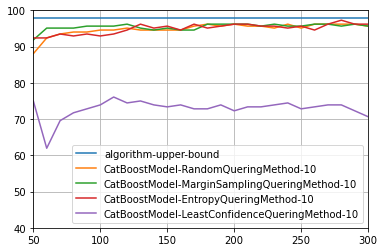

In [28]:
models = ['CatBoostModel']
quering_methods = ['RandomQueringMethod','MarginSamplingQueringMethod','EntropyQueringMethod','LeastConfidenceQueringMethod']
Ks = ['10'] 
repeats = 1

catboost_upper_bound = 98.

total_experiments = len(models) * len(quering_methods) * len(Ks) * repeats


plot_results(catboost_upper_bound, d, ['CatBoostModel'] , quering_methods, Ks, 1)

Prikaz obucavanja modela, pri selektovanju 25 novih elemenata za obuku

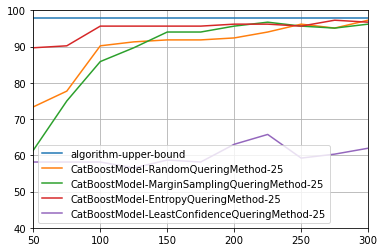

In [29]:
models = ['CatBoostModel']
quering_methods = ['RandomQueringMethod','MarginSamplingQueringMethod','EntropyQueringMethod','LeastConfidenceQueringMethod']
Ks = ['25'] 
repeats = 1

catboost_upper_bound = 98.

total_experiments = len(models) * len(quering_methods) * len(Ks) * repeats


plot_results(catboost_upper_bound, d, ['CatBoostModel'] , quering_methods, Ks, 1)

Prikaz obucavanja modela, pri selektovanju 50 novih elemenata za obuku

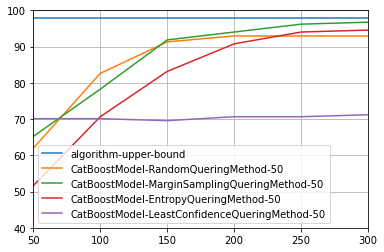

In [30]:
models = ['CatBoostModel']
quering_methods = ['RandomQueringMethod','MarginSamplingQueringMethod','EntropyQueringMethod','LeastConfidenceQueringMethod']
Ks = ['50'] 
repeats = 1

catboost_upper_bound = 98.

total_experiments = len(models) * len(quering_methods) * len(Ks) * repeats


plot_results(catboost_upper_bound, d, ['CatBoostModel'] , quering_methods, Ks, 1)

<h2>XGBoostModel experiments</h2>

In [31]:
max_queried = 300

repeats = 1


models = [XGBoostModel] 


quering_methods = [RandomQueringMethod,MarginSamplingQueringMethod,EntropyQueringMethod, LeastConfidenceQueringMethod]


Ks = [10,25,50] 

d = {}
stopped_at = -1 


d = experiment(d, models, quering_methods, Ks, repeats, stopped_at+1)
print (d)
results = json.loads(json.dumps(d, indent=2, sort_keys=True))
print(results)

stopping at: 300
Count = 1, using model = XGBoostModel, quering_method = RandomQueringMethod, k = 10, iteration = 0.
initial train set: (10, 25) (10,) unique(labels): [7 3] [0 1]
Train set: (10, 25) y: (10,)
Val   set: (726, 25)
Test  set: (184, 25)
training xgboost...
[21:45:55] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------
In iteration:  1

Accuracy for 73.913043 
updated train set: (20, 25) (20,) unique(labels): [14  6] [0 1]
Train set: (20, 25) y: (20,)
Val   set: (716, 25)
Test  set: (184, 25)
training xgboost...
[21:45:55] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation m

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


updated train set: (50, 25) (50,) unique(labels): [33 17] [0 1]
Train set: (50, 25) y: (50,)
Val   set: (686, 25)
Test  set: (184, 25)
training xgboost...
[21:45:55] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------
In iteration:  5

Accuracy for 91.847826 
updated train set: (60, 25) (60,) unique(labels): [41 19] [0 1]
Train set: (60, 25) y: (60,)
Val   set: (676, 25)
Test  set: (184, 25)
training xgboost...
[21:45:55] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric i

updated train set: (210, 25) (210,) unique(labels): [153  57] [0 1]
Train set: (210, 25) y: (210,)
Val   set: (526, 25)
Test  set: (184, 25)
training xgboost...
[21:45:56] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------
In iteration:  21

Accuracy for 93.478261 
updated train set: (220, 25) (220,) unique(labels): [159  61] [0 1]
Train set: (220, 25) y: (220,)
Val   set: (516, 25)
Test  set: (184, 25)
training xgboost...
[21:45:56] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set 

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


-----------------------------------
In iteration:  3

Accuracy for 78.804348 
updated train set: (100, 25) (100,) unique(labels): [75 25] [0 1]
Train set: (100, 25) y: (100,)
Val   set: (636, 25)
Test  set: (184, 25)
training xgboost...
[21:45:58] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------
In iteration:  4

Accuracy for 83.695652 
updated train set: (125, 25) (125,) unique(labels): [93 32] [0 1]
Train set: (125, 25) y: (125,)
Val   set: (611, 25)
Test  set: (184, 25)
training xgboost...
[21:45:58] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


updated train set: (150, 25) (150,) unique(labels): [110  40] [0 1]
Train set: (150, 25) y: (150,)
Val   set: (586, 25)
Test  set: (184, 25)
training xgboost...
[21:46:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------
In iteration:  3

Accuracy for 91.304348 
updated train set: (200, 25) (200,) unique(labels): [147  53] [0 1]
Train set: (200, 25) y: (200,)
Val   set: (536, 25)
Test  set: (184, 25)
training xgboost...
[21:46:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set e

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


-----------------------------------
In iteration:  3

Accuracy for 89.130435 
updated train set: (40, 25) (40,) unique(labels): [25 15] [0 1]
Train set: (40, 25) y: (40,)
Val   set: (696, 25)
Test  set: (184, 25)
training xgboost...
[21:46:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------
In iteration:  4

Accuracy for 88.043478 
updated train set: (50, 25) (50,) unique(labels): [27 23] [0 1]
Train set: (50, 25) y: (50,)
Val   set: (686, 25)
Test  set: (184, 25)
training xgboost...
[21:46:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary

updated train set: (190, 25) (190,) unique(labels): [100  90] [0 1]
Train set: (190, 25) y: (190,)
Val   set: (546, 25)
Test  set: (184, 25)
training xgboost...
[21:46:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------
In iteration:  19

Accuracy for 95.652174 
updated train set: (200, 25) (200,) unique(labels): [105  95] [0 1]
Train set: (200, 25) y: (200,)
Val   set: (536, 25)
Test  set: (184, 25)
training xgboost...
[21:46:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set 

initial train set: (25, 25) (25,) unique(labels): [22  3] [0 1]
Train set: (25, 25) y: (25,)
Val   set: (711, 25)
Test  set: (184, 25)
training xgboost...
[21:46:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------
In iteration:  1

Accuracy for 74.456522 
updated train set: (50, 25) (50,) unique(labels): [24 26] [0 1]
Train set: (50, 25) y: (50,)
Val   set: (686, 25)
Test  set: (184, 25)
training xgboost...
[21:46:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric i

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


-----------------------------------
In iteration:  3

Accuracy for 91.847826 
updated train set: (100, 25) (100,) unique(labels): [42 58] [0 1]
Train set: (100, 25) y: (100,)
Val   set: (636, 25)
Test  set: (184, 25)
training xgboost...
[21:46:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------
In iteration:  4

Accuracy for 92.391304 
updated train set: (125, 25) (125,) unique(labels): [60 65] [0 1]
Train set: (125, 25) y: (125,)
Val   set: (611, 25)
Test  set: (184, 25)
training xgboost...
[21:46:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

initial train set: (50, 25) (50,) unique(labels): [36 14] [0 1]
Train set: (50, 25) y: (50,)
Val   set: (686, 25)
Test  set: (184, 25)
training xgboost...
[21:49:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------
In iteration:  1

Accuracy for 70.108696 
updated train set: (100, 25) (100,) unique(labels): [66 34] [0 1]
Train set: (100, 25) y: (100,)
Val   set: (636, 25)
Test  set: (184, 25)
training xgboost...
[21:49:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metr

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


-----------------------------------
In iteration:  3

Accuracy for 86.413043 
updated train set: (200, 25) (200,) unique(labels): [140  60] [0 1]
Train set: (200, 25) y: (200,)
Val   set: (536, 25)
Test  set: (184, 25)
training xgboost...
[21:49:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------
In iteration:  4

Accuracy for 89.673913 
updated train set: (250, 25) (250,) unique(labels): [167  83] [0 1]
Train set: (250, 25) y: (250,)
Val   set: (486, 25)
Test  set: (184, 25)
training xgboost...
[21:49:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objec

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


verovatnoce: 
[[0.45803624 0.54196376]
 [0.45803624 0.54196376]
 [0.731566   0.268434  ]
 ...
 [0.5464499  0.45355007]
 [0.86732256 0.13267744]
 [0.7766107  0.22338933]]
izracunato: 
[0.9949129  0.9949129  0.83920854 0.9823466  0.7874267  0.82108235
 0.9937655  0.83920854 0.9989812  0.5647356  0.9648315  0.83920854
 0.88439965 0.9925585  0.8172091  0.9925585  0.83920854 0.8999524
 0.945915   0.9925585  0.945915   0.5647356  0.59973323 0.9336575
 0.83920854 0.9974117  0.97845674 0.9925585  0.9925585  0.83920854
 0.9994122  0.9336575  0.9823466  0.9539745  0.9840148  0.9989812
 0.5647356  0.9937655  0.9648315  0.945915   0.83920854 0.3951699
 0.95961285 0.8999524  0.9937655  0.9648315  0.9648315  0.5647356
 0.88439965 0.6432402  0.9925585  0.9539745  0.945915   0.8172091
 0.5948397  0.88439965 0.9925585  0.9268078  0.9937655  0.8172091
 0.8124277  0.9539745  0.5647356  0.6779605  0.99043614 0.9989812
 0.9823466  0.64209056 0.8999524  0.83920854 0.83920854 0.9925585
 0.9925585  0.9925585 

izracunato: 
[0.37052643 0.13367994 0.6067049  0.45610958 0.4194188  0.71647334
 0.74341905 0.6111882  0.91923183 0.13893746 0.38714603 0.6111882
 0.9942908  0.20991735 0.6949855  0.4676033  0.6111882  0.62443835
 0.09719318 0.41290432 0.5082502  0.7258024  0.347458   0.32655302
 0.6111882  0.32180756 0.6415984  0.4071555  0.7785853  0.71647334
 0.9105755  0.8975013  0.15433541 0.53264815 0.75057274 0.22952276
 0.18304479 0.5906074  0.71647334 0.38498953 0.4917233  0.9985336
 0.41290432 0.4758383  0.93058187 0.72129536 0.91790605 0.342777
 0.13135469 0.62373555 0.37744075 0.6382798  0.27829632 0.67371756
 0.9800433  0.29198855 0.41290432 0.26580605 0.9220314  0.7268442
 0.4114746  0.25972387 0.23688293 0.5367467  0.2399832  0.37743363
 0.7973262  0.7467579  0.71493334 0.41290432 0.8961912  0.6309035
 0.31537145 0.43743291 0.92300713 0.75880456 0.4609059  0.5687459
 0.16418618 0.62373555 0.33667406 0.99909806 0.41290432 0.93402565
 0.37056708 0.6646446  0.6289762  0.5733573  0.99336046 

 0.3499193  0.34899622]
sta je selektovano:
[560  75  44 655 112 505 413  43 358 385]
updated train set: (60, 25) (60,) unique(labels): [38 22] [0 1]
Train set: (60, 25) y: (60,)
Val   set: (676, 25)
Test  set: (184, 25)
training xgboost...
[21:49:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------
In iteration:  6

Accuracy for 92.391304 
verovatnoce: 
[[0.9148267  0.08517329]
 [0.9911172  0.00888283]
 [0.87706935 0.12293064]
 ...
 [0.04929578 0.9507042 ]
 [0.1385333  0.8614667 ]
 [0.83834636 0.16165365]]
izracunato: 
[0.4201503  0.07329253 0.53772664 0.21012937 0.05938343 0.45466462
 0.4404142  0.34351358 0.08953352 0.25520086 0.4985825  0.37059
 0.7582916  0.09578529 0.3294783  0.1046

[0.5848639  0.04673586 0.42567673 0.08188681 0.01620226 0.18401295
 0.30916482 0.1706262  0.07249013 0.13371004 0.63443595 0.14078665
 0.43137863 0.04299664 0.12846352 0.20393461 0.14078665 0.51470935
 0.18355729 0.03908526 0.62482715 0.15750247 0.30888122 0.33292356
 0.18209603 0.05468953 0.09435761 0.21927074 0.1474492  0.21196641
 0.0439119  0.64084566 0.08038621 0.49680313 0.43713927 0.65111357
 0.31010437 0.2228127  0.3539296  0.26451102 0.3546339  0.04698484
 0.05870813 0.20530511 0.12271589 0.23786306 0.04625346 0.23192602
 0.02634972 0.71240604 0.7700039  0.21393132 0.03828919 0.1680199
 0.8012792  0.08749653 0.07276045 0.86281586 0.16474625 0.17708361
 0.09743158 0.13701391 0.09441911 0.16163479 0.48425227 0.03752229
 0.08100988 0.57965887 0.28506777 0.12110743 0.152925   0.03612349
 0.31044257 0.20375304 0.18401295 0.39003232 0.10097668 0.03368242
 0.59525526 0.20353924 0.08268432 0.18845004 0.5167245  0.31643045
 0.12302947 0.14219856 0.6285764  0.40892446 0.41644466 0.74604

verovatnoce: 
[[9.9247605e-01 7.5239539e-03]
 [9.9935198e-01 6.4800412e-04]
 [9.6695352e-01 3.3046462e-02]
 ...
 [1.2452245e-02 9.8754776e-01]
 [1.9663036e-02 9.8033696e-01]
 [9.5810968e-01 4.1890346e-02]]
izracunato: 
[0.06389001 0.00779807 0.20944686 0.08301078 0.00776856 0.11099108
 0.3349626  0.10063319 0.0196687  0.07523235 0.58391666 0.14474297
 0.30812228 0.02475888 0.10353318 0.10786386 0.14474297 0.85983276
 0.24593616 0.06512342 0.35555196 0.19340824 0.33243626 0.08063296
 0.10376404 0.13540122 0.06028423 0.15280075 0.0475347  0.13681042
 0.00692586 0.2813425  0.12520057 0.20846042 0.56207454 0.7952994
 0.4164535  0.16341358 0.2519023  0.07489635 0.14923085 0.08455012
 0.05282617 0.03325213 0.5113872  0.268725   0.01329573 0.03985235
 0.02053234 0.23403907 0.539992   0.05387443 0.05362305 0.03135623
 0.12908559 0.05930778 0.09556089 0.15072884 0.03699851 0.08944041
 0.04981976 0.0416742  0.09210157 0.50835085 0.06193245 0.05163165
 0.0427038  0.13440731 0.3162297  0.03222984 

-----------------------------------
In iteration:  11

Accuracy for 94.021739 
verovatnoce: 
[[9.9194628e-01 8.0536949e-03]
 [9.9984759e-01 1.5239153e-04]
 [9.6934038e-01 3.0659614e-02]
 ...
 [1.5252590e-02 9.8474741e-01]
 [3.6721706e-02 9.6327829e-01]
 [9.6596557e-01 3.4034453e-02]]
izracunato: 
[0.06759472 0.00215218 0.19768909 0.1710415  0.00484866 0.05512679
 0.53200406 0.06366979 0.00963558 0.0100217  0.9091234  0.11346506
 0.10589185 0.04074019 0.1708252  0.1107548  0.11346506 0.65193576
 0.0924437  0.14651038 0.3142053  0.8557807  0.03725773 0.11387599
 0.09011792 0.04802937 0.80104315 0.00732374 0.05447038 0.00728688
 0.8113635  0.02256646 0.05513236 0.31004903 0.34406415 0.1590321
 0.06390272 0.03171606 0.08204086 0.12197687 0.08915638 0.02085697
 0.09363138 0.00837076 0.18108025 0.00891987 0.18882762 0.46394956
 0.01466722 0.08366869 0.06874551 0.07157521 0.08809547 0.06455331
 0.34447145 0.02133304 0.0375684  0.02014141 0.04494055 0.06366979
 0.2858914  0.09080132 0.05902822

-----------------------------------
In iteration:  13

Accuracy for 94.565217 
verovatnoce: 
[[9.9751341e-01 2.4865628e-03]
 [9.9993587e-01 6.4119165e-05]
 [9.9357724e-01 6.4227451e-03]
 ...
 [2.3727763e-01 7.6272237e-01]
 [3.4038007e-02 9.6596199e-01]
 [9.8698622e-01 1.3013751e-02]]
izracunato: 
[2.50957478e-02 9.85632185e-04 5.60105070e-02 9.09516960e-02
 7.67778233e-03 4.16699871e-02 6.08940244e-01 2.78365314e-02
 8.98033194e-03 7.44846277e-03 1.34809405e-01 3.28047313e-02
 1.26455724e-01 6.54011294e-02 9.66029018e-02 1.38879627e-01
 3.28047313e-02 6.66211993e-02 1.60578936e-01 2.52102435e-01
 6.76464200e-01 3.24606262e-02 5.06825112e-02 1.52127352e-02
 1.90825947e-02 4.34103549e-01 4.10051756e-02 4.16699871e-02
 5.96642029e-03 9.58341539e-01 2.23216135e-02 4.31351475e-02
 4.42777038e-01 8.53113294e-01 7.34751001e-02 9.37898755e-02
 2.73269992e-02 5.94777577e-02 2.74340808e-01 7.97607750e-02
 1.96750406e-02 4.60318737e-02 1.21864891e-02 1.14656471e-01
 2.13235077e-02 1.88751191e-01 

-----------------------------------
In iteration:  15

Accuracy for 95.652174 
verovatnoce: 
[[9.9153507e-01 8.4649315e-03]
 [9.9979806e-01 2.0196107e-04]
 [9.9067205e-01 9.3279565e-03]
 ...
 [8.4937572e-02 9.1506243e-01]
 [4.5723915e-03 9.9542761e-01]
 [9.8606122e-01 1.3938778e-02]]
izracunato: 
[0.07043549 0.00277011 0.07630424 0.20923178 0.00575266 0.03356189
 0.04163251 0.01511368 0.05038227 0.8871442  0.05955283 0.14977932
 0.02990144 0.09206466 0.22753468 0.05955283 0.03625729 0.1589418
 0.17231089 0.98386836 0.09107344 0.05357427 0.08087259 0.01311411
 0.01450897 0.03371022 0.00436642 0.03691297 0.05533978 0.10476091
 0.18070173 0.03784677 0.09628574 0.18859608 0.0303036  0.01679951
 0.0661679  0.01540328 0.07239469 0.03703424 0.16927953 0.34307015
 0.03955244 0.07865129 0.03280191 0.1212133  0.04620777 0.21180579
 0.10303429 0.10498503 0.07033467 0.0659219  0.08286    0.02792561
 0.22284612 0.0633769  0.06177476 0.04003013 0.11215584 0.30922413
 0.02543716 0.08665926 0.37954855

-----------------------------------
In iteration:  17

Accuracy for 95.108696 
verovatnoce: 
[[9.9824202e-01 1.7579667e-03]
 [9.9993360e-01 6.6425833e-05]
 [9.8974079e-01 1.0259205e-02]
 ...
 [5.9213340e-02 9.4078666e-01]
 [3.4153461e-03 9.9658465e-01]
 [9.8244977e-01 1.7550224e-02]]
izracunato: 
[0.01862269 0.00101764 0.08250666 0.10175394 0.00199087 0.03060328
 0.02857459 0.00564454 0.01869575 0.05225528 0.11448122 0.02612891
 0.07233131 0.11743635 0.05225528 0.03705262 0.38583642 0.03218032
 0.06640132 0.03386975 0.03926879 0.00427749 0.01891196 0.03935924
 0.00407754 0.03082101 0.04420393 0.0793125  0.09924305 0.03092072
 0.07288381 0.30252028 0.02690603 0.03184781 0.0713964  0.00828151
 0.05533408 0.01225474 0.19187784 0.25757927 0.01977402 0.03406325
 0.01732132 0.04656722 0.03085699 0.06229181 0.06812051 0.06305606
 0.05484223 0.03872734 0.02002392 0.03189227 0.11132461 0.0286963
 0.01829733 0.05508365 0.13888364 0.11472983 0.01256465 0.08737193
 0.11882032 0.05587449 0.02227947

-----------------------------------
In iteration:  19

Accuracy for 94.565217 
verovatnoce: 
[[9.9750590e-01 2.4941035e-03]
 [9.9987745e-01 1.2255252e-04]
 [9.9197984e-01 8.0201607e-03]
 ...
 [9.9622029e-01 3.7796954e-03]
 [1.1386871e-03 9.9886131e-01]
 [9.9159467e-01 8.4053474e-03]]
izracunato: 
[0.0251609  0.00176927 0.06736171 0.02599639 0.00235442 0.03230395
 0.02355603 0.00902412 0.00520214 0.03773674 0.07674121 0.01568257
 0.0598731  0.10659513 0.03773674 0.00894827 0.00644804 0.04555428
 0.03427878 0.12392963 0.00557577 0.03293886 0.04125256 0.00331698
 0.01394334 0.10376697 0.05014577 0.03522684 0.03367955 0.05646714
 0.0482731  0.10834364 0.05181652 0.07881054 0.00838971 0.05661357
 0.00707722 0.08476577 0.20276661 0.02359699 0.01866641 0.01924226
 0.08889917 0.12111375 0.01517887 0.27143437 0.03575552 0.03651576
 0.02026492 0.01551143 0.02848124 0.0594888  0.00859813 0.02970583
 0.04178401 0.0663682  0.088353   0.01018137 0.07135118 0.05475
 0.04994614 0.01200539 0.13143258 0

-----------------------------------
In iteration:  21

Accuracy for 96.739130 
verovatnoce: 
[[9.9643451e-01 3.5654758e-03]
 [9.9902928e-01 9.7069156e-04]
 [9.9802256e-01 1.9774693e-03]
 ...
 [9.9127793e-01 8.7220725e-03]
 [3.0454397e-03 9.9695456e-01]
 [9.9874866e-01 1.2513263e-03]]
izracunato: 
[0.03412808 0.01111513 0.02061191 0.02415586 0.00481709 0.0894508
 0.05917063 0.01124734 0.00948954 0.01419221 0.02570926 0.010374
 0.03986921 0.0560496  0.01419221 0.02544647 0.0411715  0.13757735
 0.06929344 0.00168301 0.04174941 0.10166607 0.01832293 0.00198349
 0.04885667 0.03077312 0.04227778 0.18506488 0.01495013 0.1208027
 0.04155679 0.07443992 0.01994814 0.06121048 0.11531569 0.01196843
 0.05297629 0.13873808 0.01583691 0.02117866 0.03182871 0.11840305
 0.21848588 0.03391103 0.1422175  0.02354828 0.1257988  0.01198925
 0.00797116 0.04165796 0.03044554 0.02580685 0.0247682  0.0136258
 0.02640175 0.20095588 0.03854186 0.09392476 0.08556034 0.01361493
 0.03993744 0.15560156 0.02464357 0.0

-----------------------------------
In iteration:  23

Accuracy for 95.108696 
verovatnoce: 
[[9.9853498e-01 1.4650172e-03]
 [9.9972218e-01 2.7779912e-04]
 [9.9755472e-01 2.4452622e-03]
 ...
 [9.9687821e-01 3.1218182e-03]
 [9.5826387e-04 9.9904174e-01]
 [9.9728793e-01 2.7120432e-03]]
izracunato: 
[0.01590497 0.00368258 0.02473807 0.01894512 0.00282122 0.01611344
 0.0193156  0.01648882 0.03143257 0.00726943 0.02151789 0.01281718
 0.02413573 0.03056796 0.00726943 0.02288168 0.02121593 0.02161219
 0.00200826 0.02338232 0.0189063  0.0124072  0.01062438 0.10159856
 0.01526641 0.03665273 0.08138804 0.0167521  0.03449009 0.1658874
 0.01653632 0.0621032  0.10230908 0.00917386 0.07897633 0.02197095
 0.01590445 0.05917993 0.11190381 0.08706796 0.01554354 0.08922413
 0.01730932 0.04294727 0.00982711 0.00886833 0.0185833  0.04013067
 0.02418286 0.03072609 0.02678657 0.0753843  0.05677693 0.02048806
 0.02322442 0.0299194  0.00646799 0.01929837 0.04039837 0.00893345
 0.03879244 0.02612891 0.01639669

-----------------------------------
In iteration:  25

Accuracy for 95.652174 
verovatnoce: 
[[9.97306883e-01 2.69311108e-03]
 [9.99760866e-01 2.39140398e-04]
 [9.97102678e-01 2.89733731e-03]
 [1.46245956e-03 9.98537540e-01]
 [9.99728262e-01 2.71721132e-04]
 [9.98995721e-01 1.00427994e-03]
 [9.98419106e-01 1.58091960e-03]
 [9.97133672e-01 2.86634080e-03]
 [9.99406695e-01 5.93312725e-04]
 [9.99405086e-01 5.94896264e-04]
 [9.96372879e-01 3.62712354e-03]
 [1.67554617e-03 9.98324454e-01]
 [9.99068797e-01 9.31175018e-04]
 [3.95870209e-03 9.96041298e-01]
 [9.99405086e-01 5.94896264e-04]
 [1.35308504e-03 9.98646915e-01]
 [2.08753347e-03 9.97912467e-01]
 [9.97951210e-01 2.04876252e-03]
 [9.99683797e-01 3.16175167e-04]
 [9.89011288e-01 1.09886881e-02]
 [9.97653604e-01 2.34640180e-03]
 [9.99517262e-01 4.82727803e-04]
 [9.99485075e-01 5.14897692e-04]
 [9.83296514e-01 1.67034976e-02]
 [9.98923779e-01 1.07624999e-03]
 [9.56234813e-01 4.37652059e-02]
 [9.94795561e-01 5.20444289e-03]
 [9.97923255e-01

 0.02391675 0.01141322]
sta je selektovano:
[145  64 268  29  74 398 304 234  30 103]
updated train set: (270, 25) (270,) unique(labels): [174  96] [0 1]
Train set: (270, 25) y: (270,)
Val   set: (466, 25)
Test  set: (184, 25)
training xgboost...
[21:49:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------
In iteration:  27

Accuracy for 95.652174 
verovatnoce: 
[[9.9893713e-01 1.0628843e-03]
 [9.9986565e-01 1.3432532e-04]
 [9.9883616e-01 1.1638309e-03]
 [1.9312501e-03 9.9806875e-01]
 [9.9991834e-01 8.1649479e-05]
 [9.9903470e-01 9.6528302e-04]
 [9.9837756e-01 1.6224573e-03]
 [9.9975109e-01 2.4892428e-04]
 [9.9956107e-01 4.3894365e-04]
 [9.9958473e-01 4.1529021e-04]
 [9.9915260e-01 8.47384

-----------------------------------
In iteration:  28

Accuracy for 95.108696 
verovatnoce: 
[[9.9938381e-01 6.1618997e-04]
 [9.9989849e-01 1.0153423e-04]
 [9.9864775e-01 1.3522530e-03]
 [2.9259920e-03 9.9707401e-01]
 [9.9983180e-01 1.6821446e-04]
 [9.9901795e-01 9.8202017e-04]
 [9.9880910e-01 1.1908908e-03]
 [9.9981129e-01 1.8869362e-04]
 [9.9941295e-01 5.8703026e-04]
 [9.9950039e-01 4.9961649e-04]
 [9.9519330e-01 4.8066792e-03]
 [4.2134523e-04 9.9957865e-01]
 [9.9840969e-01 1.5903210e-03]
 [5.3465366e-03 9.9465346e-01]
 [9.9950039e-01 4.9961649e-04]
 [1.3486743e-03 9.9865133e-01]
 [1.5184283e-03 9.9848157e-01]
 [9.9824899e-01 1.7510217e-03]
 [9.9972105e-01 2.7896295e-04]
 [9.9787837e-01 2.1216555e-03]
 [9.9837303e-01 1.6269950e-03]
 [9.9938899e-01 6.1101379e-04]
 [9.9939871e-01 6.0131075e-04]
 [9.9893308e-01 1.0668956e-03]
 [9.9918664e-01 8.1335811e-04]
 [9.9911004e-01 8.8995189e-04]
 [1.5972257e-03 9.9840277e-01]
 [9.9806684e-01 1.9331449e-03]
 [9.9885750e-01 1.1424860e-03]
 [9.9991

 0.01914879 0.0144119 ]
sta je selektovano:
[414 215  79  33 267  36  44  49  42 255]
updated train set: (300, 25) (300,) unique(labels): [199 101] [0 1]
Train set: (300, 25) y: (300,)
Val   set: (436, 25)
Test  set: (184, 25)
training xgboost...
[21:49:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------
In iteration:  30

Accuracy for 95.108696 
final active learning accuracies [61.41304347826087, 69.02173913043478, 89.13043478260869, 92.3913043478261, 93.47826086956522, 92.3913043478261, 92.93478260869566, 93.47826086956522, 93.47826086956522, 94.02173913043478, 94.02173913043478, 94.02173913043478, 94.56521739130434, 95.1086956521739, 95.65217391304348, 94.56521739130434, 95.108695652

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



sta je selektovano:
[253 437 204 394 655 535 135  82 482  12 637 477 493 267 564 132 641 230
 456 452 375 526 663 159 446]
updated train set: (75, 25) (75,) unique(labels): [49 26] [0 1]
Train set: (75, 25) y: (75,)
Val   set: (661, 25)
Test  set: (184, 25)
training xgboost...
[21:49:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------
In iteration:  3

Accuracy for 84.239130 
verovatnoce: 
[[0.83344257 0.16655743]
 [0.955298   0.04470201]
 [0.99279016 0.00720987]
 ...
 [0.30887645 0.69112355]
 [0.47785115 0.52214885]
 [0.980665   0.01933499]]
izracunato: 
[0.6497687  0.26345015 0.06166806 0.9964247  0.99728185 0.57518077
 0.02756548 0.11523429 0.97983545 0.7529834  0.05257419 0.38286024

verovatnoce: 
[[0.89932305 0.10067695]
 [0.96892977 0.03107022]
 [0.99269164 0.00730837]
 ...
 [0.9586152  0.0413848 ]
 [0.20459181 0.7954082 ]
 [0.9861245  0.01387546]]
izracunato: 
[0.47113782 0.19973093 0.062367   0.44464925 0.07334113 0.37464303
 0.46594596 0.4726339  0.02001409 0.9942355  0.515085   0.2915457
 0.0427079  0.8427079  0.19335881 0.6046604  0.20507121 0.02077486
 0.35392526 0.319228   0.57119524 0.11872891 0.8796185  0.0725285
 0.31037375 0.17980593 0.9719464  0.30563873 0.5765848  0.51546586
 0.26229626 0.3479089  0.556471   0.3720378  0.00563062 0.06697153
 0.06081365 0.02139921 0.5570338  0.7963071  0.01650667 0.10706788
 0.69605684 0.01776862 0.9829642  0.01024192 0.17197305 0.61732984
 0.31879216 0.23146324 0.14514257 0.01827926 0.01634488 0.22096244
 0.6486437  0.8100922  0.06358972 0.9992402  0.0332723  0.05744668
 0.13868801 0.12175322 0.7370502  0.30178517 0.21887934 0.01048661
 0.01417779 0.02905917 0.7434599  0.03005849 0.5116697  0.15172733
 0.6079332  0.3

-----------------------------------
In iteration:  6

Accuracy for 90.217391 
verovatnoce: 
[[8.7126744e-01 1.2873259e-01]
 [9.9804080e-01 1.9592291e-03]
 [9.9912965e-01 8.7036326e-04]
 ...
 [9.8895687e-01 1.1043111e-02]
 [1.9367969e-01 8.0632031e-01]
 [9.8386604e-01 1.6133992e-02]]
izracunato: 
[0.553952   0.020448   0.01010329 0.34012854 0.18651417 0.02288234
 0.10900078 0.5228767  0.0096418  0.41143236 0.06601356 0.14227127
 0.7854153  0.55781615 0.05489973 0.28805995 0.30281872 0.10900755
 0.04968349 0.43730676 0.13583106 0.6120486  0.06504392 0.00644987
 0.82161963 0.16009912 0.03374349 0.02993709 0.00251011 0.2036763
 0.01343941 0.00633608 0.13334969 0.12259543 0.02217736 0.6146289
 0.00299385 0.02369939 0.11974366 0.45812845 0.22643326 0.01151556
 0.2113981  0.00710148 0.00479505 0.20727633 0.95222753 0.59472567
 0.08849442 0.05829415 0.15953168 0.09763867 0.94758034 0.46817893
 0.02140673 0.03774874 0.02926781 0.13351223 0.02036473 0.89742863
 0.11490979 0.7190634  0.08564186 0

-----------------------------------
In iteration:  8

Accuracy for 92.934783 
verovatnoce: 
[[0.97165316 0.02834685]
 [0.9986703  0.00132972]
 [0.99542093 0.00457908]
 ...
 [0.99824286 0.00175717]
 [0.9757756  0.02422443]
 [0.99039066 0.00960934]]
izracunato: 
[1.86032370e-01 1.46221044e-02 4.21738401e-02 4.50454205e-01
 1.39903456e-01 8.44704174e-03 4.94743995e-02 2.92210519e-01
 1.53169865e-02 8.90537441e-01 2.74167378e-02 6.60505891e-02
 2.38191664e-01 2.71986812e-01 1.11316666e-01 2.77725935e-01
 4.60660130e-01 1.32741835e-02 1.73192956e-02 9.69304889e-02
 2.37556756e-01 8.31245165e-03 4.48880903e-03 4.12975885e-02
 1.68090221e-02 5.78190871e-02 2.76556145e-03 6.32857308e-02
 1.14457309e-01 3.36853601e-03 9.86994524e-03 2.96065718e-01
 2.20428854e-02 6.57493949e-01 2.86813709e-03 3.79542336e-02
 1.02193253e-02 5.65324068e-01 9.20906290e-02 1.82125140e-02
 9.26043689e-02 1.11600738e-02 3.41940904e-03 9.96716097e-02
 1.73754245e-01 5.55987395e-02 7.80463405e-03 6.02838285e-02
 2.6120

-----------------------------------
In iteration:  10

Accuracy for 95.652174 
verovatnoce: 
[[9.91456628e-01 8.54334887e-03]
 [9.99712586e-01 2.87437200e-04]
 [9.98460710e-01 1.53931638e-03]
 [9.97063339e-01 2.93666148e-03]
 [9.99221027e-01 7.78992602e-04]
 [9.85268950e-01 1.47310356e-02]
 [9.93015587e-01 6.98439172e-03]
 [9.97886240e-01 2.11378839e-03]
 [7.85309076e-03 9.92146909e-01]
 [9.09245014e-03 9.90907550e-01]
 [9.22643542e-01 7.73564577e-02]
 [9.89078343e-01 1.09216683e-02]
 [3.29525113e-01 6.70474887e-01]
 [8.05373251e-01 1.94626763e-01]
 [9.99506414e-01 4.93567379e-04]
 [9.98753488e-01 1.24653883e-03]
 [9.98757780e-01 1.24223635e-03]
 [9.99238491e-01 7.61500734e-04]
 [9.99362826e-01 6.37156947e-04]
 [9.78180766e-01 2.18192581e-02]
 [9.92026925e-01 7.97309447e-03]
 [9.94161129e-01 5.83886961e-03]
 [9.99935269e-01 6.47533598e-05]
 [9.96625602e-01 3.37440358e-03]
 [9.99202073e-01 7.97921268e-04]
 [9.99436021e-01 5.63999929e-04]
 [9.98208344e-01 1.79166626e-03]
 [9.92953360e-01

[[9.87536788e-01 1.24632102e-02]
 [9.99743462e-01 2.56545696e-04]
 [9.98879015e-01 1.12100993e-03]
 [9.95878816e-01 4.12115548e-03]
 [9.99035180e-01 9.64807696e-04]
 [9.85529423e-01 1.44705484e-02]
 [9.85500991e-01 1.44990208e-02]
 [9.99008477e-01 9.91513487e-04]
 [1.74468756e-03 9.98255312e-01]
 [3.52123380e-02 9.64787662e-01]
 [9.42011058e-01 5.79889230e-02]
 [9.99494791e-01 5.05195465e-04]
 [9.99488533e-01 5.11454593e-04]
 [9.99729335e-01 2.70639342e-04]
 [9.98909354e-01 1.09062938e-03]
 [9.99425173e-01 5.74854668e-04]
 [9.85505104e-01 1.44949127e-02]
 [9.97392297e-01 2.60768947e-03]
 [9.98338163e-01 1.66182732e-03]
 [9.99938309e-01 6.17203696e-05]
 [9.98610198e-01 1.38977286e-03]
 [9.99680281e-01 3.19698476e-04]
 [9.97801363e-01 2.19862396e-03]
 [9.97604251e-01 2.39574723e-03]
 [9.95443523e-01 4.55647055e-03]
 [9.98813212e-01 1.18680217e-03]
 [9.93965805e-01 6.03421731e-03]
 [9.99456048e-01 5.43966424e-04]
 [9.97904599e-01 2.09542830e-03]
 [9.99075174e-01 9.24835331e-04]
 [1.570045

initial train set: (50, 25) (50,) unique(labels): [32 18] [0 1]
Train set: (50, 25) y: (50,)
Val   set: (686, 25)
Test  set: (184, 25)
training xgboost...
[21:53:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------
In iteration:  1

Accuracy for 60.326087 
verovatnoce: 
[[0.9822255  0.0177745 ]
 [0.72907907 0.27092093]
 [0.5493256  0.45067444]
 ...
 [0.9529553  0.0470447 ]
 [0.18332547 0.81667453]
 [0.1572262  0.8427738 ]]
izracunato: 
[0.12875572 0.842783   0.99296844 0.7667948  0.02819687 0.79165715
 0.12806627 0.9223012  0.09326257 0.93306935 0.17580788 0.29284132
 0.8895074  0.41704684 0.89425385 0.07032293 0.53617436 0.09301981
 0.03291175 0.9855169  0.4830333  0.77889496 0.6605823  

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



sta je selektovano:
[ 56 304 436 632 446 575 187 595 423 579 300 134 175 219 547 322 122 293
 439 139  52   8 408 453  12  92 169 110 367 197 226 496 325 231 318 599
 544 245 207 549 319  55 519 137 434 159 494 401 277  90]
updated train set: (150, 25) (150,) unique(labels): [99 51] [0 1]
Train set: (150, 25) y: (150,)
Val   set: (586, 25)
Test  set: (184, 25)
training xgboost...
[21:53:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------
In iteration:  3

Accuracy for 82.608696 
verovatnoce: 
[[0.9894464  0.01055358]
 [0.9921454  0.00785456]
 [0.00516415 0.99483585]
 ...
 [0.83499694 0.16500306]
 [0.00113916 0.99886084]
 [0.19243824 0.80756176]]
izracunato: 
[0.08444111 0.06620824 0.046

-----------------------------------
In iteration:  4

Accuracy for 89.673913 
verovatnoce: 
[[0.99783176 0.00216822]
 [0.9981317  0.00186831]
 [0.01534206 0.98465794]
 ...
 [0.3877613  0.6122387 ]
 [0.00618458 0.9938154 ]
 [0.397627   0.602373  ]]
izracunato: 
[0.02231188 0.01962734 0.11442007 0.00665889 0.02845575 0.99134225
 0.06419037 0.01284239 0.17865811 0.44413626 0.0282811  0.07690989
 0.8430644  0.7681626  0.01561605 0.12494294 0.02479299 0.18202999
 0.06583734 0.993442   0.16743651 0.1134145  0.68154603 0.03447236
 0.31737542 0.02379816 0.7399914  0.07175167 0.08297625 0.03681822
 0.15186808 0.991505   0.34002745 0.8163255  0.6016443  0.05053743
 0.08061526 0.01959423 0.87922144 0.32310012 0.01092259 0.01362841
 0.75492835 0.01913565 0.00652276 0.06798707 0.00573314 0.02992778
 0.03818552 0.17315023 0.03251295 0.0336794  0.04669857 0.02326313
 0.02187447 0.05535545 0.02024234 0.01345654 0.14406012 0.04801986
 0.09620643 0.01912165 0.03403909 0.02974842 0.48534137 0.02870374
 0

[21:53:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------
In iteration:  6

Accuracy for 95.652174 
final active learning accuracies [60.32608695652174, 74.45652173913044, 82.6086956521739, 89.67391304347827, 94.56521739130434, 95.65217391304348]
saved Active-learning-experiment-9.pkl C:\Users\Mihajlo\Desktop\Mihajlo\faks\4 godina\diplomski ['.ipynb_checkpoints', 'Active-learning-experiment-1.pkl', 'Active-learning-experiment-10.pkl', 'Active-learning-experiment-11.pkl', 'Active-learning-experiment-12.pkl', 'Active-learning-experiment-2.pkl', 'Active-learning-experiment-3.pkl', 'Active-learning-experiment-4.pkl', 'Active-learning-experiment-5.pkl', 'Active-learning-experiment-6.pkl', 'A

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


updated train set: (20, 25) (20,) unique(labels): [17  3] [0 1]
Train set: (20, 25) y: (20,)
Val   set: (716, 25)
Test  set: (184, 25)
training xgboost...
[21:53:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------
In iteration:  2

Accuracy for 75.000000 
updated train set: (30, 25) (30,) unique(labels): [27  3] [0 1]
Train set: (30, 25) y: (30,)
Val   set: (706, 25)
Test  set: (184, 25)
training xgboost...
[21:53:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric i

-----------------------------------
In iteration:  17

Accuracy for 86.956522 
updated train set: (180, 25) (180,) unique(labels): [167  13] [0 1]
Train set: (180, 25) y: (180,)
Val   set: (556, 25)
Test  set: (184, 25)
training xgboost...
[21:53:29] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------
In iteration:  18

Accuracy for 89.130435 
updated train set: (190, 25) (190,) unique(labels): [177  13] [0 1]
Train set: (190, 25) y: (190,)
Val   set: (546, 25)
Test  set: (184, 25)
training xgboost...
[21:53:29] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the obj

initial train set: (25, 25) (25,) unique(labels): [19  6] [0 1]
Train set: (25, 25) y: (25,)
Val   set: (711, 25)
Test  set: (184, 25)
training xgboost...
[21:53:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------
In iteration:  1

Accuracy for 69.565217 
updated train set: (50, 25) (50,) unique(labels): [32 18] [0 1]
Train set: (50, 25) y: (50,)
Val   set: (686, 25)
Test  set: (184, 25)
training xgboost...
[21:53:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric i

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


-----------------------------------
In iteration:  4

Accuracy for 72.826087 
updated train set: (125, 25) (125,) unique(labels): [101  24] [0 1]
Train set: (125, 25) y: (125,)
Val   set: (611, 25)
Test  set: (184, 25)
training xgboost...
[21:53:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------
In iteration:  5

Accuracy for 84.239130 
updated train set: (150, 25) (150,) unique(labels): [126  24] [0 1]
Train set: (150, 25) y: (150,)
Val   set: (586, 25)
Test  set: (184, 25)
training xgboost...
[21:53:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objec

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


-----------------------------------
In iteration:  3

Accuracy for 73.369565 
updated train set: (200, 25) (200,) unique(labels): [178  22] [0 1]
Train set: (200, 25) y: (200,)
Val   set: (536, 25)
Test  set: (184, 25)
training xgboost...
[22:03:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------
In iteration:  4

Accuracy for 82.065217 
updated train set: (250, 25) (250,) unique(labels): [228  22] [0 1]
Train set: (250, 25) y: (250,)
Val   set: (486, 25)
Test  set: (184, 25)
training xgboost...
[22:03:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objec

Prikaz obucavanja modela, pri selektovanju 10 novih elemenata za obuku

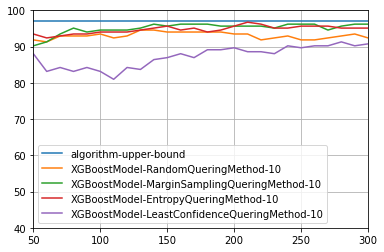

In [35]:
models = ['XGBoostModel']
quering_methods = ['RandomQueringMethod','MarginSamplingQueringMethod','EntropyQueringMethod','LeastConfidenceQueringMethod']
Ks = ['10'] 
repeats = 1
upper_bound = 97.

total_experiments = len(models) * len(quering_methods) * len(Ks) * repeats


plot_results(upper_bound, d, ['XGBoostModel'] , quering_methods  , Ks, 1)

Prikaz obucavanja modela, pri selektovanju 50 novih elemenata za obuku

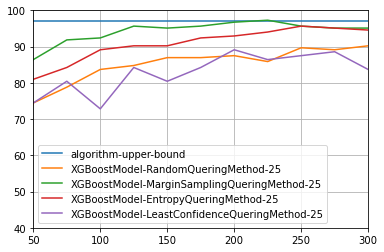

In [36]:
models = ['XGBoostModel']
quering_methods = ['RandomQueringMethod','MarginSamplingQueringMethod','EntropyQueringMethod','LeastConfidenceQueringMethod']
Ks = ['25'] 
repeats = 1
upper_bound = 97.

total_experiments = len(models) * len(quering_methods) * len(Ks) * repeats


plot_results(upper_bound, d, ['XGBoostModel'] , quering_methods  , Ks, 1)

Prikaz obucavanja modela, pri selektovanju 50 novih elemenata za obuku

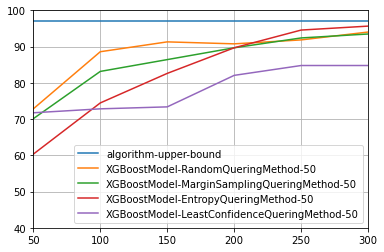

In [37]:
models = ['XGBoostModel']
quering_methods = ['RandomQueringMethod','MarginSamplingQueringMethod','EntropyQueringMethod','LeastConfidenceQueringMethod']
Ks = ['50'] 
repeats = 1
upper_bound = 97.

total_experiments = len(models) * len(quering_methods) * len(Ks) * repeats


plot_results(upper_bound, d, ['XGBoostModel'] , quering_methods  , Ks, 1)

<h2>BaggingModel experiments</h2>

In [38]:
max_queried = 300

repeats = 1


models = [BaggingModel] 


quering_methods = [RandomQueringMethod,MarginSamplingQueringMethod,EntropyQueringMethod, LeastConfidenceQueringMethod]


Ks = [10,25,50] 

d = {}
stopped_at = -1 

d = experiment(d, models, quering_methods, Ks, repeats, stopped_at+1)
print (d)
results = json.loads(json.dumps(d, indent=2, sort_keys=True))
print(results)

stopping at: 300
Count = 1, using model = BaggingModel, quering_method = RandomQueringMethod, k = 10, iteration = 0.
initial train set: (10, 25) (10,) unique(labels): [6 4] [0 1]
Train set: (10, 25) y: (10,)
Val   set: (726, 25)
Test  set: (184, 25)
training bagging model...
-----------------------------------
In iteration:  1

Accuracy for 41.304348 
updated train set: (20, 25) (20,) unique(labels): [15  5] [0 1]
Train set: (20, 25) y: (20,)
Val   set: (716, 25)
Test  set: (184, 25)
training bagging model...
-----------------------------------
In iteration:  2

Accuracy for 71.739130 
updated train set: (30, 25) (30,) unique(labels): [22  8] [0 1]
Train set: (30, 25) y: (30,)
Val   set: (706, 25)
Test  set: (184, 25)
training bagging model...
-----------------------------------
In iteration:  3

Accuracy for 79.891304 
updated train set: (40, 25) (40,) unique(labels): [30 10] [0 1]
Train set: (40, 25) y: (40,)
Val   set: (696, 25)
Test  set: (184, 25)
training bagging model...
-------

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  16

Accuracy for 90.760870 
updated train set: (170, 25) (170,) unique(labels): [121  49] [0 1]
Train set: (170, 25) y: (170,)
Val   set: (566, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  17

Accuracy for 90.217391 
updated train set: (180, 25) (180,) unique(labels): [131  49] [0 1]
Train set: (180, 25) y: (180,)
Val   set: (556, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  18

Accuracy for 90.760870 
updated train set: (190, 25) (190,) unique(labels): [140  50] [0 1]
Train set: (190, 25) y: (190,)
Val   set: (546, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  19

Accuracy for 89.130435 
updated train set: (200, 25) (200,) unique(labels): [148  52] [0 1]
Train set: (200, 25) y: (200,)
Val   set: (536, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  20

Accuracy for 89.673913 
updated train set: (210, 25) (210,) unique(labels): [156  54] [0 1]
Train set: (210, 25) y: (210,)
Val   set: (526, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  21

Accuracy for 89.673913 
updated train set: (220, 25) (220,) unique(labels): [164  56] [0 1]
Train set: (220, 25) y: (220,)
Val   set: (516, 25)
Test  set: (184, 25)
training bagging model...
-----------------------------------
In iteration:  22

Accuracy for 89.130435 
updated train set: (230, 25) (230,) unique(labels): [171  59] [0 1]
Train set: (230, 25) y: (230,)
Val   set: (506, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  23

Accuracy for 89.673913 
updated train set: (240, 25) (240,) unique(labels): [179  61] [0 1]
Train set: (240, 25) y: (240,)
Val   set: (496, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  24

Accuracy for 90.760870 
updated train set: (250, 25) (250,) unique(labels): [186  64] [0 1]
Train set: (250, 25) y: (250,)
Val   set: (486, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  25

Accuracy for 89.673913 
updated train set: (260, 25) (260,) unique(labels): [196  64] [0 1]
Train set: (260, 25) y: (260,)
Val   set: (476, 25)
Test  set: (184, 25)
training bagging model...
-----------------------------------
In iteration:  26

Accuracy for 90.760870 
updated train set: (270, 25) (270,) unique(labels): [201  69] [0 1]
Train set: (270, 25) y: (270,)
Val   set: (466, 25)
Test  set: (184, 25)
training bagging model...
-----------------------------------
In iteration:  27

Accuracy for 90.760870 
updated train set: (280, 25) (280,) unique(labels): [210  70] [0 1]
Train set: (280, 25) y: (280,)
Val   set: (456, 25)
Test  set: (184, 25)
training bagging model...
-----------------------------------
In iteration:  28

Accuracy for 90.217391 
updated train set: (290, 25) (290,) unique(labels): [220  70] [0 1]
Train set: (290, 25) y: (290,)
Val   set: (446, 25)
Test  set: (184, 25)
training bagging model...
----------------

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  7

Accuracy for 89.673913 
updated train set: (200, 25) (200,) unique(labels): [147  53] [0 1]
Train set: (200, 25) y: (200,)
Val   set: (536, 25)
Test  set: (184, 25)
training bagging model...
-----------------------------------
In iteration:  8

Accuracy for 90.217391 
updated train set: (225, 25) (225,) unique(labels): [167  58] [0 1]
Train set: (225, 25) y: (225,)
Val   set: (511, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  9

Accuracy for 91.304348 
updated train set: (250, 25) (250,) unique(labels): [185  65] [0 1]
Train set: (250, 25) y: (250,)
Val   set: (486, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  10

Accuracy for 91.847826 
updated train set: (275, 25) (275,) unique(labels): [203  72] [0 1]
Train set: (275, 25) y: (275,)
Val   set: (461, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  11

Accuracy for 91.304348 
updated train set: (300, 25) (300,) unique(labels): [227  73] [0 1]
Train set: (300, 25) y: (300,)
Val   set: (436, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  12

Accuracy for 91.847826 
final active learning accuracies [67.3913043478261, 79.34782608695652, 83.15217391304348, 89.67391304347827, 87.5, 87.5, 89.67391304347827, 90.21739130434783, 91.30434782608695, 91.84782608695652, 91.30434782608695, 91.84782608695652]
saved Active-learning-experiment-2.pkl C:\Users\Mihajlo\Desktop\Mihajlo\faks\4 godina\diplomski ['.ipynb_checkpoints', 'Active-learning-experiment-1.pkl', 'Active-learning-experiment-10.pkl', 'Active-learning-experiment-11.pkl', 'Active-learning-experiment-12.pkl', 'Active-learning-experiment-2.pkl', 'Active-learning-experiment-3.pkl', 'Active-learning-experiment-4.pkl', 'Active-learning-experiment-5.pkl', 'Active-learning-experiment-6.pkl', 'Active-learning-experiment-7.pkl', 'Active-learning-experiment-8.pkl', 'Active-learning-experiment-9.pkl', 'catboost_info', 'Dataset', 'God class - active learning.ipynb', 'God class.ipynb', 'Long methode.ipynb', 'na gitu', 'slike']

-----

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  5

Accuracy for 89.130435 
updated train set: (300, 25) (300,) unique(labels): [216  84] [0 1]
Train set: (300, 25) y: (300,)
Val   set: (436, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  6

Accuracy for 91.304348 
final active learning accuracies [71.73913043478261, 84.78260869565217, 89.13043478260869, 89.13043478260869, 89.13043478260869, 91.30434782608695]
saved Active-learning-experiment-3.pkl C:\Users\Mihajlo\Desktop\Mihajlo\faks\4 godina\diplomski ['.ipynb_checkpoints', 'Active-learning-experiment-1.pkl', 'Active-learning-experiment-10.pkl', 'Active-learning-experiment-11.pkl', 'Active-learning-experiment-12.pkl', 'Active-learning-experiment-2.pkl', 'Active-learning-experiment-3.pkl', 'Active-learning-experiment-4.pkl', 'Active-learning-experiment-5.pkl', 'Active-learning-experiment-6.pkl', 'Active-learning-experiment-7.pkl', 'Active-learning-experiment-8.pkl', 'Active-learning-experiment-9.pkl', 'catboost_info', 'Dataset', 'God class - active learning.ipynb', 'God class.ipynb', 'Long methode.ipynb', 'na gitu', 'slike']

---------------------------- FINISHED ---------------------------

Count = 4, using model = B

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  13

Accuracy for 92.934783 
updated train set: (140, 25) (140,) unique(labels): [84 56] [0 1]
Train set: (140, 25) y: (140,)
Val   set: (596, 25)
Test  set: (184, 25)
training bagging model...
-----------------------------------
In iteration:  14

Accuracy for 90.760870 
updated train set: (150, 25) (150,) unique(labels): [88 62] [0 1]
Train set: (150, 25) y: (150,)
Val   set: (586, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  15

Accuracy for 92.934783 
updated train set: (160, 25) (160,) unique(labels): [90 70] [0 1]
Train set: (160, 25) y: (160,)
Val   set: (576, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  16

Accuracy for 92.391304 
updated train set: (170, 25) (170,) unique(labels): [94 76] [0 1]
Train set: (170, 25) y: (170,)
Val   set: (566, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  17

Accuracy for 92.391304 
updated train set: (180, 25) (180,) unique(labels): [102  78] [0 1]
Train set: (180, 25) y: (180,)
Val   set: (556, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  18

Accuracy for 92.391304 
updated train set: (190, 25) (190,) unique(labels): [107  83] [0 1]
Train set: (190, 25) y: (190,)
Val   set: (546, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  19

Accuracy for 92.934783 
updated train set: (200, 25) (200,) unique(labels): [112  88] [0 1]
Train set: (200, 25) y: (200,)
Val   set: (536, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  20

Accuracy for 94.021739 
updated train set: (210, 25) (210,) unique(labels): [122  88] [0 1]
Train set: (210, 25) y: (210,)
Val   set: (526, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  21

Accuracy for 92.934783 
updated train set: (220, 25) (220,) unique(labels): [128  92] [0 1]
Train set: (220, 25) y: (220,)
Val   set: (516, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  22

Accuracy for 92.934783 
updated train set: (230, 25) (230,) unique(labels): [135  95] [0 1]
Train set: (230, 25) y: (230,)
Val   set: (506, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  23

Accuracy for 92.934783 
updated train set: (240, 25) (240,) unique(labels): [143  97] [0 1]
Train set: (240, 25) y: (240,)
Val   set: (496, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  24

Accuracy for 92.391304 
updated train set: (250, 25) (250,) unique(labels): [151  99] [0 1]
Train set: (250, 25) y: (250,)
Val   set: (486, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  25

Accuracy for 92.391304 
updated train set: (260, 25) (260,) unique(labels): [157 103] [0 1]
Train set: (260, 25) y: (260,)
Val   set: (476, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  26

Accuracy for 94.021739 
updated train set: (270, 25) (270,) unique(labels): [165 105] [0 1]
Train set: (270, 25) y: (270,)
Val   set: (466, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  27

Accuracy for 93.478261 
updated train set: (280, 25) (280,) unique(labels): [174 106] [0 1]
Train set: (280, 25) y: (280,)
Val   set: (456, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  28

Accuracy for 92.934783 
updated train set: (290, 25) (290,) unique(labels): [181 109] [0 1]
Train set: (290, 25) y: (290,)
Val   set: (446, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  29

Accuracy for 92.934783 
updated train set: (300, 25) (300,) unique(labels): [188 112] [0 1]
Train set: (300, 25) y: (300,)
Val   set: (436, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  30

Accuracy for 92.934783 
final active learning accuracies [23.369565217391305, 32.608695652173914, 44.565217391304344, 64.67391304347827, 78.80434782608695, 80.43478260869566, 82.6086956521739, 86.41304347826086, 89.67391304347827, 89.13043478260869, 89.13043478260869, 91.84782608695652, 92.93478260869566, 90.76086956521739, 92.93478260869566, 92.3913043478261, 92.3913043478261, 92.3913043478261, 92.93478260869566, 94.02173913043478, 92.93478260869566, 92.93478260869566, 92.93478260869566, 92.3913043478261, 92.3913043478261, 94.02173913043478, 93.47826086956522, 92.93478260869566, 92.93478260869566, 92.93478260869566]
saved Active-learning-experiment-4.pkl C:\Users\Mihajlo\Desktop\Mihajlo\faks\4 godina\diplomski ['.ipynb_checkpoints', 'Active-learning-experiment-1.pkl', 'Active-learning-experiment-10.pkl', 'Active-learning-experiment-11.pkl', 'Active-learning-experiment-12.pkl', 'Active-learning-experiment-2.pkl', 'Active-learning-e

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  4

Accuracy for 88.043478 
updated train set: (125, 25) (125,) unique(labels): [59 66] [0 1]
Train set: (125, 25) y: (125,)
Val   set: (611, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  5

Accuracy for 86.956522 
updated train set: (150, 25) (150,) unique(labels): [65 85] [0 1]
Train set: (150, 25) y: (150,)
Val   set: (586, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  6

Accuracy for 89.130435 
updated train set: (175, 25) (175,) unique(labels): [80 95] [0 1]
Train set: (175, 25) y: (175,)
Val   set: (561, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  7

Accuracy for 87.500000 
updated train set: (200, 25) (200,) unique(labels): [ 86 114] [0 1]
Train set: (200, 25) y: (200,)
Val   set: (536, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  8

Accuracy for 89.130435 
updated train set: (225, 25) (225,) unique(labels): [101 124] [0 1]
Train set: (225, 25) y: (225,)
Val   set: (511, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  9

Accuracy for 90.217391 
updated train set: (250, 25) (250,) unique(labels): [110 140] [0 1]
Train set: (250, 25) y: (250,)
Val   set: (486, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  10

Accuracy for 89.130435 
updated train set: (275, 25) (275,) unique(labels): [125 150] [0 1]
Train set: (275, 25) y: (275,)
Val   set: (461, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  11

Accuracy for 89.673913 
updated train set: (300, 25) (300,) unique(labels): [146 154] [0 1]
Train set: (300, 25) y: (300,)
Val   set: (436, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  12

Accuracy for 89.130435 
final active learning accuracies [79.8913043478261, 84.23913043478261, 86.41304347826086, 88.04347826086956, 86.95652173913044, 89.13043478260869, 87.5, 89.13043478260869, 90.21739130434783, 89.13043478260869, 89.67391304347827, 89.13043478260869]
saved Active-learning-experiment-5.pkl C:\Users\Mihajlo\Desktop\Mihajlo\faks\4 godina\diplomski ['.ipynb_checkpoints', 'Active-learning-experiment-1.pkl', 'Active-learning-experiment-10.pkl', 'Active-learning-experiment-11.pkl', 'Active-learning-experiment-12.pkl', 'Active-learning-experiment-2.pkl', 'Active-learning-experiment-3.pkl', 'Active-learning-experiment-4.pkl', 'Active-learning-experiment-5.pkl', 'Active-learning-experiment-6.pkl', 'Active-learning-experiment-7.pkl', 'Active-learning-experiment-8.pkl', 'Active-learning-experiment-9.pkl', 'catboost_info', 'Dataset', 'God class - active learning.ipynb', 'God class.ipynb', 'Long methode.ipynb', 'na gitu', 's

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  3

Accuracy for 83.695652 
updated train set: (200, 25) (200,) unique(labels): [111  89] [0 1]
Train set: (200, 25) y: (200,)
Val   set: (536, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  4

Accuracy for 86.956522 
updated train set: (250, 25) (250,) unique(labels): [141 109] [0 1]
Train set: (250, 25) y: (250,)
Val   set: (486, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  5

Accuracy for 86.956522 
updated train set: (300, 25) (300,) unique(labels): [156 144] [0 1]
Train set: (300, 25) y: (300,)
Val   set: (436, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  6

Accuracy for 86.413043 
final active learning accuracies [70.65217391304348, 80.97826086956522, 83.69565217391305, 86.95652173913044, 86.95652173913044, 86.41304347826086]
saved Active-learning-experiment-6.pkl C:\Users\Mihajlo\Desktop\Mihajlo\faks\4 godina\diplomski ['.ipynb_checkpoints', 'Active-learning-experiment-1.pkl', 'Active-learning-experiment-10.pkl', 'Active-learning-experiment-11.pkl', 'Active-learning-experiment-12.pkl', 'Active-learning-experiment-2.pkl', 'Active-learning-experiment-3.pkl', 'Active-learning-experiment-4.pkl', 'Active-learning-experiment-5.pkl', 'Active-learning-experiment-6.pkl', 'Active-learning-experiment-7.pkl', 'Active-learning-experiment-8.pkl', 'Active-learning-experiment-9.pkl', 'catboost_info', 'Dataset', 'God class - active learning.ipynb', 'God class.ipynb', 'Long methode.ipynb', 'na gitu', 'slike']

---------------------------- FINISHED ---------------------------

Count = 7, using model = B

-----------------------------------
In iteration:  2

Accuracy for 72.826087 
verovatnoce: 
[[0.99 0.01]
 [0.84 0.16]
 [1.   0.  ]
 ...
 [1.   0.  ]
 [0.72 0.28]
 [0.98 0.02]]
izracunato: 
[0.08079314 0.63430955        nan 0.36592365        nan        nan
 0.49991596        nan 0.52936087 0.08079314 0.99740159        nan
        nan 0.93406806 0.63430955        nan 0.32744492        nan
 0.79504028 0.6098403  0.36592365 0.40217919 0.28639696        nan
        nan        nan        nan 0.08079314 0.68007705 0.08079314
        nan 0.46899559        nan 0.40217919 0.40217919        nan
 0.79504028 0.19439186 0.32744492 0.14144054 0.14144054        nan
 0.28639696        nan 0.24229219 0.58423881 0.08079314 0.70147146
        nan        nan        nan        nan 0.19439186        nan
 0.70147146        nan 0.98581504 0.82674637 0.28639696        nan
        nan        nan 0.99277445 0.99537844 0.19439186 0.49991596
 0.52936087        nan        nan        nan        nan 0.9248187
 0.08079

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  3

Accuracy for 73.369565 
verovatnoce: 
[[0.99 0.01]
 [0.81 0.19]
 [1.   0.  ]
 ...
 [1.   0.  ]
 [0.68 0.32]
 [1.   0.  ]]
izracunato: 
[0.08079314 0.70147146        nan 0.14144054        nan        nan
 0.43646982        nan 0.28639696 0.08079314 0.99277445        nan
        nan 0.72192809 0.68007705        nan 0.32744492        nan
 0.70147146 0.65770478 0.19439186 0.14144054 0.19439186        nan
        nan 0.14144054 0.65770478 0.08079314        nan 0.28639696
        nan 0.36592365 0.40217919        nan 0.79504028 0.24229219
 0.28639696 0.14144054 0.08079314        nan 0.08079314        nan
 0.08079314 0.40217919 0.08079314 0.58423881        nan        nan
        nan 0.14144054        nan 0.52936087        nan 0.97650047
 0.81127812 0.36592365        nan        nan        nan 0.9248187
 0.97095059 0.19439186 0.36592365 0.46899559        nan        nan
        nan        nan 0.89317346        nan 0.14144054 0.65770478
 0.79504

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  4

Accuracy for 73.913043 
verovatnoce: 
[[1.   0.  ]
 [0.94 0.06]
 [1.   0.  ]
 ...
 [1.   0.  ]
 [1.   0.  ]
 [0.78 0.22]]
izracunato: 
[       nan 0.32744492        nan        nan        nan        nan
 0.43646982        nan 0.24229219        nan 0.97650047        nan
        nan 0.70147146 0.85545081        nan 0.49991596        nan
 0.40217919 0.55743819 0.08079314 0.19439186 0.24229219 0.08079314
        nan 0.36592365 0.81127812 0.14144054        nan 0.08079314
        nan 0.36592365 0.19439186        nan 0.68007705 0.32744492
 0.43646982 0.32744492 0.08079314        nan        nan        nan
        nan 0.49991596 0.32744492 0.55743819        nan        nan
        nan 0.19439186        nan 0.49991596        nan 0.99740159
 0.72192809 0.43646982        nan        nan        nan 0.82674637
 0.99277445 0.14144054 0.19439186 0.49991596        nan        nan
        nan        nan 0.82674637 0.14144054        nan 0.74148274
 0.8112

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  5

Accuracy for 73.369565 
verovatnoce: 
[[1.   0.  ]
 [1.   0.  ]
 [0.99 0.01]
 ...
 [1.   0.  ]
 [1.   0.  ]
 [0.75 0.25]]
izracunato: 
[       nan        nan 0.08079314        nan        nan 0.46899559
        nan 0.32744492        nan 0.98581504        nan        nan
 0.58423881 0.81127812        nan 0.46899559        nan 0.19439186
 0.46899559 0.08079314 0.19439186 0.24229219        nan        nan
 0.19439186 0.79504028 0.14144054        nan 0.08079314        nan
 0.36592365 0.08079314        nan 0.70147146 0.36592365 0.46899559
 0.36592365        nan        nan        nan        nan        nan
 0.49991596 0.32744492 0.6098403         nan        nan        nan
        nan        nan 0.36592365        nan 0.99971144 0.93406806
 0.49991596        nan        nan        nan 0.58423881 0.85545081
        nan 0.24229219 0.52936087        nan        nan        nan
        nan 0.6098403  0.19439186        nan 0.70147146 0.7780113
 0.19439

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  6

Accuracy for 76.086957 
verovatnoce: 
[[1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 ...
 [1.   0.  ]
 [1.   0.  ]
 [0.71 0.29]]
izracunato: 
[       nan        nan        nan        nan 0.46899559        nan
 0.40217919        nan 0.6098403         nan        nan 0.97650047
 0.79504028        nan 0.52936087        nan 0.19439186 0.46899559
 0.08079314        nan 0.14144054        nan        nan 0.40217919
 0.7780113  0.14144054        nan 0.14144054        nan 0.74148274
        nan        nan 0.43646982 0.32744492 0.46899559 0.32744492
        nan        nan        nan        nan        nan 0.63430955
 0.28639696 0.79504028        nan        nan        nan        nan
        nan 0.08079314        nan 0.98958752 0.89317346 0.72192809
        nan        nan        nan 0.43646982 0.81127812        nan
 0.28639696 0.55743819        nan 0.08079314        nan        nan
 0.84146464 0.36592365        nan 0.58423881 0.85545081 0.28639696
 0.3659

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  7

Accuracy for 76.086957 
verovatnoce: 
[[1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 ...
 [1.   0.  ]
 [1.   0.  ]
 [0.63 0.37]]
izracunato: 
[       nan        nan        nan 0.43646982        nan 0.43646982
 0.19439186 0.19439186        nan        nan 0.9248187  0.55743819
        nan 0.46899559        nan 0.14144054 0.52936087 0.14144054
 0.14144054 0.19439186        nan        nan 0.28639696 0.65770478
 0.08079314        nan 0.19439186        nan 0.82674637        nan
        nan 0.36592365 0.28639696 0.36592365 0.19439186        nan
        nan 0.14144054        nan        nan 0.82674637 0.14144054
 0.82674637        nan        nan        nan        nan        nan
        nan        nan 0.96479955 0.79504028 0.65770478        nan
        nan        nan 0.43646982 0.84146464        nan 0.36592365
 0.58423881        nan        nan        nan        nan 0.82674637
 0.24229219 0.08079314 0.49991596 0.89317346 0.24229219 0.49991596
       

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  8

Accuracy for 77.173913 
verovatnoce: 
[[1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 ...
 [1.   0.  ]
 [1.   0.  ]
 [0.59 0.41]]
izracunato: 
[       nan        nan        nan 0.46899559        nan 0.36592365
 0.14144054 0.28639696        nan        nan 0.81127812 0.58423881
        nan 0.46899559        nan 0.08079314 0.49991596 0.19439186
 0.08079314 0.19439186        nan        nan 0.19439186 0.72192809
 0.08079314        nan 0.24229219        nan 0.79504028        nan
        nan 0.24229219 0.28639696 0.36592365 0.19439186 0.08079314
        nan        nan        nan        nan 0.84146464 0.14144054
 0.81127812        nan        nan        nan        nan        nan
        nan        nan 0.96479955 0.55743819 0.55743819        nan
        nan        nan 0.40217919 0.7780113         nan 0.36592365
 0.6098403         nan        nan        nan        nan 0.7780113
 0.19439186 0.08079314 0.55743819 0.8812909  0.08079314 0.49991596
        

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  9

Accuracy for 83.695652 
verovatnoce: 
[[1.   0.  ]
 [1.   0.  ]
 [0.08 0.92]
 ...
 [1.   0.  ]
 [1.   0.  ]
 [0.27 0.73]]
izracunato: 
[       nan        nan 0.40217919        nan 0.49991596        nan
 0.79504028        nan        nan 0.55743819 0.91492637        nan
 0.89317346        nan        nan 0.58423881 0.08079314 0.28639696
 0.08079314        nan        nan 0.24229219 0.85545081 0.14144054
        nan 0.82674637        nan 0.24229219        nan        nan
 0.91492637 0.46899559 0.36592365 0.24229219 0.65770478        nan
 0.08079314        nan        nan 0.95067209 0.08079314 0.97095059
 0.08079314        nan        nan        nan        nan        nan
        nan 0.91492637 0.19439186 0.63430955        nan        nan
        nan 0.14144054 0.98581504 0.28639696 0.55743819 0.7601675
        nan        nan        nan        nan 0.36592365 0.14144054
 0.52936087 0.68007705 0.89317346        nan 0.49991596        nan
 0.81127

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  10

Accuracy for 82.608696 
verovatnoce: 
[[1.   0.  ]
 [0.08 0.92]
 [1.   0.  ]
 ...
 [1.   0.  ]
 [1.   0.  ]
 [0.28 0.72]]
izracunato: 
[       nan 0.40217919        nan 0.40217919        nan 0.81127812
        nan        nan 0.46899559 0.9248187         nan 0.9248187
        nan        nan 0.58423881 0.08079314 0.19439186 0.08079314
        nan        nan 0.24229219 0.8812909  0.14144054        nan
 0.81127812        nan 0.24229219        nan        nan 0.85545081
 0.46899559 0.36592365 0.19439186 0.68007705        nan        nan
        nan        nan 0.94268319        nan 0.97650047 0.08079314
        nan        nan        nan        nan        nan        nan
 0.90438146 0.19439186 0.63430955        nan        nan        nan
 0.14144054 0.98958752 0.19439186 0.46899559 0.7601675         nan
        nan        nan        nan 0.32744492 0.08079314 0.36592365
 0.63430955 0.89317346        nan 0.32744492        nan 0.68007705
       

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  11

Accuracy for 83.152174 
verovatnoce: 
[[0.08 0.92]
 [1.   0.  ]
 [0.96 0.04]
 ...
 [1.   0.  ]
 [1.   0.  ]
 [0.28 0.72]]
izracunato: 
[0.40217919        nan 0.24229219        nan 0.81127812        nan
        nan 0.32744492 0.89317346        nan 0.93406806        nan
        nan 0.52936087 0.08079314 0.14144054 0.08079314        nan
        nan 0.24229219 0.85545081 0.08079314        nan 0.82674637
        nan 0.24229219        nan        nan 0.85545081 0.49991596
 0.40217919 0.24229219 0.6098403         nan        nan        nan
        nan 0.90438146 0.08079314 0.98581504 0.08079314        nan
        nan 0.08079314        nan        nan        nan 0.89317346
        nan 0.63430955        nan        nan        nan 0.08079314
 0.97650047 0.19439186 0.36592365 0.7601675         nan        nan
        nan        nan 0.36592365        nan 0.28639696 0.65770478
 0.91492637        nan 0.19439186        nan 0.63430955        nan
 0.584

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  12

Accuracy for 84.239130 
verovatnoce: 
[[0.1  0.9 ]
 [1.   0.  ]
 [0.98 0.02]
 ...
 [1.   0.  ]
 [1.   0.  ]
 [0.18 0.82]]
izracunato: 
[0.46899559        nan 0.14144054        nan 0.82674637        nan
        nan        nan 0.89317346        nan 0.94268319        nan
        nan 0.58423881 0.08079314 0.14144054 0.08079314        nan
        nan 0.14144054 0.81127812        nan        nan 0.8812909
        nan 0.24229219        nan        nan 0.8812909  0.40217919
 0.40217919 0.24229219 0.63430955        nan        nan        nan
        nan 0.9248187         nan 0.95804202 0.08079314        nan
        nan 0.08079314        nan        nan        nan 0.82674637
        nan 0.63430955        nan        nan        nan 0.08079314
 0.97650047 0.32744492 0.32744492 0.74148274        nan        nan
        nan        nan 0.28639696        nan 0.32744492 0.6098403
 0.86872125        nan        nan        nan 0.79504028        nan
 0.58423

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  13

Accuracy for 83.152174 
verovatnoce: 
[[0.11 0.89]
 [1.   0.  ]
 [0.95 0.05]
 ...
 [1.   0.  ]
 [1.   0.  ]
 [0.26 0.74]]
izracunato: 
[0.49991596        nan 0.28639696        nan 0.94268319        nan
        nan 0.08079314 0.7780113         nan 0.91492637        nan
        nan 0.55743819        nan 0.28639696        nan        nan
        nan 0.28639696 0.8812909         nan        nan 0.95067209
        nan 0.19439186        nan        nan 0.9248187  0.24229219
 0.43646982 0.14144054 0.49991596        nan        nan        nan
        nan 0.90438146        nan 0.93406806        nan        nan
        nan 0.14144054        nan        nan        nan 0.8812909
        nan 0.55743819        nan        nan        nan        nan
 0.99971144 0.40217919 0.49991596 0.68007705        nan        nan
        nan        nan        nan        nan 0.52936087 0.68007705
 0.7780113         nan 0.28639696        nan 0.84146464        nan
 0.6800

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  14

Accuracy for 84.239130 
verovatnoce: 
[[0.1  0.9 ]
 [1.   0.  ]
 [1.   0.  ]
 ...
 [1.   0.  ]
 [1.   0.  ]
 [0.23 0.77]]
izracunato: 
[0.46899559        nan        nan        nan 0.97650047        nan
        nan        nan 0.74148274        nan 0.8812909         nan
        nan 0.49991596        nan 0.08079314 0.08079314        nan
        nan 0.28639696 0.8812909         nan        nan 0.96479955
        nan 0.19439186        nan        nan 0.9248187  0.19439186
 0.46899559 0.14144054 0.32744492        nan        nan        nan
        nan 0.89317346        nan 0.89317346        nan        nan
        nan        nan        nan        nan        nan 0.86872125
        nan 0.58423881        nan        nan        nan        nan
 0.99971144 0.43646982 0.32744492 0.58423881        nan        nan
        nan        nan        nan 0.46899559 0.6098403  0.63430955
 0.19439186 0.79504028        nan 0.58423881        nan        nan
 0.795

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  15

Accuracy for 82.608696 
verovatnoce: 
[[0.1  0.9 ]
 [1.   0.  ]
 [1.   0.  ]
 ...
 [1.   0.  ]
 [1.   0.  ]
 [0.22 0.78]]
izracunato: 
[0.46899559        nan        nan        nan 0.9814539         nan
        nan        nan 0.72192809        nan 0.85545081        nan
        nan 0.46899559        nan        nan 0.08079314        nan
        nan 0.24229219 0.90438146        nan        nan 0.85545081
        nan 0.19439186        nan        nan 0.82674637 0.24229219
 0.49991596 0.14144054 0.52936087        nan        nan        nan
        nan 0.79504028        nan 0.90438146        nan        nan
        nan        nan        nan        nan        nan 0.90438146
        nan 0.52936087        nan        nan        nan        nan
 0.99884554 0.24229219        nan 0.68007705        nan        nan
        nan        nan        nan 0.19439186 0.65770478 0.36592365
        nan 0.55743819        nan 0.32744492        nan        nan
 0.701

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  16

Accuracy for 82.608696 
verovatnoce: 
[[0.1  0.9 ]
 [1.   0.  ]
 [1.   0.  ]
 ...
 [1.   0.  ]
 [1.   0.  ]
 [0.21 0.79]]
izracunato: 
[0.46899559        nan        nan        nan 0.98958752        nan
        nan        nan 0.72192809        nan 0.84146464        nan
        nan 0.46899559        nan        nan 0.08079314        nan
        nan 0.08079314 0.8812909         nan        nan 0.82674637
        nan 0.24229219        nan        nan 0.82674637 0.24229219
 0.52936087 0.14144054 0.49991596        nan        nan        nan
        nan 0.7780113         nan 0.90438146        nan        nan
        nan        nan        nan        nan        nan 0.90438146
        nan 0.58423881        nan        nan        nan        nan
 0.98958752 0.24229219        nan 0.65770478        nan        nan
        nan        nan        nan 0.19439186 0.65770478 0.14144054
        nan 0.58423881        nan 0.40217919        nan        nan
 0.680

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  17

Accuracy for 82.608696 
verovatnoce: 
[[0.1  0.9 ]
 [1.   0.  ]
 [1.   0.  ]
 ...
 [1.   0.  ]
 [1.   0.  ]
 [0.21 0.79]]
izracunato: 
[0.46899559        nan        nan        nan 0.98958752        nan
        nan        nan 0.70147146        nan 0.8812909         nan
        nan 0.46899559        nan 0.08079314 0.08079314        nan
        nan 0.08079314 0.89317346        nan        nan 0.85545081
        nan 0.24229219        nan        nan 0.82674637 0.24229219
 0.52936087 0.14144054 0.49991596        nan        nan        nan
        nan 0.81127812        nan 0.90438146        nan        nan
        nan        nan        nan        nan        nan 0.89317346
        nan 0.55743819        nan        nan        nan        nan
 0.97650047 0.32744492        nan 0.68007705        nan        nan
        nan        nan        nan 0.19439186 0.63430955 0.14144054
        nan 0.63430955        nan 0.40217919        nan        nan
 0.657

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  18

Accuracy for 82.608696 
verovatnoce: 
[[0.1 0.9]
 [1.  0. ]
 [1.  0. ]
 ...
 [1.  0. ]
 [1.  0. ]
 [0.2 0.8]]
izracunato: 
[0.46899559        nan        nan        nan 0.99277445        nan
        nan        nan 0.70147146        nan 0.84146464        nan
        nan 0.46899559        nan 0.08079314 0.08079314        nan
        nan 0.08079314 0.89317346        nan        nan 0.89317346
        nan 0.24229219        nan        nan 0.79504028 0.24229219
 0.49991596 0.14144054 0.43646982        nan        nan        nan
        nan 0.82674637        nan 0.8812909         nan        nan
        nan        nan        nan        nan 0.90438146        nan
 0.55743819        nan        nan        nan        nan 0.99277445
 0.28639696        nan 0.70147146        nan        nan        nan
        nan        nan 0.19439186 0.58423881 0.14144054        nan
 0.68007705        nan 0.40217919        nan        nan 0.6098403
 0.08079314        

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  19

Accuracy for 83.152174 
verovatnoce: 
[[0.1  0.9 ]
 [1.   0.  ]
 [1.   0.  ]
 ...
 [1.   0.  ]
 [1.   0.  ]
 [0.15 0.85]]
izracunato: 
[0.46899559        nan        nan        nan 0.96479955        nan
        nan        nan 0.74148274        nan 0.8812909         nan
        nan 0.49991596        nan        nan 0.08079314        nan
        nan 0.08079314 0.85545081        nan        nan 0.79504028
        nan 0.19439186        nan        nan 0.7780113  0.19439186
 0.49991596 0.14144054 0.46899559        nan        nan        nan
        nan 0.52936087        nan 0.95804202        nan        nan
        nan        nan        nan        nan 0.8812909         nan
 0.49991596        nan        nan        nan        nan 0.99277445
 0.19439186        nan 0.72192809        nan        nan        nan
        nan        nan        nan 0.46899559 0.14144054 0.32744492
 0.14144054        nan 0.63430955 0.08079314        nan 0.99740159
      

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  20

Accuracy for 84.782609 
verovatnoce: 
[[0.03 0.97]
 [1.   0.  ]
 [1.   0.  ]
 ...
 [1.   0.  ]
 [1.   0.  ]
 [0.16 0.84]]
izracunato: 
[0.19439186        nan        nan        nan 0.79504028        nan
        nan        nan 0.52936087        nan 0.43646982        nan
        nan 0.19439186        nan        nan        nan 0.52936087
        nan        nan 0.81127812        nan        nan 0.32744492
        nan 0.14144054        nan        nan 0.70147146 0.43646982
 0.43646982 0.14144054 0.93406806        nan        nan        nan
        nan 0.55743819        nan 0.95067209 0.08079314        nan
        nan        nan        nan        nan 0.81127812        nan
 0.08079314        nan        nan 0.49991596        nan 0.81127812
        nan        nan        nan        nan        nan        nan
 0.24229219        nan 0.52936087        nan        nan 0.65770478
        nan        nan 0.8812909  0.08079314 0.52936087        nan
      

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  21

Accuracy for 83.695652 
verovatnoce: 
[[0.03 0.97]
 [1.   0.  ]
 [1.   0.  ]
 ...
 [1.   0.  ]
 [1.   0.  ]
 [0.15 0.85]]
izracunato: 
[0.19439186        nan        nan        nan 0.7780113         nan
        nan        nan 0.58423881        nan 0.24229219        nan
        nan 0.19439186        nan        nan        nan 0.55743819
        nan        nan 0.84146464 0.08079314        nan 0.28639696
        nan 0.14144054        nan        nan 0.7780113  0.46899559
 0.40217919 0.14144054 0.84146464        nan        nan        nan
        nan 0.6098403         nan 0.93406806 0.08079314        nan
        nan        nan        nan        nan 0.82674637        nan
 0.14144054        nan        nan 0.40217919        nan 0.81127812
        nan        nan        nan        nan 0.24229219 0.6098403
 0.65770478        nan        nan 0.82674637        nan 0.52936087
        nan        nan        nan 0.43646982        nan        nan
 1.    

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  22

Accuracy for 84.239130 
verovatnoce: 
[[0.03 0.97]
 [1.   0.  ]
 [1.   0.  ]
 ...
 [1.   0.  ]
 [1.   0.  ]
 [0.17 0.83]]
izracunato: 
[0.19439186        nan        nan        nan 0.81127812        nan
        nan        nan 0.6098403         nan 0.19439186        nan
        nan 0.19439186        nan        nan        nan 0.58423881
        nan        nan 0.82674637 0.14144054        nan 0.28639696
        nan 0.14144054        nan        nan 0.7601675  0.46899559
 0.36592365 0.14144054 0.82674637        nan        nan        nan
        nan 0.6098403         nan 0.93406806 0.08079314        nan
        nan        nan        nan        nan 0.81127812        nan
 0.08079314        nan        nan 0.36592365        nan 0.81127812
        nan        nan        nan 0.28639696 0.58423881 0.68007705
        nan 0.85545081        nan 0.52936087        nan        nan
        nan 0.43646982        nan        nan 1.         0.97095059
      

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  23

Accuracy for 83.695652 
verovatnoce: 
[[0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 ...
 [1.   0.  ]
 [1.   0.  ]
 [0.16 0.84]]
izracunato: 
[       nan        nan        nan        nan 0.82674637        nan
        nan        nan 0.52936087        nan 0.24229219        nan
        nan 0.08079314        nan        nan        nan 0.58423881
        nan        nan 0.84146464 0.19439186        nan 0.24229219
        nan 0.14144054        nan        nan 0.70147146 0.49991596
 0.32744492 0.14144054 0.86872125        nan        nan        nan
        nan 0.49991596        nan 0.93406806 0.08079314        nan
        nan        nan        nan        nan 0.82674637        nan
 0.08079314        nan        nan 0.36592365        nan 0.81127812
        nan        nan        nan 0.28639696 0.58423881 0.65770478
        nan 0.85545081        nan 0.49991596        nan        nan
        nan 0.43646982        nan        nan 0.99971144 0.97650047
      

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  24

Accuracy for 83.152174 
verovatnoce: 
[[0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.76 0.24]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.12 0.88]
 [1.   0.  ]
 [0.97 0.03]
 [1.   0.  ]
 [1.   0.  ]
 [0.01 0.99]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]
 [0.87 0.13]
 [1.   0.  ]
 [1.   0.  ]
 [0.26 0.74]
 [0.99 0.01]
 [1.   0.  ]
 [0.95 0.05]
 [1.   0.  ]
 [0.03 0.97]
 [1.   0.  ]
 [1.   0.  ]
 [0.82 0.18]
 [0.09 0.91]
 [0.06 0.94]
 [0.02 0.98]
 [0.69 0.31]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.88 0.12]
 [0.   1.  ]
 [0.34 0.66]
 [0.01 0.99]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.25 0.75]
 [1.   0.  ]
 [0.01 0.99]
 [1.   0.  ]
 [1.   0.  ]
 [0.05 0.95]
 [1.   0.  ]
 [0.25 0.75]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.06 0.94]
 [0.86 0.14]
 [0.18 0.82]
 [1.   0.  ]
 [0.27 0.73]
 [1.   0.  ]
 [0.11 0.89]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.09 0.91]
 [1.   0.  ]
 [1.   0. 

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  25

Accuracy for 83.152174 
verovatnoce: 
[[1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.77 0.23]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.11 0.89]
 [1.   0.  ]
 [0.97 0.03]
 [1.   0.  ]
 [1.   0.  ]
 [0.   1.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]
 [0.87 0.13]
 [1.   0.  ]
 [1.   0.  ]
 [0.26 0.74]
 [0.99 0.01]
 [1.   0.  ]
 [0.97 0.03]
 [1.   0.  ]
 [0.03 0.97]
 [1.   0.  ]
 [1.   0.  ]
 [0.82 0.18]
 [0.09 0.91]
 [0.06 0.94]
 [0.01 0.99]
 [0.69 0.31]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.88 0.12]
 [0.   1.  ]
 [0.34 0.66]
 [0.01 0.99]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.25 0.75]
 [1.   0.  ]
 [0.01 0.99]
 [1.   0.  ]
 [1.   0.  ]
 [0.02 0.98]
 [1.   0.  ]
 [0.25 0.75]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.05 0.95]
 [0.85 0.15]
 [0.18 0.82]
 [1.   0.  ]
 [0.29 0.71]
 [1.   0.  ]
 [0.11 0.89]
 [1.   0.  ]
 [0.09 0.91]
 [0.5  0.5 ]
 [0.47 0.53]
 [0.99 0.01]
 [0.84 0.16]
 [0.99 0.01]
 [0.95 0.0

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  26

Accuracy for 86.956522 
verovatnoce: 
[[1.   0.  ]
 [1.   0.  ]
 [0.83 0.17]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.07 0.93]
 [1.   0.  ]
 [0.5  0.5 ]
 [1.   0.  ]
 [1.   0.  ]
 [0.03 0.97]
 [0.   1.  ]
 [0.97 0.03]
 [0.   1.  ]
 [0.87 0.13]
 [1.   0.  ]
 [0.98 0.02]
 [0.27 0.73]
 [1.   0.  ]
 [1.   0.  ]
 [0.76 0.24]
 [1.   0.  ]
 [0.01 0.99]
 [1.   0.  ]
 [1.   0.  ]
 [0.93 0.07]
 [0.14 0.86]
 [0.11 0.89]
 [0.12 0.88]
 [0.56 0.44]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.65 0.35]
 [0.   1.  ]
 [0.69 0.31]
 [0.08 0.92]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.48 0.52]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.1  0.9 ]
 [0.95 0.05]
 [0.66 0.34]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.06 0.94]
 [0.96 0.04]
 [0.43 0.57]
 [1.   0.  ]
 [0.39 0.61]
 [0.91 0.09]
 [0.01 0.99]
 [1.   0.  ]
 [0.09 0.91]
 [0.71 0.29]
 [0.48 0.52]
 [0.99 0.01]
 [0.86 0.14]
 [1.   0.  ]
 [0.99 0.01]
 [0.32 0.6

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  27

Accuracy for 86.956522 
verovatnoce: 
[[1.   0.  ]
 [0.86 0.14]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.07 0.93]
 [1.   0.  ]
 [0.49 0.51]
 [1.   0.  ]
 [1.   0.  ]
 [0.03 0.97]
 [0.   1.  ]
 [0.96 0.04]
 [0.   1.  ]
 [0.85 0.15]
 [1.   0.  ]
 [0.99 0.01]
 [0.26 0.74]
 [1.   0.  ]
 [1.   0.  ]
 [0.77 0.23]
 [1.   0.  ]
 [0.02 0.98]
 [1.   0.  ]
 [1.   0.  ]
 [0.93 0.07]
 [0.15 0.85]
 [0.11 0.89]
 [0.12 0.88]
 [0.49 0.51]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.74 0.26]
 [0.   1.  ]
 [0.72 0.28]
 [0.08 0.92]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.42 0.58]
 [0.1  0.9 ]
 [0.96 0.04]
 [0.72 0.28]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.06 0.94]
 [0.95 0.05]
 [0.38 0.62]
 [1.   0.  ]
 [0.36 0.64]
 [0.88 0.12]
 [0.01 0.99]
 [1.   0.  ]
 [0.08 0.92]
 [0.72 0.28]
 [0.48 0.52]
 [0.99 0.01]
 [0.83 0.17]
 [0.99 0.01]
 [0.98 0.02]
 [0.37 0.63]
 [0.36 0.64]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [1.   0. 

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  28

Accuracy for 86.956522 
verovatnoce: 
[[0.85 0.15]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.06 0.94]
 [1.   0.  ]
 [0.49 0.51]
 [1.   0.  ]
 [1.   0.  ]
 [0.04 0.96]
 [0.   1.  ]
 [0.97 0.03]
 [0.   1.  ]
 [0.85 0.15]
 [1.   0.  ]
 [0.98 0.02]
 [0.26 0.74]
 [1.   0.  ]
 [1.   0.  ]
 [0.76 0.24]
 [1.   0.  ]
 [0.02 0.98]
 [1.   0.  ]
 [1.   0.  ]
 [0.96 0.04]
 [0.15 0.85]
 [0.11 0.89]
 [0.12 0.88]
 [0.47 0.53]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.77 0.23]
 [0.   1.  ]
 [0.76 0.24]
 [0.08 0.92]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.43 0.57]
 [0.1  0.9 ]
 [0.97 0.03]
 [0.74 0.26]
 [1.   0.  ]
 [0.06 0.94]
 [0.98 0.02]
 [0.38 0.62]
 [0.37 0.63]
 [0.88 0.12]
 [0.   1.  ]
 [1.   0.  ]
 [0.08 0.92]
 [0.74 0.26]
 [0.49 0.51]
 [1.   0.  ]
 [0.84 0.16]
 [1.   0.  ]
 [1.   0.  ]
 [0.37 0.63]
 [0.35 0.65]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.95 0.05]
 [1.   0.  ]
 [0.62 0.38]
 [0.98 0.0

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  29

Accuracy for 88.043478 
verovatnoce: 
[[0.95 0.05]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.41 0.59]
 [1.   0.  ]
 [0.42 0.58]
 [1.   0.  ]
 [1.   0.  ]
 [0.05 0.95]
 [0.   1.  ]
 [0.93 0.07]
 [0.01 0.99]
 [0.83 0.17]
 [1.   0.  ]
 [0.99 0.01]
 [0.17 0.83]
 [0.98 0.02]
 [1.   0.  ]
 [0.88 0.12]
 [1.   0.  ]
 [0.23 0.77]
 [1.   0.  ]
 [1.   0.  ]
 [0.96 0.04]
 [0.46 0.54]
 [0.15 0.85]
 [0.11 0.89]
 [0.6  0.4 ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.81 0.19]
 [0.   1.  ]
 [0.85 0.15]
 [0.07 0.93]
 [1.   0.  ]
 [0.37 0.63]
 [0.18 0.82]
 [0.99 0.01]
 [0.85 0.15]
 [1.   0.  ]
 [0.28 0.72]
 [0.97 0.03]
 [0.62 0.38]
 [0.23 0.77]
 [0.96 0.04]
 [0.12 0.88]
 [1.   0.  ]
 [0.19 0.81]
 [0.72 0.28]
 [0.52 0.48]
 [0.99 0.01]
 [0.86 0.14]
 [0.99 0.01]
 [0.95 0.05]
 [0.56 0.44]
 [0.65 0.35]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.98 0.02]
 [1.   0.  ]
 [0.71 0.29]
 [0.99 0.01]
 [0.65 0.35]
 [1.   0.  ]
 [1.   0. 

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  30

Accuracy for 88.043478 
final active learning accuracies [62.5, 72.82608695652173, 73.36956521739131, 73.91304347826086, 73.36956521739131, 76.08695652173914, 76.08695652173914, 77.17391304347827, 83.69565217391305, 82.6086956521739, 83.15217391304348, 84.23913043478261, 83.15217391304348, 84.23913043478261, 82.6086956521739, 82.6086956521739, 82.6086956521739, 82.6086956521739, 83.15217391304348, 84.78260869565217, 83.69565217391305, 84.23913043478261, 83.69565217391305, 83.15217391304348, 83.15217391304348, 86.95652173913044, 86.95652173913044, 86.95652173913044, 88.04347826086956, 88.04347826086956]
saved Active-learning-experiment-7.pkl C:\Users\Mihajlo\Desktop\Mihajlo\faks\4 godina\diplomski ['.ipynb_checkpoints', 'Active-learning-experiment-1.pkl', 'Active-learning-experiment-10.pkl', 'Active-learning-experiment-11.pkl', 'Active-learning-experiment-12.pkl', 'Active-learning-experiment-2.pkl', 'Active-learning-experiment-3.pkl

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  2

Accuracy for 60.869565 
verovatnoce: 
[[0.02 0.98]
 [0.14 0.86]
 [0.62 0.38]
 ...
 [0.36 0.64]
 [0.81 0.19]
 [0.28 0.72]]
izracunato: 
[0.14144054 0.58423881 0.95804202 0.36592365        nan 0.40217919
 0.84146464 0.40217919 0.86872125 0.99884554 0.81127812        nan
 0.08079314 0.93406806 0.99971144 0.95804202 0.97650047 0.49991596
 0.94268319 0.40217919 0.58423881 1.         0.95804202 0.86872125
 0.9248187  0.24229219 0.94268319 0.89317346 0.84146464 0.81127812
 0.99277445 0.90438146 0.95804202 0.49991596 0.9814539  0.90438146
        nan 0.65770478 0.95067209 0.86872125 0.95804202 0.8812909
 0.96479955 0.98581504 0.8812909  0.96479955 0.95067209 0.93406806
 0.43646982 0.63430955 0.85545081 0.93406806 0.99537844 0.86872125
 0.36592365 0.93406806 0.40217919 0.96479955 0.7780113  0.82674637
 0.95804202 0.91492637 0.86872125 0.9814539  0.7780113  0.97650047
 0.85545081 0.98581504 0.63430955 0.84146464 0.91492637 0.97650047
 0.90438

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  3

Accuracy for 61.413043 
verovatnoce: 
[[0.01 0.99]
 [0.1  0.9 ]
 [0.55 0.45]
 ...
 [0.32 0.68]
 [0.78 0.22]
 [0.23 0.77]]
izracunato: 
[0.08079314 0.46899559 0.99277445 0.32744492 0.08079314 0.14144054
 0.70147146 0.08079314 0.99537844 0.99740159 0.94268319        nan
        nan 0.89317346 0.98958752 0.99884554 0.99537844 0.40217919
 0.96479955 0.55743819 0.19439186 0.99740159 0.9814539  0.84146464
 0.93406806 0.08079314 0.96479955 0.82674637 0.84146464 0.70147146
 0.97650047 0.91492637 0.99884554 0.19439186 1.         0.95804202
 0.63430955 0.82674637 0.8812909  0.99884554 0.86872125 0.98958752
 0.99740159 0.93406806 0.95804202 0.93406806 0.84146464 0.36592365
 0.63430955 0.93406806 0.95804202 0.99277445 0.97650047 0.49991596
 0.8812909  0.14144054 0.9814539  0.58423881 0.79504028 0.99740159
 0.86872125 0.81127812 0.98958752 0.6098403  0.94268319 0.85545081
 0.99740159 0.70147146 0.91492637 0.86872125 0.97650047 0.91492637
 0.8112

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  4

Accuracy for 60.326087 
verovatnoce: 
[[0.01 0.99]
 [0.11 0.89]
 [0.6  0.4 ]
 ...
 [0.14 0.86]
 [0.88 0.12]
 [0.25 0.75]]
izracunato: 
[0.08079314 0.49991596 0.97095059 0.28639696 0.08079314 0.08079314
 0.46899559        nan 0.99537844 0.99277445 0.99277445 0.8812909
 0.95067209 0.99537844 0.98958752 0.58423881 0.82674637 0.40217919
 0.08079314 1.         0.97095059 0.86872125 0.85545081 0.08079314
 0.89317346 0.7601675  0.7780113  0.7780113  0.96479955 0.89317346
 0.95804202 0.08079314 0.99971144 0.96479955 0.7780113  0.82674637
 0.8812909  0.99537844 0.7601675  0.97650047 0.99740159 0.91492637
 0.89317346 0.95804202 0.79504028 0.32744492 0.74148274 0.96479955
 0.96479955 0.99277445 0.95067209 0.32744492 0.84146464 0.14144054
 0.95067209 0.46899559 0.84146464 0.99884554 0.91492637 0.89317346
 0.96479955 0.6098403  0.96479955 0.84146464 0.97095059 0.68007705
 0.99277445 0.85545081 0.95804202 0.86872125 0.84146464 0.84146464
 0.99537

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  5

Accuracy for 60.326087 
verovatnoce: 
[[0.01 0.99]
 [0.08 0.92]
 [0.61 0.39]
 ...
 [0.11 0.89]
 [0.89 0.11]
 [0.27 0.73]]
izracunato: 
[0.08079314 0.40217919 0.96479955 0.36592365 0.08079314 0.08079314
 0.49991596        nan 0.99277445 0.99971144 0.99277445 0.85545081
 0.89317346 0.99537844 0.97650047 0.58423881 0.79504028 0.32744492
        nan 0.97650047 0.9814539  0.82674637 0.9248187  0.08079314
 0.89317346 0.72192809 0.68007705 0.72192809 0.7601675  0.93406806
 0.99277445 0.08079314 0.98581504 0.98958752 0.7780113  0.82674637
 0.94268319 0.98581504 0.7780113  0.98581504 0.99740159 0.96479955
 0.90438146 0.95067209 0.68007705        nan 0.72192809 0.99537844
 0.98958752 0.97650047 0.89317346 0.14144054 0.85545081 0.08079314
 0.99537844 0.49991596 0.82674637 0.99971144 0.79504028 0.8812909
 0.99537844 0.40217919 0.91492637 0.81127812 0.95067209 0.74148274
 0.99740159 0.84146464 0.9248187  0.7780113  0.84146464 0.9248187
 0.999711

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  6

Accuracy for 70.652174 
verovatnoce: 
[[0.05 0.95]
 [0.1  0.9 ]
 [0.55 0.45]
 ...
 [0.22 0.78]
 [0.76 0.24]
 [0.5  0.5 ]]
izracunato: 
[0.28639696 0.46899559 0.99277445 0.52936087        nan 0.08079314
 0.99277445 0.70147146 0.8812909  0.91492637 0.58423881 0.98958752
 0.99277445 0.63430955 0.7780113  0.95804202 0.7780113  0.65770478
 0.85545081 0.97095059 0.99537844 0.08079314 0.82674637        nan
 0.46899559 0.52936087 0.52936087 0.7601675  0.84146464 0.24229219
 0.98958752 0.81127812 0.98581504 0.96479955 0.98581504 0.99971144
 0.9248187  0.95067209 0.91492637 0.93406806 0.9248187  0.85545081
 0.68007705 0.86872125 0.90438146 0.70147146 0.99537844 0.7601675
        nan 0.94268319 0.19439186 0.99537844 0.6098403  0.63430955
 0.65770478 0.98958752 0.95067209 0.32744492 0.90438146 0.28639696
 0.96479955 0.98581504 0.99537844 0.70147146 0.6098403  0.32744492
 0.97650047 0.74148274 0.58423881 0.82674637 0.7601675  0.84146464
 0.89317

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  7

Accuracy for 79.891304 
verovatnoce: 
[[0.04 0.96]
 [0.11 0.89]
 [0.66 0.34]
 ...
 [0.81 0.19]
 [0.28 0.72]
 [0.73 0.27]]
izracunato: 
[0.24229219 0.49991596 0.9248187  0.14144054        nan 0.99884554
 0.72192809 0.96479955 0.9248187  0.58423881 0.99884554 0.99277445
 0.43646982 0.6098403  0.95067209 0.68007705 0.55743819 0.65770478
 0.99277445 0.82674637        nan 0.98581504 0.43646982 0.7601675
 0.74148274 0.85545081 0.9248187  0.08079314 0.94268319 0.98581504
 0.97650047 0.7601675  0.24229219 0.96479955 0.94268319 0.98958752
 0.86872125 0.99971144 0.7601675  0.63430955 0.89317346 0.79504028
 0.58423881 1.         0.40217919 0.79504028 0.14144054 0.89317346
 0.9248187  0.43646982 0.7780113  0.99537844 0.90438146 0.08079314
 0.9248187  0.32744492 0.98581504 0.96479955 0.95804202 0.68007705
 0.40217919 0.32744492 0.98958752 0.7601675  0.55743819 0.63430955
 0.36592365 0.85545081 0.99971144 0.63430955 0.58423881 0.14144054
 0.32744

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  8

Accuracy for 83.152174 
verovatnoce: 
[[0.07 0.93]
 [0.31 0.69]
 [0.8  0.2 ]
 ...
 [0.89 0.11]
 [0.18 0.82]
 [0.9  0.1 ]]
izracunato: 
[0.36592365 0.89317346 0.72192809 0.08079314 0.99884554 0.68007705
 0.98958752 0.68007705 0.49991596 0.9814539  0.99740159 0.43646982
 0.65770478 0.90438146 0.7601675  0.81127812 0.43646982 0.99740159
 0.65770478 0.93406806 0.55743819 0.99884554 0.74148274 0.94268319
 0.52936087 0.24229219 0.95804202 0.97095059 0.97650047 0.52936087
 0.24229219 0.93406806 0.63430955 0.99884554 0.84146464 0.90438146
 0.65770478 0.74148274 0.99971144 0.72192809 0.63430955 0.28639696
 0.6098403         nan 0.8812909  0.93406806 0.28639696 0.98581504
 0.91492637 0.90438146        nan 0.99971144 0.19439186 0.93406806
 0.99971144 0.95067209 0.49991596 0.24229219 0.14144054 0.81127812
 0.7780113  0.70147146 0.49991596 0.40217919 0.7780113  0.9814539
 0.43646982 0.36592365        nan 0.14144054 0.40217919 0.19439186
 0.58423

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  9

Accuracy for 90.217391 
verovatnoce: 
[[0.35 0.65]
 [0.82 0.18]
 [0.99 0.01]
 ...
 [1.   0.  ]
 [0.1  0.9 ]
 [0.66 0.34]]
izracunato: 
[0.93406806 0.68007705 0.08079314 0.68007705 0.46899559 0.97650047
 0.65770478 0.58423881 0.99537844 0.14144054 0.99740159 0.85545081
 0.98958752 0.99971144 0.40217919 0.46899559 0.65770478 0.68007705
 0.52936087 0.99537844 0.97095059 0.52936087 0.49991596 0.9814539
 0.52936087 0.40217919 0.08079314 0.95804202 0.08079314 0.70147146
 0.14144054 0.72192809 0.99537844 0.6098403  0.72192809 0.24229219
 0.55743819 0.24229219 0.97095059 0.08079314 0.85545081 0.68007705
 0.86872125 0.28639696 0.68007705 0.9248187  0.9248187  0.28639696
        nan 0.19439186 0.32744492 0.79504028 0.14144054 0.58423881
 0.99884554 0.93406806 0.14144054 0.58423881 0.08079314 0.32744492
 0.24229219 0.63430955 0.70147146 0.99884554        nan 0.28639696
 0.85545081 0.08079314 0.99277445 0.19439186 0.70147146 0.32744492
 0.99740

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_b

-----------------------------------
In iteration:  10

Accuracy for 90.760870 
verovatnoce: 
[[0.35 0.65]
 [0.86 0.14]
 [1.   0.  ]
 [0.06 0.94]
 [0.93 0.07]
 [0.6  0.4 ]
 [0.75 0.25]
 [0.87 0.13]
 [0.31 0.69]
 [0.02 0.98]
 [0.53 0.47]
 [0.73 0.27]
 [0.67 0.33]
 [0.55 0.45]
 [0.93 0.07]
 [0.86 0.14]
 [0.83 0.17]
 [0.16 0.84]
 [0.94 0.06]
 [0.63 0.37]
 [0.43 0.57]
 [0.88 0.12]
 [0.16 0.84]
 [0.47 0.53]
 [0.96 0.04]
 [0.95 0.05]
 [1.   0.  ]
 [0.38 0.62]
 [1.   0.  ]
 [0.78 0.22]
 [1.   0.  ]
 [0.78 0.22]
 [0.59 0.41]
 [0.92 0.08]
 [0.83 0.17]
 [0.01 0.99]
 [0.93 0.07]
 [0.05 0.95]
 [0.18 0.82]
 [1.   0.  ]
 [0.87 0.13]
 [0.86 0.14]
 [0.66 0.34]
 [0.08 0.92]
 [0.78 0.22]
 [0.17 0.83]
 [0.66 0.34]
 [0.98 0.02]
 [0.99 0.01]
 [0.97 0.03]
 [0.23 0.77]
 [1.   0.  ]
 [0.07 0.93]
 [0.51 0.49]
 [0.58 0.42]
 [1.   0.  ]
 [0.83 0.17]
 [0.99 0.01]
 [0.97 0.03]
 [0.95 0.05]
 [0.88 0.12]
 [0.79 0.21]
 [0.48 0.52]
 [0.96 0.04]
 [0.27 0.73]
 [1.   0.  ]
 [0.54 0.46]
 [0.99 0.01]
 [0.73 0.27]
 [0.87 0.1

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  11

Accuracy for 91.847826 
verovatnoce: 
[[0.44 0.56]
 [0.93 0.07]
 [1.   0.  ]
 [0.03 0.97]
 [0.97 0.03]
 [0.62 0.38]
 [0.78 0.22]
 [0.84 0.16]
 [0.19 0.81]
 [0.02 0.98]
 [0.69 0.31]
 [0.72 0.28]
 [0.76 0.24]
 [0.58 0.42]
 [0.9  0.1 ]
 [0.92 0.08]
 [0.82 0.18]
 [0.15 0.85]
 [0.94 0.06]
 [0.73 0.27]
 [0.35 0.65]
 [0.83 0.17]
 [0.14 0.86]
 [0.51 0.49]
 [0.97 0.03]
 [0.96 0.04]
 [1.   0.  ]
 [0.32 0.68]
 [1.   0.  ]
 [0.78 0.22]
 [1.   0.  ]
 [0.79 0.21]
 [0.64 0.36]
 [0.91 0.09]
 [0.81 0.19]
 [0.   1.  ]
 [0.94 0.06]
 [0.08 0.92]
 [0.11 0.89]
 [1.   0.  ]
 [0.91 0.09]
 [0.92 0.08]
 [0.65 0.35]
 [0.11 0.89]
 [0.76 0.24]
 [0.1  0.9 ]
 [0.54 0.46]
 [0.98 0.02]
 [1.   0.  ]
 [0.97 0.03]
 [0.14 0.86]
 [0.99 0.01]
 [0.05 0.95]
 [0.54 0.46]
 [0.7  0.3 ]
 [1.   0.  ]
 [0.9  0.1 ]
 [1.   0.  ]
 [1.   0.  ]
 [0.97 0.03]
 [0.92 0.08]
 [0.82 0.18]
 [0.39 0.61]
 [1.   0.  ]
 [0.31 0.69]
 [1.   0.  ]
 [0.54 0.46]
 [1.   0.  ]
 [0.73 0.27]
 [0.87 0.1

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  12

Accuracy for 90.760870 
final active learning accuracies [51.63043478260869, 60.86956521739131, 61.41304347826087, 60.32608695652174, 60.32608695652174, 70.65217391304348, 79.8913043478261, 83.15217391304348, 90.21739130434783, 90.76086956521739, 91.84782608695652, 90.76086956521739]
saved Active-learning-experiment-8.pkl C:\Users\Mihajlo\Desktop\Mihajlo\faks\4 godina\diplomski ['.ipynb_checkpoints', 'Active-learning-experiment-1.pkl', 'Active-learning-experiment-10.pkl', 'Active-learning-experiment-11.pkl', 'Active-learning-experiment-12.pkl', 'Active-learning-experiment-2.pkl', 'Active-learning-experiment-3.pkl', 'Active-learning-experiment-4.pkl', 'Active-learning-experiment-5.pkl', 'Active-learning-experiment-6.pkl', 'Active-learning-experiment-7.pkl', 'Active-learning-experiment-8.pkl', 'Active-learning-experiment-9.pkl', 'catboost_info', 'Dataset', 'God class - active learning.ipynb', 'God class.ipynb', 'Long methode.ipynb', 

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  2

Accuracy for 87.500000 
verovatnoce: 
[[0.15 0.85]
 [0.49 0.51]
 [0.98 0.02]
 ...
 [1.   0.  ]
 [0.79 0.21]
 [0.85 0.15]]
izracunato: 
[0.6098403  0.99971144 0.14144054 0.6098403  0.14144054        nan
 0.94268319        nan 0.36592365 0.24229219 0.86872125        nan
        nan 0.19439186        nan 0.90438146        nan 0.14144054
 0.99740159 0.19439186 0.99277445 0.24229219 0.9814539  0.95804202
        nan 0.89317346 0.40217919 0.32744492 0.94268319 0.84146464
 0.40217919 0.32744492 0.08079314 0.99277445 0.99277445 0.58423881
 0.70147146        nan 0.24229219 0.74148274 0.58423881 0.55743819
 0.43646982 0.58423881 0.08079314 0.52936087 0.24229219        nan
 0.70147146 0.14144054 0.6098403  0.14144054 0.68007705 0.14144054
 0.7780113  0.72192809        nan 0.7601675  0.85545081 0.97650047
 0.96479955 0.14144054        nan 0.70147146 0.08079314 0.70147146
 1.         0.7780113  0.08079314 0.19439186        nan 0.94268319
 0.9043

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  3

Accuracy for 87.500000 
verovatnoce: 
[[0.14 0.86]
 [0.46 0.54]
 [0.98 0.02]
 ...
 [1.   0.  ]
 [0.85 0.15]
 [0.89 0.11]]
izracunato: 
[0.58423881 0.99537844 0.14144054 0.6098403         nan        nan
 0.89317346        nan 0.19439186 0.19439186 0.74148274        nan
        nan 0.14144054        nan 0.82674637        nan        nan
 0.99971144        nan 0.99971144 0.14144054 0.97650047 0.9248187
        nan 0.97095059 0.24229219 0.24229219 0.99277445 0.65770478
 0.28639696 0.36592365 0.14144054 0.9814539  0.98581504 0.49991596
 0.6098403         nan 0.19439186 0.63430955 0.36592365 0.46899559
 0.14144054 0.55743819 0.08079314 0.52936087 0.14144054        nan
 0.63430955        nan 0.46899559 0.08079314 0.40217919 0.19439186
 0.68007705 0.68007705        nan 0.52936087 0.82674637 0.99971144
 0.97095059 0.14144054        nan 0.63430955        nan 0.65770478
 0.9814539  0.46899559        nan        nan 0.9248187  0.82674637
 0.76016

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  4

Accuracy for 86.956522 
verovatnoce: 
[[0.16 0.84]
 [0.44 0.56]
 [1.   0.  ]
 ...
 [1.   0.  ]
 [0.84 0.16]
 [0.94 0.06]]
izracunato: 
[0.63430955 0.98958752        nan 0.43646982 0.08079314        nan
 0.99277445        nan 0.14144054 0.08079314 0.63430955        nan
        nan 0.08079314        nan 0.86872125        nan        nan
 0.97095059        nan 1.         0.08079314 0.99884554 0.98581504
        nan 0.93406806        nan 0.28639696 0.98581504 0.43646982
 0.32744492 0.28639696 0.14144054 0.99537844 0.97095059 0.43646982
 0.7780113         nan 0.52936087 0.28639696 0.52936087 0.19439186
 0.72192809 0.08079314 0.32744492 0.14144054 0.70147146        nan
 0.36592365 0.08079314 0.40217919 0.24229219 0.72192809 0.6098403
 0.40217919 1.         0.99740159 0.9814539  0.08079314 0.55743819
 0.72192809 0.99971144 0.28639696        nan 0.91492637 0.84146464
 0.81127812 0.98581504 0.55743819 0.98958752 0.94268319 0.65770478
        

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  5

Accuracy for 86.956522 
verovatnoce: 
[[0.12 0.88]
 [0.44 0.56]
 [1.   0.  ]
 [0.11 0.89]
 [1.   0.  ]
 [1.   0.  ]
 [0.53 0.47]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.83 0.17]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.72 0.28]
 [1.   0.  ]
 [1.   0.  ]
 [0.38 0.62]
 [0.   1.  ]
 [0.5  0.5 ]
 [0.   1.  ]
 [0.54 0.46]
 [0.51 0.49]
 [1.   0.  ]
 [0.66 0.34]
 [1.   0.  ]
 [0.92 0.08]
 [0.62 0.38]
 [0.94 0.06]
 [0.04 0.96]
 [0.98 0.02]
 [0.99 0.01]
 [0.55 0.45]
 [0.58 0.42]
 [0.92 0.08]
 [0.21 0.79]
 [0.84 0.16]
 [0.93 0.07]
 [0.92 0.08]
 [0.98 0.02]
 [0.19 0.81]
 [1.   0.  ]
 [0.96 0.04]
 [0.99 0.01]
 [0.19 0.81]
 [0.95 0.05]
 [1.   0.  ]
 [0.94 0.06]
 [0.96 0.04]
 [0.14 0.86]
 [0.82 0.18]
 [0.08 0.92]
 [0.42 0.58]
 [0.53 0.47]
 [0.44 0.56]
 [1.   0.  ]
 [0.94 0.06]
 [0.91 0.09]
 [0.5  0.5 ]
 [0.98 0.02]
 [0.71 0.29]
 [0.81 0.19]
 [0.85 0.15]
 [0.47 0.53]
 [0.92 0.08]
 [0.44 0.56]
 [0.66 0.34]
 [0.18 0.82]
 [0.51 0.49

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_1744\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  6

Accuracy for 90.217391 
final active learning accuracies [69.56521739130434, 87.5, 87.5, 86.95652173913044, 86.95652173913044, 90.21739130434783]
saved Active-learning-experiment-9.pkl C:\Users\Mihajlo\Desktop\Mihajlo\faks\4 godina\diplomski ['.ipynb_checkpoints', 'Active-learning-experiment-1.pkl', 'Active-learning-experiment-10.pkl', 'Active-learning-experiment-11.pkl', 'Active-learning-experiment-12.pkl', 'Active-learning-experiment-2.pkl', 'Active-learning-experiment-3.pkl', 'Active-learning-experiment-4.pkl', 'Active-learning-experiment-5.pkl', 'Active-learning-experiment-6.pkl', 'Active-learning-experiment-7.pkl', 'Active-learning-experiment-8.pkl', 'Active-learning-experiment-9.pkl', 'catboost_info', 'Dataset', 'God class - active learning.ipynb', 'God class.ipynb', 'Long methode.ipynb', 'na gitu', 'slike']

---------------------------- FINISHED ---------------------------

Count = 10, using model = BaggingModel, quering_meth

-----------------------------------
In iteration:  30

Accuracy for 88.043478 
final active learning accuracies [70.1086956521739, 70.1086956521739, 70.1086956521739, 72.28260869565217, 71.73913043478261, 72.28260869565217, 71.73913043478261, 71.19565217391305, 70.65217391304348, 80.43478260869566, 80.43478260869566, 80.43478260869566, 83.15217391304348, 83.69565217391305, 83.15217391304348, 83.69565217391305, 84.78260869565217, 85.32608695652173, 86.41304347826086, 86.41304347826086, 86.95652173913044, 86.95652173913044, 86.41304347826086, 86.41304347826086, 86.41304347826086, 87.5, 87.5, 87.5, 88.04347826086956, 88.04347826086956]
saved Active-learning-experiment-10.pkl C:\Users\Mihajlo\Desktop\Mihajlo\faks\4 godina\diplomski ['.ipynb_checkpoints', 'Active-learning-experiment-1.pkl', 'Active-learning-experiment-10.pkl', 'Active-learning-experiment-11.pkl', 'Active-learning-experiment-12.pkl', 'Active-learning-experiment-2.pkl', 'Active-learning-experiment-3.pkl', 'Active-learning-exp

-----------------------------------
In iteration:  6

Accuracy for 87.500000 
updated train set: (175, 25) (175,) unique(labels): [165  10] [0 1]
Train set: (175, 25) y: (175,)
Val   set: (561, 25)
Test  set: (184, 25)
training bagging model...
-----------------------------------
In iteration:  7

Accuracy for 88.586957 
updated train set: (200, 25) (200,) unique(labels): [190  10] [0 1]
Train set: (200, 25) y: (200,)
Val   set: (536, 25)
Test  set: (184, 25)
training bagging model...
-----------------------------------
In iteration:  8

Accuracy for 91.304348 
updated train set: (225, 25) (225,) unique(labels): [215  10] [0 1]
Train set: (225, 25) y: (225,)
Val   set: (511, 25)
Test  set: (184, 25)
training bagging model...
-----------------------------------
In iteration:  9

Accuracy for 90.217391 
updated train set: (250, 25) (250,) unique(labels): [240  10] [0 1]
Train set: (250, 25) y: (250,)
Val   set: (486, 25)
Test  set: (184, 25)
training bagging model...
--------------------

Prikaz obucavanja modela, pri selektovanju 10 novih elemenata za obuku

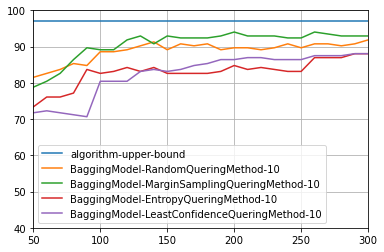

In [39]:
models = ['BaggingModel']
quering_methods = ['RandomQueringMethod','MarginSamplingQueringMethod','EntropyQueringMethod','LeastConfidenceQueringMethod']
Ks = ['10'] 
repeats = 1
upper_bound = 97.
total_experiments = len(models) * len(quering_methods) * len(Ks) * repeats


plot_results(upper_bound, d, ['BaggingModel'] , quering_methods , Ks, 1)

Prikaz obucavanja modela, pri selektovanju 25 novih elemenata za obuku

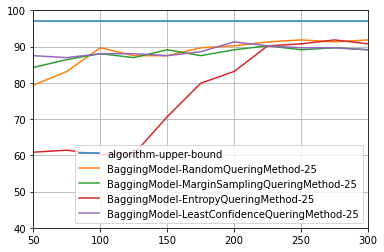

In [40]:
models = ['BaggingModel']
quering_methods = ['RandomQueringMethod','MarginSamplingQueringMethod','EntropyQueringMethod','LeastConfidenceQueringMethod']
Ks = ['25'] 
repeats = 1
upper_bound = 97.
total_experiments = len(models) * len(quering_methods) * len(Ks) * repeats


plot_results(upper_bound, d, ['BaggingModel'] , quering_methods , Ks, 1)

Prikaz obucavanja modela, pri selektovanju 50 novih elemenata za obuku

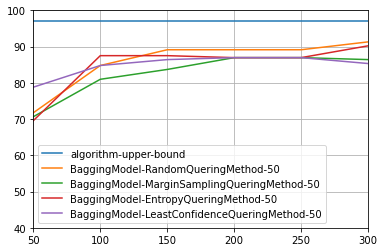

In [41]:
models = ['BaggingModel']
quering_methods = ['RandomQueringMethod','MarginSamplingQueringMethod','EntropyQueringMethod','LeastConfidenceQueringMethod']
Ks = ['50'] 
repeats = 1
upper_bound = 97.
total_experiments = len(models) * len(quering_methods) * len(Ks) * repeats


plot_results(upper_bound, d, ['BaggingModel'] , quering_methods , Ks, 1)